# LEAD SCORING CASE STUDY


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## PROBLEM STATEMENT

To build a model wherein we need to assign a lead score (0-100) to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Step 1: Import and Inspect Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lead_df=pd.read_csv("Leads.csv") # importing data
lead_df.head() # check the 5 top rows

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_df.shape # shape of dataset

(9240, 37)

In [4]:
lead_df.describe() # check the data stats

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_df.info() # check the columns and info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step2: Data Cleaning and Visualization

### <font color=purple> Checking for any duplicate rows (if any) on the basis of Leads.

In [6]:
lead_df[lead_df.duplicated(subset='Lead Number')]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### <font color=red> <u>__INFERENCE__</u>
   
__We do not have any duplicate leads. Thus we can proceed with the given dataset.__

________________________________________________________________________________________________________________________________

### <font color=purple> Handling 'Select','unknown','Not Sure' values in Categorical Variables. </font>
   
Many of the categorical variables have a level called 'Select'.
This is because customer did not select any option from the list or no option was relevant to them.
Select values are as good as NULL.

In [7]:
# Replacing 'Select','unknown','Not Sure' values with NaN.

lead_df = lead_df.replace('Select', np.nan)
lead_df = lead_df.replace('unknown', np.nan)
lead_df = lead_df.replace('Not Sure', np.nan)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


________________________________________________________________________________________________________________________________

### <font color=purple> Dropping columns that are not required for modelling</font>
    
'Prospect ID' indicates the unique ID with which the customer is identified & can be dropped since Lead Number can be used for the same purpose.

In [8]:
lead_df.drop(['Prospect ID'], axis=1, inplace = True) # dropping the unwanted column in axis 1

In [9]:
lead_df.head() # check the data 

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


_______________________________________________________________________________________________________________________________

### <u>NOTE</u>:
After looking at the data, we understand that there are 2 types of information (data) provided to us-
1. System generated
2. Sales team generated

### <font color=purple> Removing all the Sales team generated columns for true analysis

In [10]:
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
# dropping Sales team generated columns

lead_df=lead_df.drop(['Tags','Last Activity','Last Notable Activity','Lead Profile','Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score','Lead Quality'], axis=1) 
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,...,No,No,No,No,No,No,No,NaN,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,...,No,No,No,No,No,No,No,NaN,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,...,No,No,No,No,No,No,No,Mumbai,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,...,No,No,No,No,No,No,No,Mumbai,No,No


_______________________________________________________________________________________________________________________________

### <font color=purple> Check the records with more than 70% nulls

In [12]:
row_nulls=lead_df.dropna(axis=0, thresh=8, how='any')
row_nulls.shape

(9240, 27)

### <font color=red> <u>__INFERENCE__</u>
   
__None of the rows have nulls more than 70%. Thus we use all the leads for our analysis.__

_______________________________________________________________________________________________________________________________

### <font color=purple> Checking percentage of Null values and taking required actions

In [13]:
# Creating a function to pull the null counts and its percentage

def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [14]:
null_vals=find_NaN(lead_df)
null_vals[null_vals.Cnt_of_Nulls>0]

,Cnt_of_Nulls,Null_Percentage
Lead Source,36,0.389610
TotalVisits,137,1.482684
Page Views Per Visit,137,1.482684
Country,2466,26.688312
Specialization,3380,36.580087
How did you hear about X Education,7250,78.463203
What is your current occupation,2690,29.112554
What matters most to you in choosing a course,2709,29.318182
City,3669,39.707792


In [15]:
# Dropping the columns from the dataframe with null percentange 40 or more

lead_df.drop(null_vals[null_vals.Null_Percentage>=40].index, inplace=True, axis=1)
lead_df.shape

(9240, 26)

In [16]:
# Once again analyze the nulls

null_vals=find_NaN(lead_df)
null_vals[null_vals.Cnt_of_Nulls>0]

,Cnt_of_Nulls,Null_Percentage
Lead Source,36,0.389610
TotalVisits,137,1.482684
Page Views Per Visit,137,1.482684
Country,2466,26.688312
Specialization,3380,36.580087
What is your current occupation,2690,29.112554
What matters most to you in choosing a course,2709,29.318182
City,3669,39.707792


In [17]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,...,No,No,No,No,No,No,No,NaN,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,...,No,No,No,No,No,No,No,NaN,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,...,No,No,No,No,No,No,No,Mumbai,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,...,No,No,No,No,No,No,No,Mumbai,No,No


_______________________________________________________________________________________________________________________________

### <font color=purple> Checking skewness of the columns i.e. Imbalance

In [18]:
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [19]:
# Creating a function to check unique values and its percentanges in the remaining columns of lead_df to understand the skewness within the columns

def v_cnts(cols):
    for i in cols:
        print("***************************************************************")
        print(i)
        print("----------------------------------------------------------------")
        print(lead_df[i].value_counts(normalize=True, dropna=False)*100) 

In [20]:
v_cnts(lead_df.columns.values.tolist()) # checking values for each columns 

***************************************************************
Lead Number
----------------------------------------------------------------
608255    0.010823
596233    0.010823
656682    0.010823
592824    0.010823
652580    0.010823
            ...   
631489    0.010823
600768    0.010823
598556    0.010823
616923    0.010823
655360    0.010823
Name: Lead Number, Length: 9240, dtype: float64
***************************************************************
Lead Origin
----------------------------------------------------------------
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
***************************************************************
Lead Source
----------------------------------------------------------------
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic 

### <font color=red> <u>__INFERENCE__</u>
   
Columns __'Do Not Email','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',  'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'__ seem to be very imbalanced.

In [21]:
# Creating different functions for visualizing the data


# Creating a function for annotation of bar graphs- Horizontal
def ann_h(df):
   
    totals = []

    # find the values and append to list
    for i in df.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in df.patches:
        # get_x pulls left or right; get_height pushes up or down
        df.text(i.get_x()+.29, i.get_height(), \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)
        
#count plot functionn
        
def cnt(col):    
    for i in col:
        plt.figure(figsize = (30,15)) 
        p=sns.countplot(lead_df[i]) #ploting for varibales
        ann_h(p)
        plt.xticks(rotation=90, fontsize=20)
        plt.xlabel(i, fontsize=20)
        plt.ylabel('Count', fontsize=0)
        plt.yticks(fontsize=20)
        plt.show()
        
# Pie plot function
        
def pi(col):    
    for i in col:
        plt.figure(figsize = (3,3)) 
        lead_df[i].value_counts(normalize= True).plot.pie(autopct='%1.1f%%') #ploting pie plots
        plt.show()
        

# Box plot function

def box_plot(col):
    plt.figure(figsize=(20, 15))
    for i in enumerate(col):
        plt.subplot(3,3,i[0]+1)
        sns.boxplot(x = i[1], data =lead_df)
        
        
# plotting spread of columnn with coverted 

def cnt_con(col):
        for i in col:
            plt.figure(figsize = (30,15)) 
            sns.countplot(lead_df[i],hue=lead_df['Converted']) #ploting for varibales
            plt.xticks(rotation=90, fontsize=20)
            plt.xlabel(i, fontsize=20)
            plt.ylabel('Count', fontsize=0)
            plt.yticks(fontsize=20)
            plt.show()   

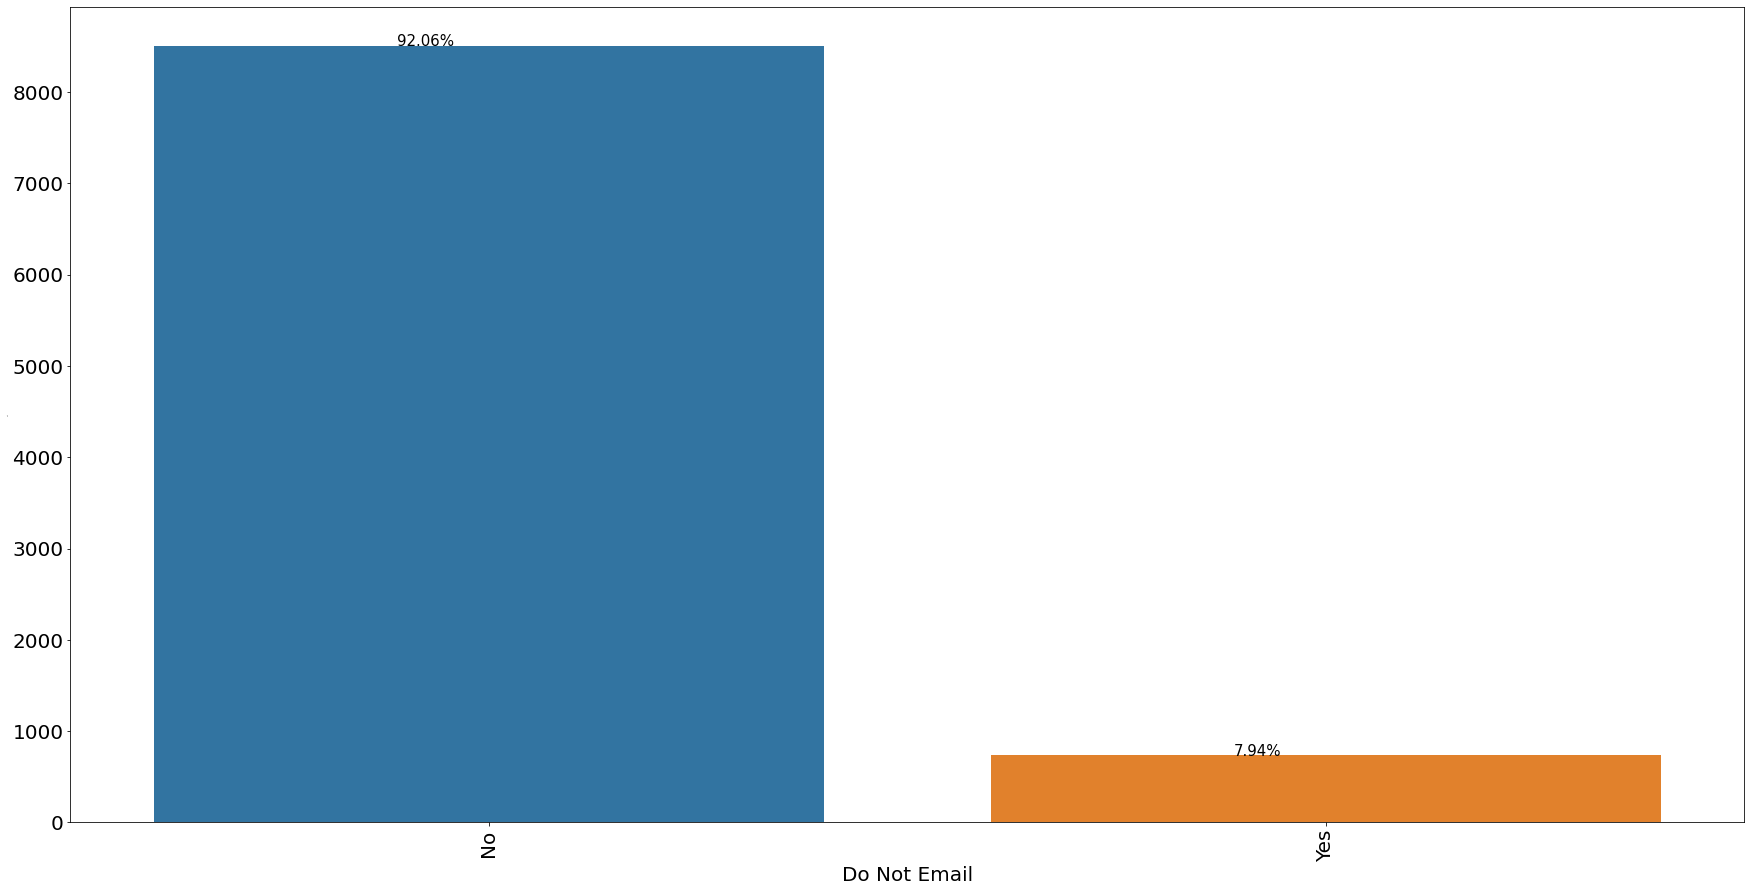

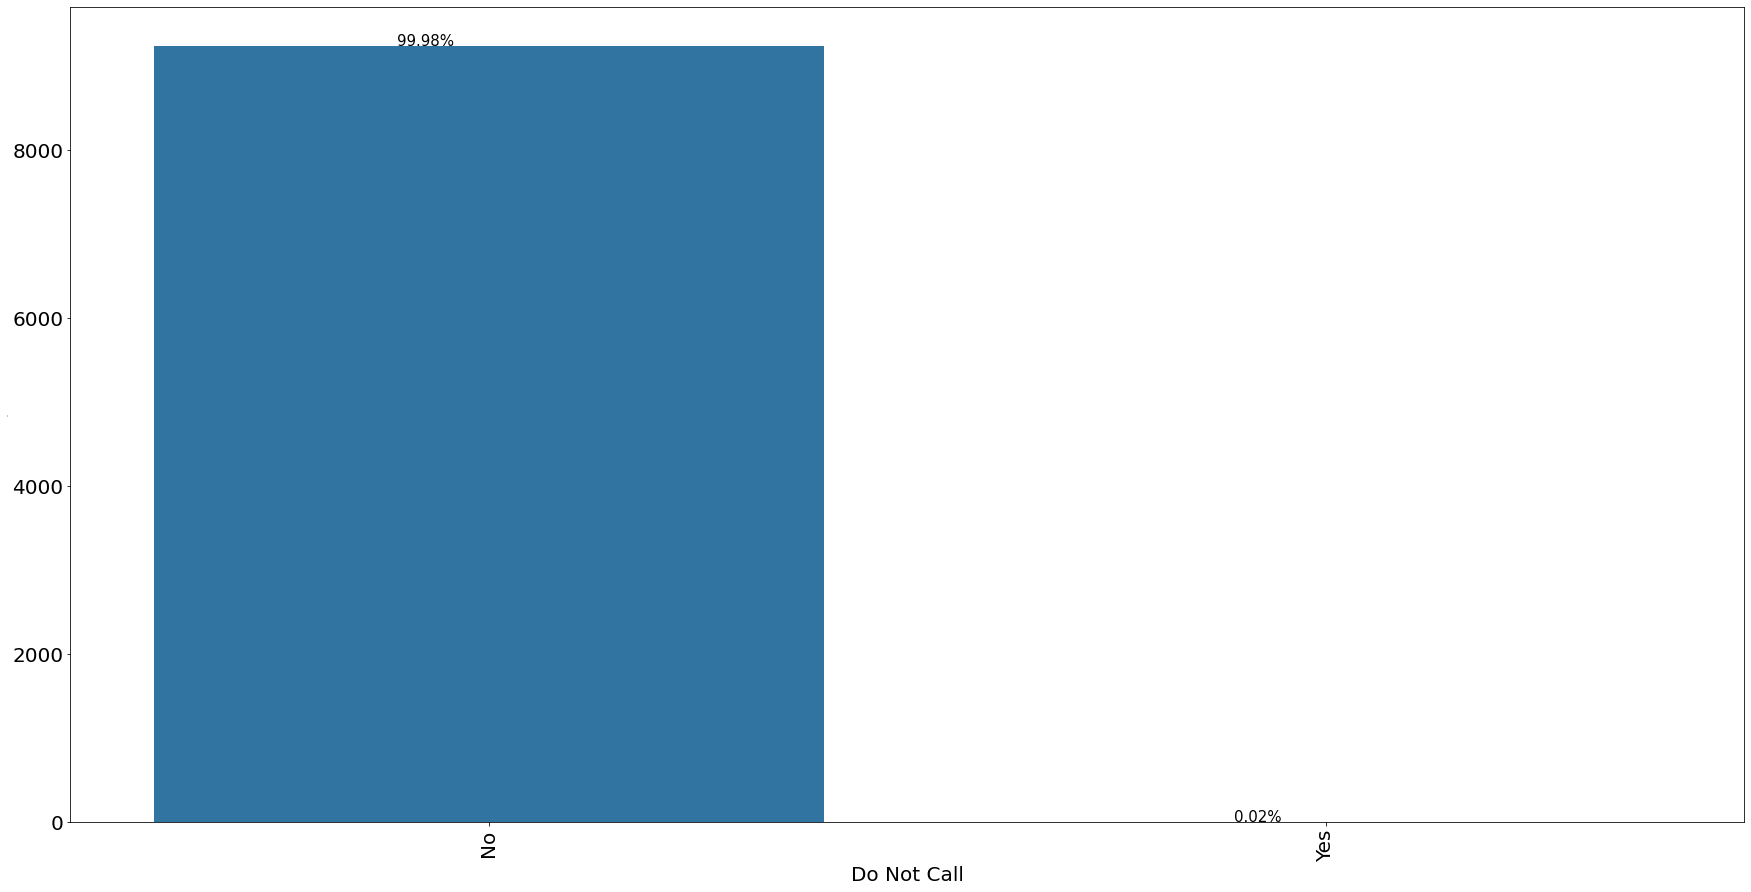

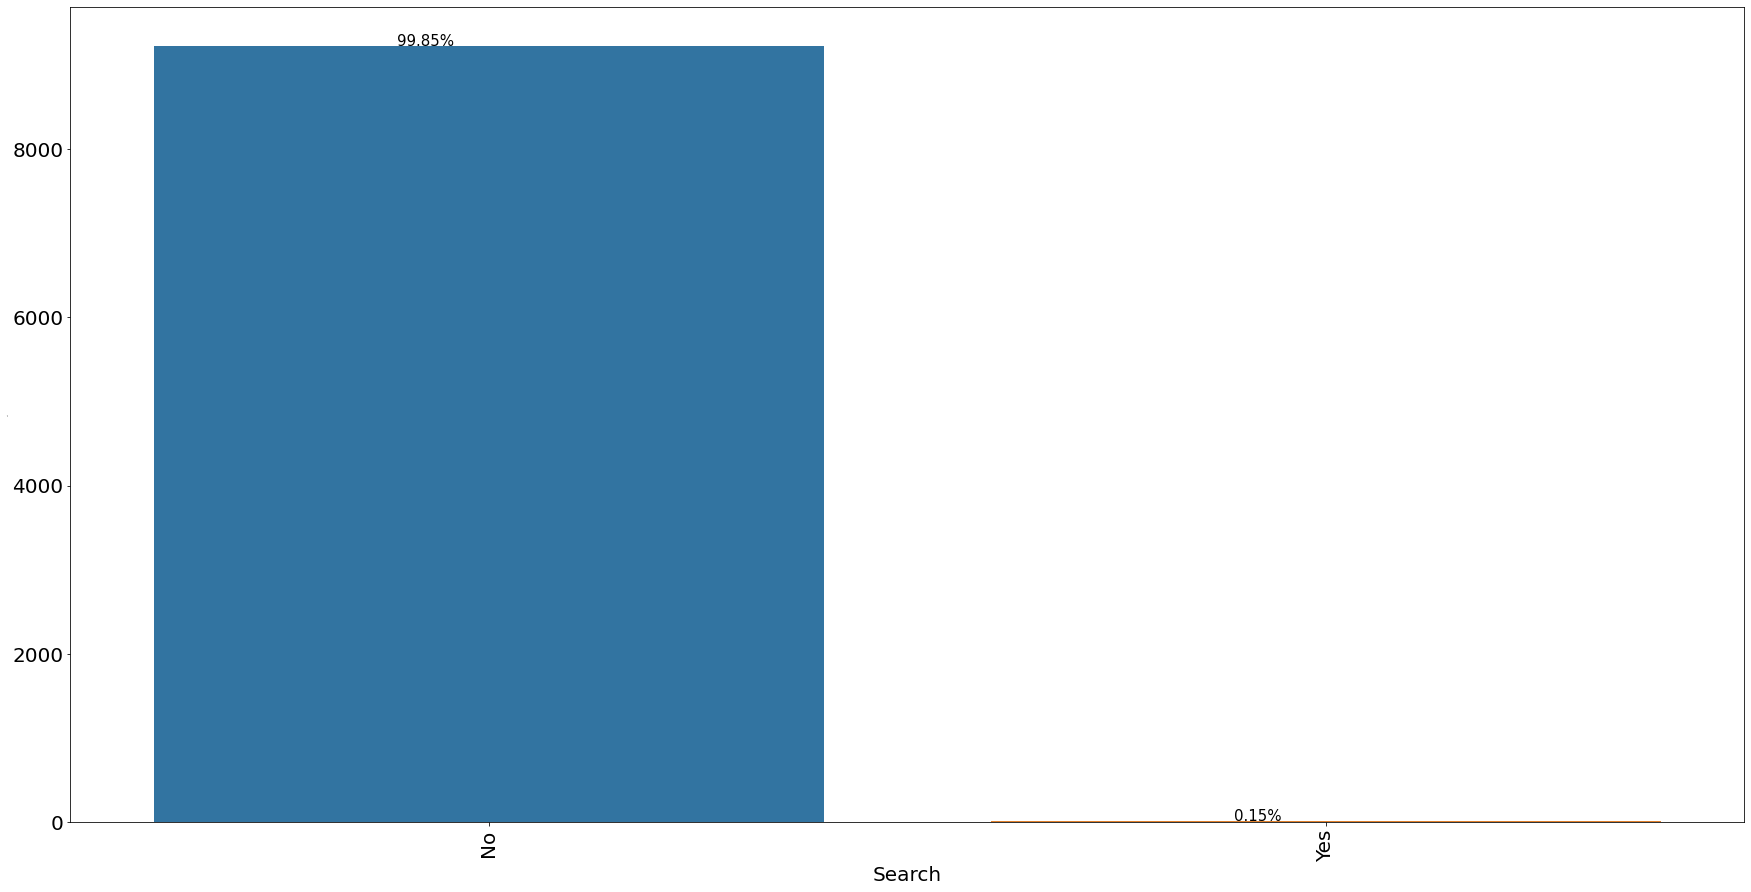

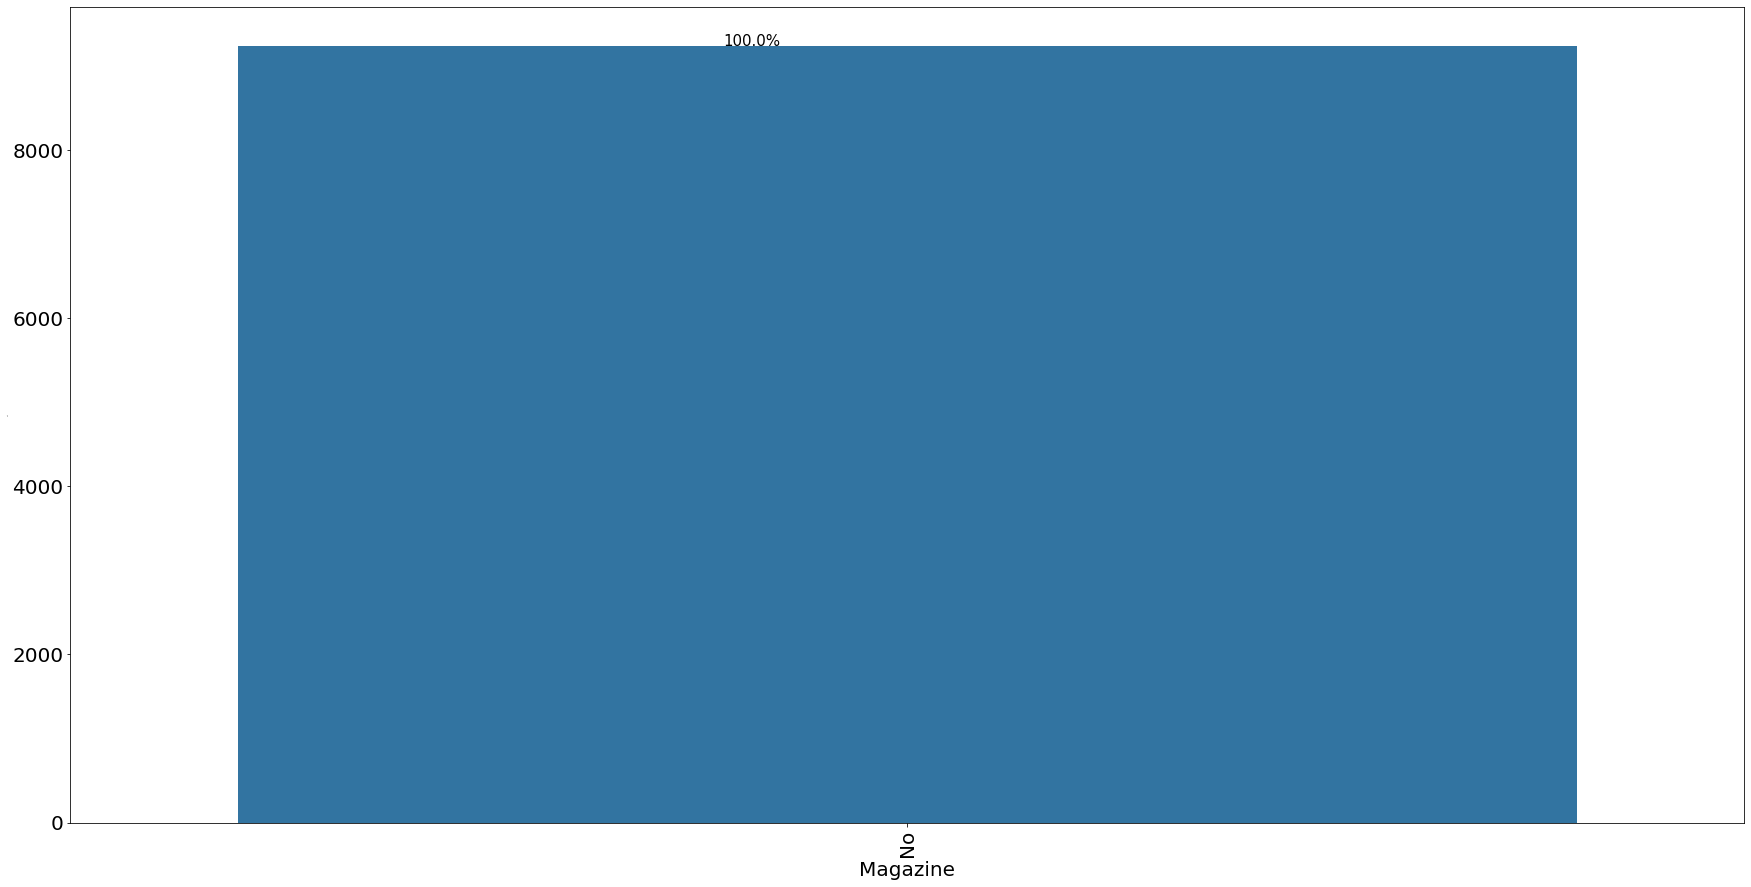

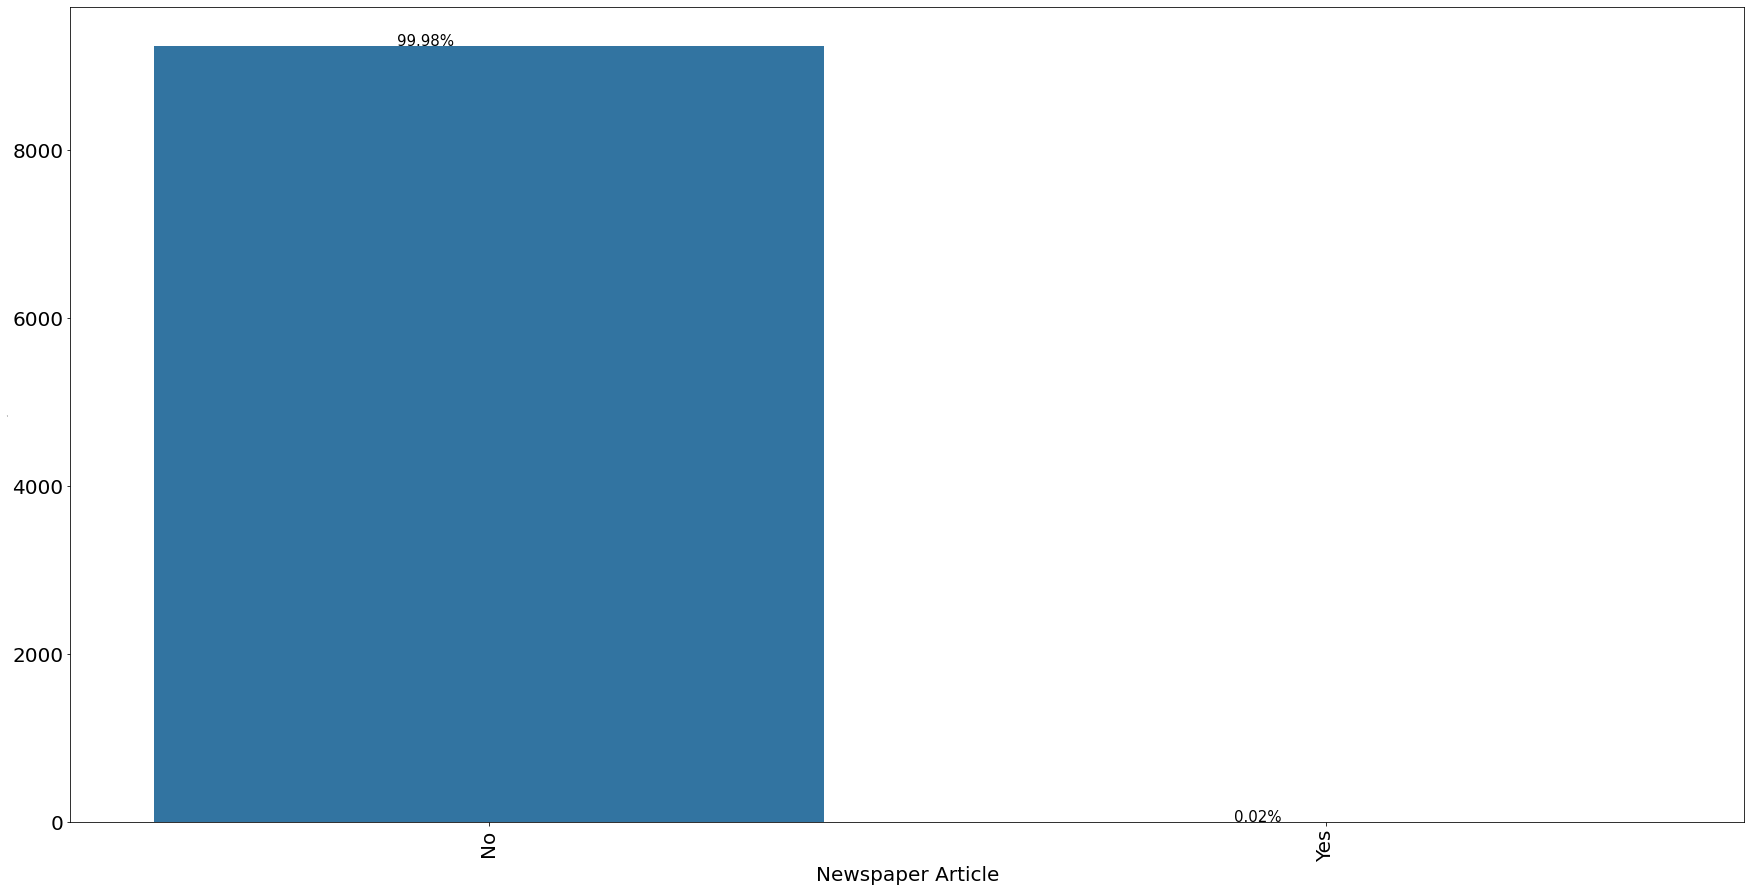

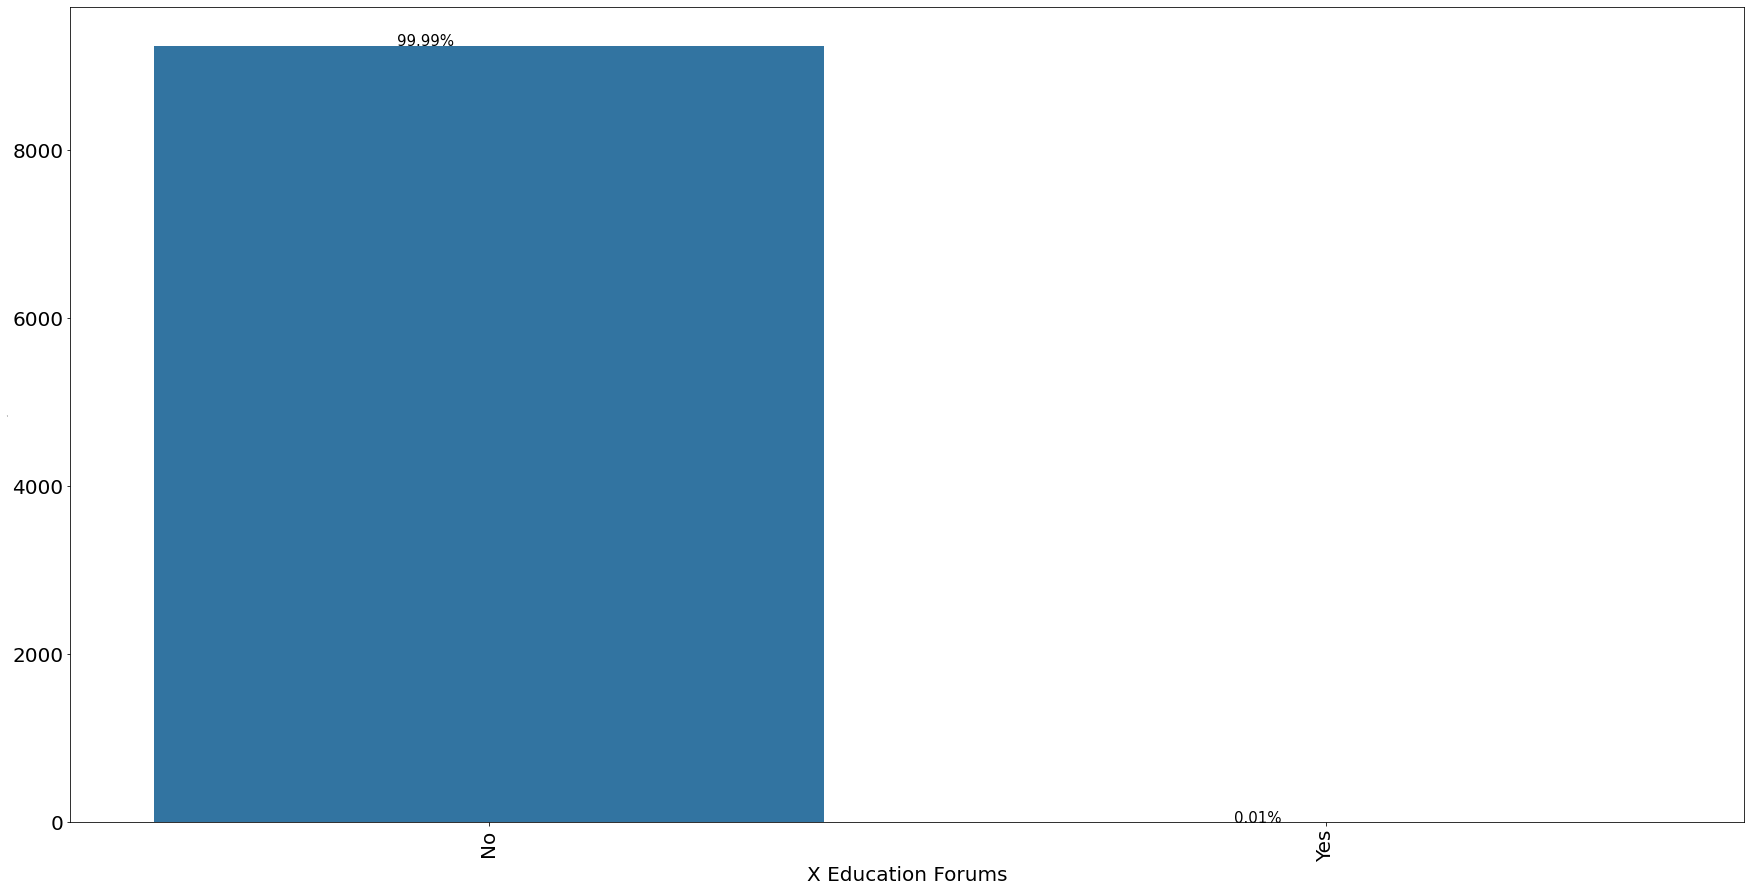

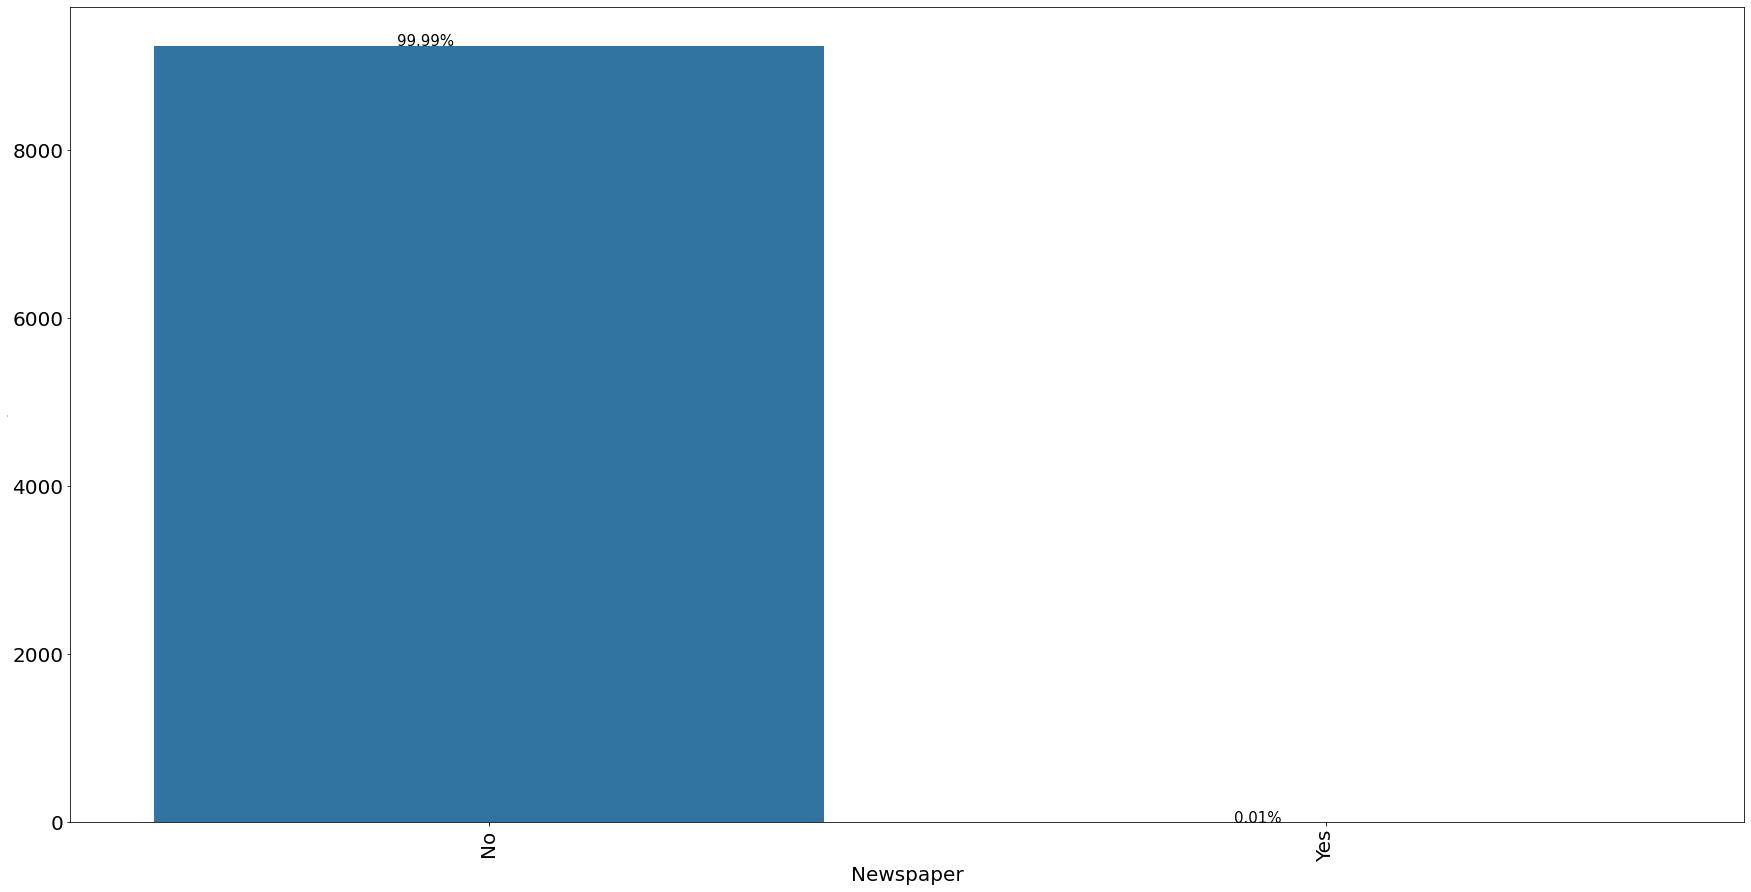

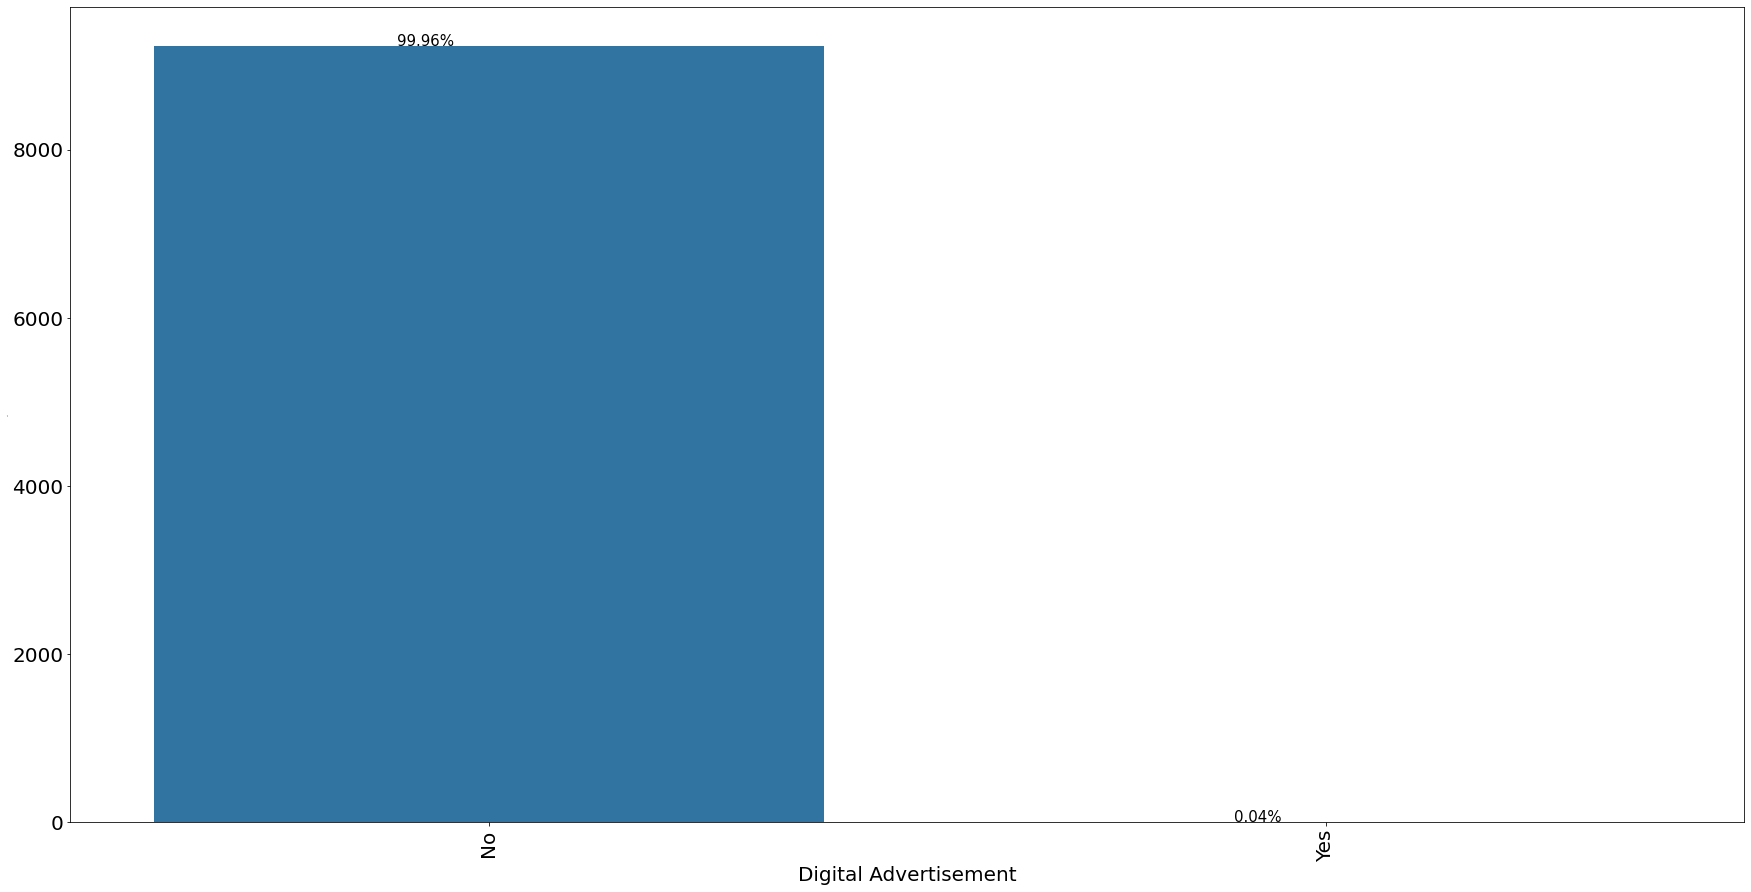

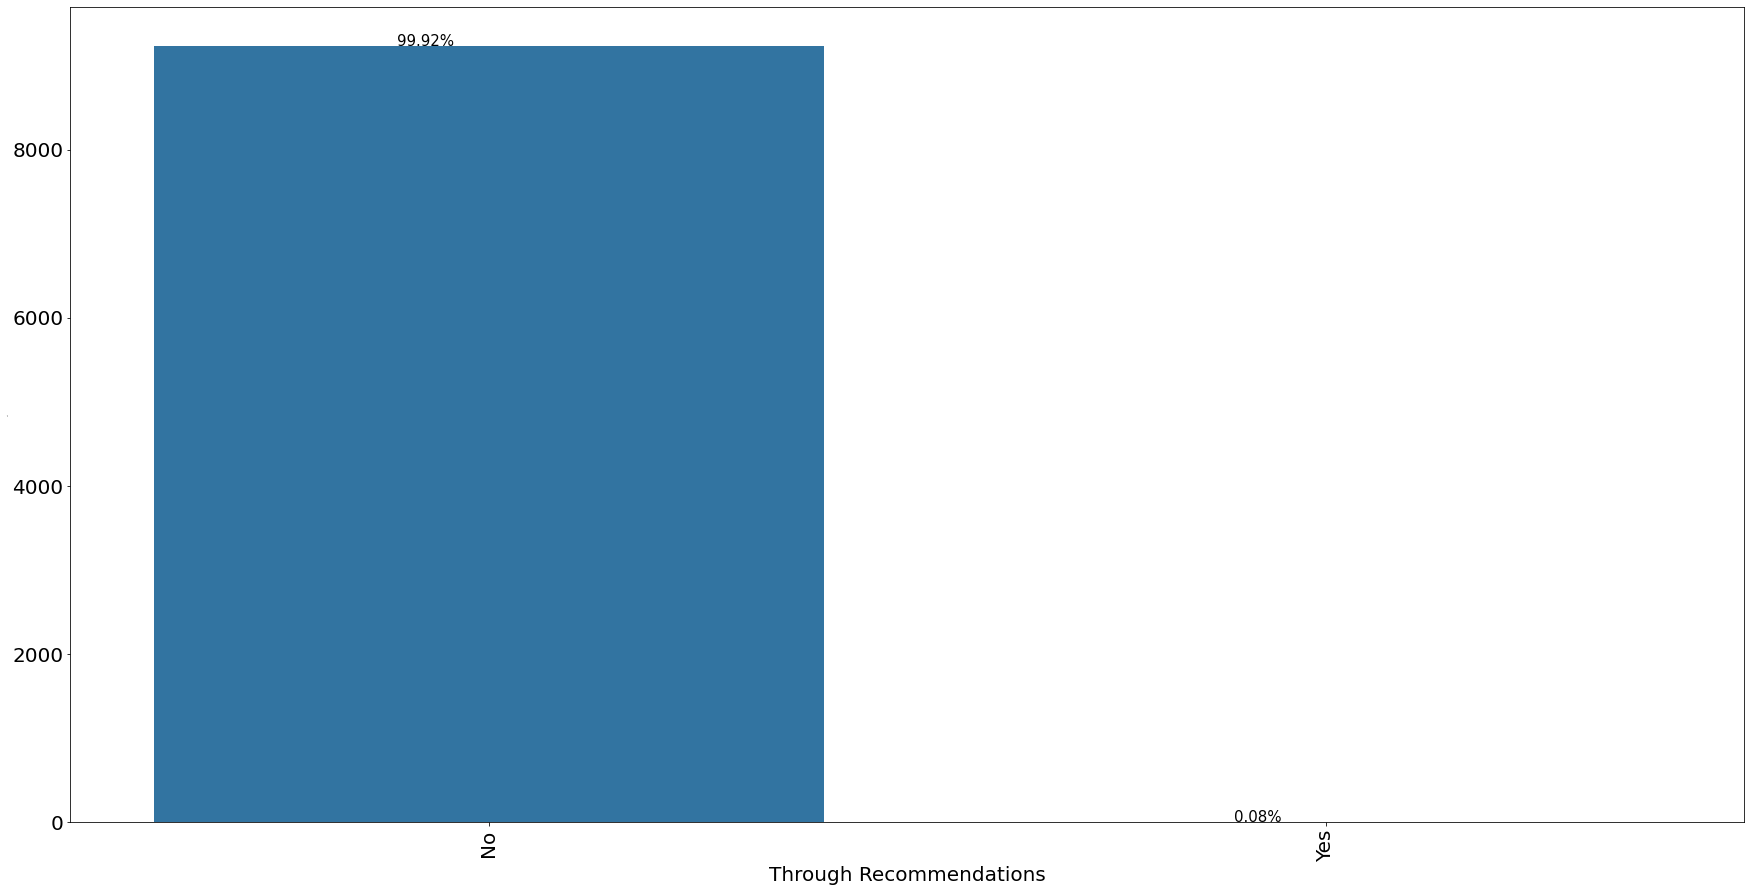

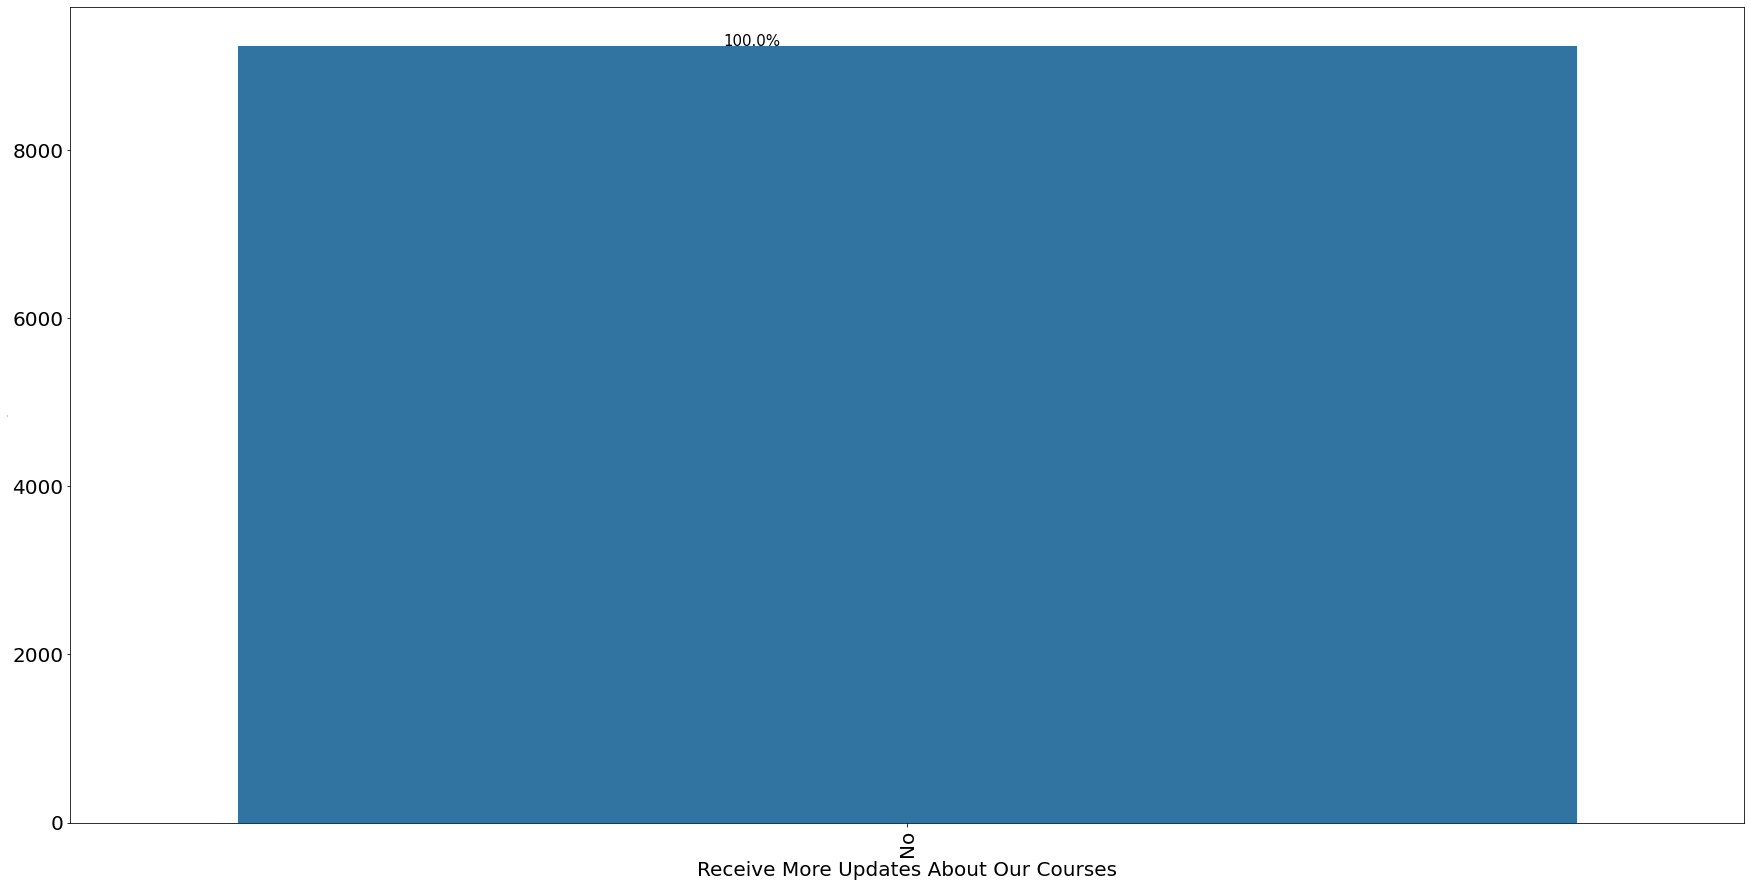

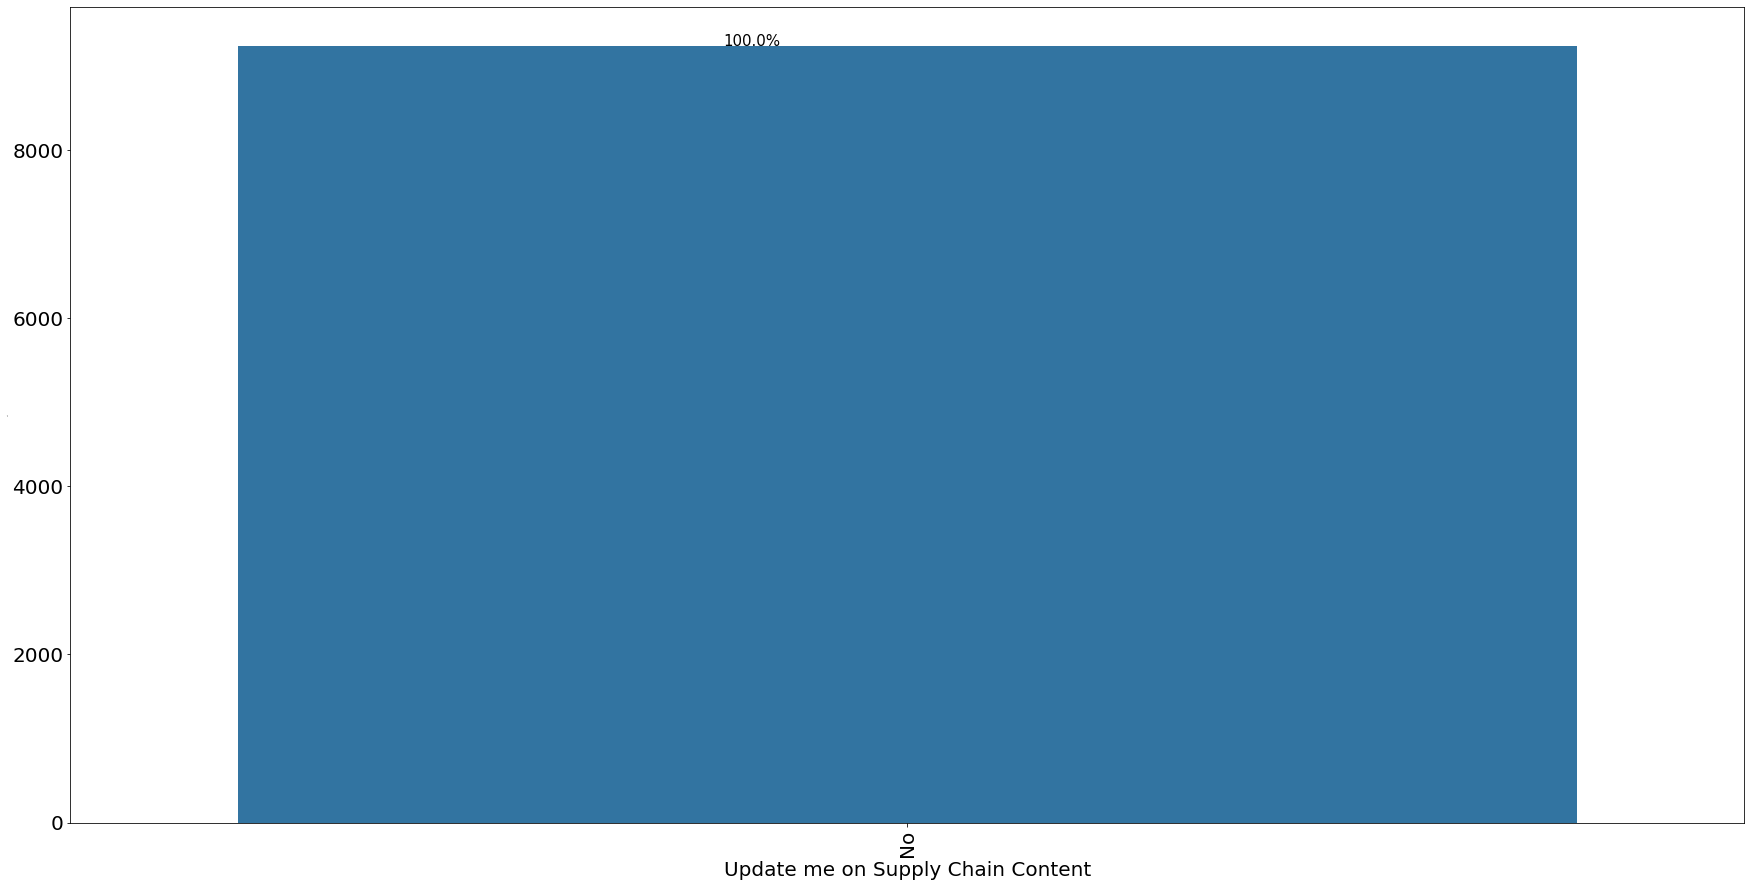

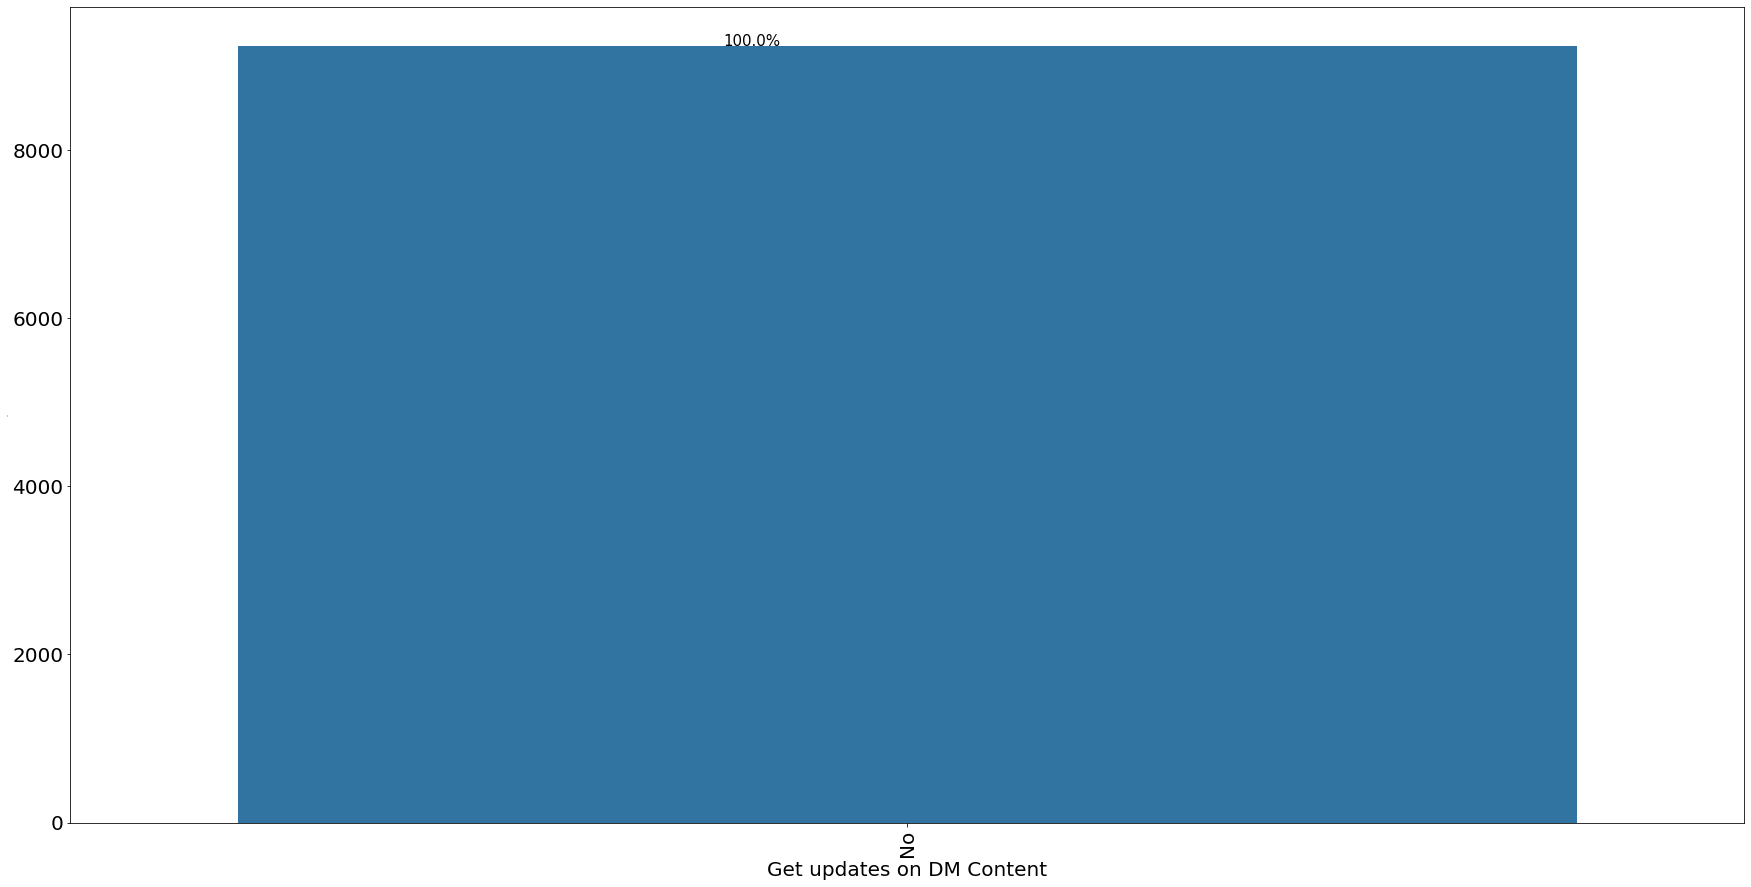

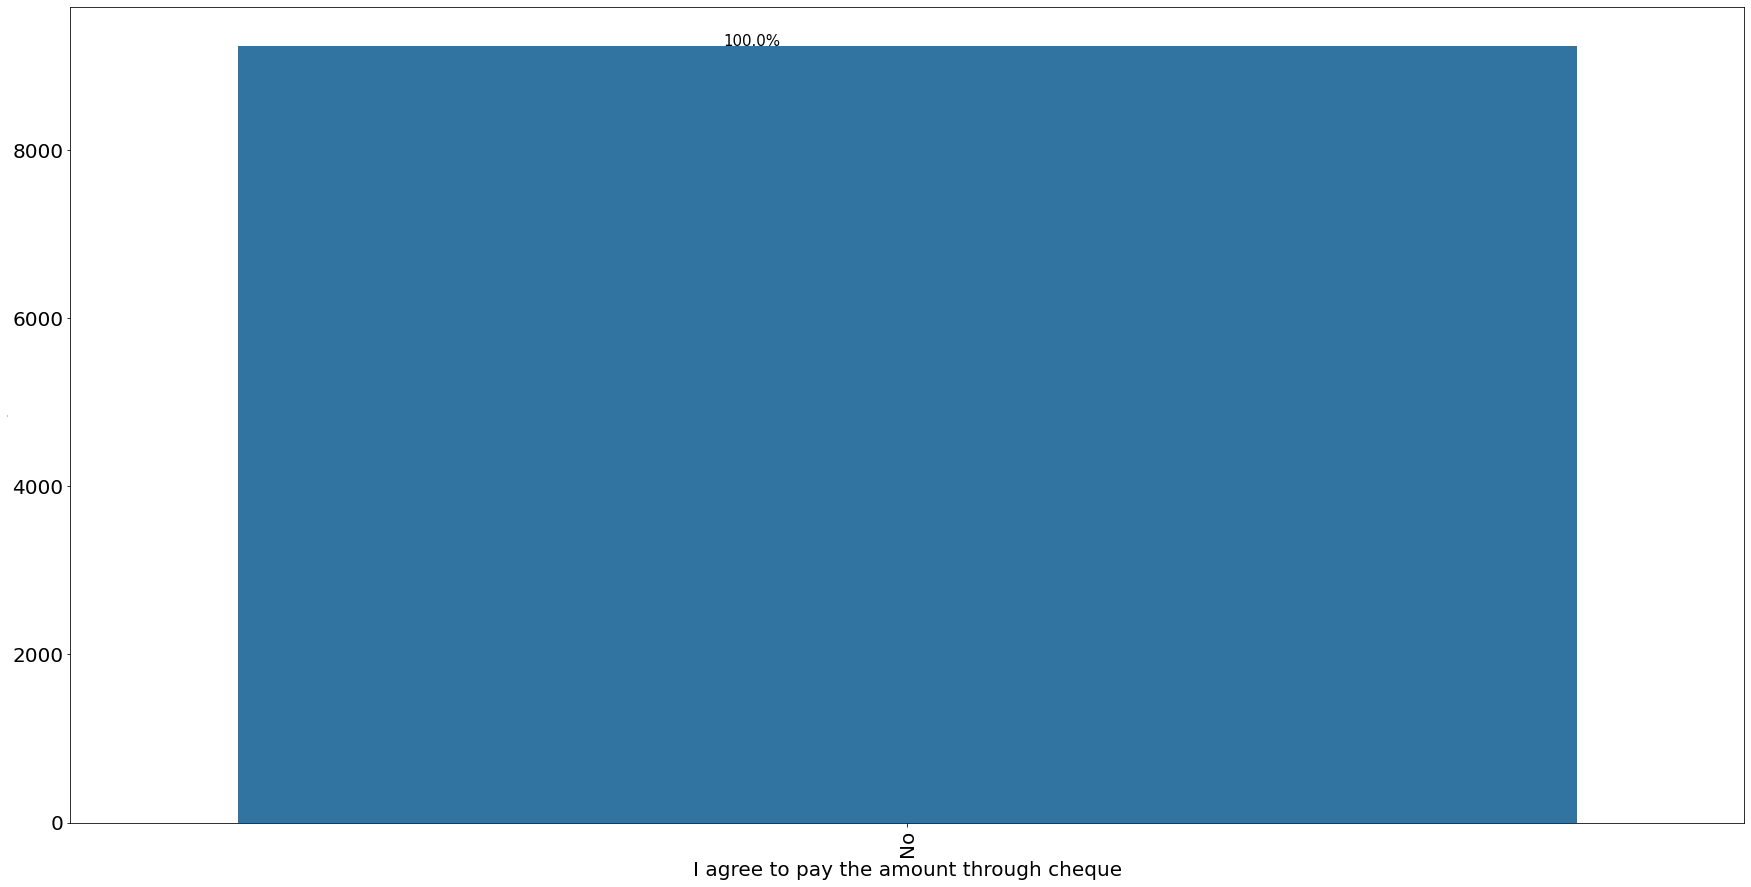

In [22]:
# Visualizing all the columns with imbalances (as found in the above step)

col=['Do Not Email','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
cnt(col)

### <font color=red> <u>__INFERENCE__</u>
   
__All the columns mentioned above are highly skewed.__
    

In [23]:
# Dropping the highly skewed columns

lead_df=lead_df.drop(col, axis=1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,NaN,NaN,Unemployed,Better Career Prospects,NaN,No
1,660728,API,Organic Search,0,5.0,674,2.5,India,NaN,Unemployed,Better Career Prospects,NaN,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,NaN,Unemployed,Better Career Prospects,Mumbai,No


In [24]:
# Let's look at the shape and columns of the dataframe now

print(lead_df.shape)
print(lead_df.columns)

(9240, 13)
Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')


_______________________________________________________________________________________________________________________________

### <font color=purple> Renaming some columns for the ease of coding and understanding

In [25]:
# For following better naming standards renaming the column names

lead_df.rename(columns = {'What is your current occupation':'Occupation', 'A free copy of Mastering The Interview':'Free Copy','What matters most to you in choosing a course':'Reason for Course'}, inplace = True)
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'Occupation', 'Reason for Course', 'City',
       'Free Copy'],
      dtype='object')

_______________________________________________________________________________________________________________________________

### <font color=purple> Check for missing values and categorize them correctly

In [26]:
# Checking the missing values in the modified dataframe

null_vals=find_NaN(lead_df)
null_vals

,Cnt_of_Nulls,Null_Percentage
Lead Number,0,0.000000
Lead Origin,0,0.000000
Lead Source,36,0.389610
Converted,0,0.000000
TotalVisits,137,1.482684
Total Time Spent on Website,0,0.000000
Page Views Per Visit,137,1.482684
Country,2466,26.688312
Specialization,3380,36.580087
Occupation,2690,29.112554


In [27]:
v_cnts(lead_df.columns.values.tolist()) # checking values for each columns 

***************************************************************
Lead Number
----------------------------------------------------------------
608255    0.010823
596233    0.010823
656682    0.010823
592824    0.010823
652580    0.010823
            ...   
631489    0.010823
600768    0.010823
598556    0.010823
616923    0.010823
655360    0.010823
Name: Lead Number, Length: 9240, dtype: float64
***************************************************************
Lead Origin
----------------------------------------------------------------
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
***************************************************************
Lead Source
----------------------------------------------------------------
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic 

In [28]:
# Understanding the values in each column and then categorizing it correctly

lead_df['Lead Source']=lead_df['Lead Source'].apply(lambda x: 'Others' if x in ['Facebook','bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','Pay per Click Ads','blog','NC_EDM','WeLearn','welearnblog_Home','testone'] else x)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,Occupation,Reason for Course,City,Free Copy
0,660737,API,Olark Chat,0,0.0,0,0.0,NaN,NaN,Unemployed,Better Career Prospects,NaN,No
1,660728,API,Organic Search,0,5.0,674,2.5,India,NaN,Unemployed,Better Career Prospects,NaN,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,NaN,Unemployed,Better Career Prospects,Mumbai,No


In [29]:
null_vals=find_NaN(lead_df)
null_vals.sort_values(by= 'Cnt_of_Nulls')

,Cnt_of_Nulls,Null_Percentage
Lead Number,0,0.000000
Lead Origin,0,0.000000
Converted,0,0.000000
Total Time Spent on Website,0,0.000000
Free Copy,0,0.000000
Lead Source,36,0.389610
TotalVisits,137,1.482684
Page Views Per Visit,137,1.482684
Country,2466,26.688312
Occupation,2690,29.112554


### <font color=red> <u>__INFERENCE__</u>
    
__1. There are no columns with more than 40% null values.__<br>
__2. But Specialization has quite high amount of Nulls as compared to other values and logically it is related to Occupation. Thus dropping it is a good idea.__<br>
__3. Also replacing the NaN values in City to 'Others'.__

In [30]:
# Dropping the Specialization column

lead_df=lead_df.drop('Specialization', axis=1)
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Occupation', 'Reason for Course', 'City', 'Free Copy'],
      dtype='object')

______________________________________________________________________________________________________________________________________________________________________________________________________________________

### <font color=purple> Imputing Categorical columns with the mode values

In [31]:
print('Mode of Lead Source: ',lead_df['Lead Source'].mode()[0])
print('Mode of Country: ',lead_df.Country.mode()[0])
print('Mode of Occupation: ',lead_df['Occupation'].mode()[0])
print('Mode of Reason for Course: ',lead_df['Reason for Course'].mode()[0])
print('Mode of City: ',lead_df.City.mode()[0])

Mode of Lead Source:  Google
Mode of Country:  India
Mode of Occupation:  Unemployed
Mode of Reason for Course:  Better Career Prospects
Mode of City:  Mumbai


In [32]:
# Since null percentage is only 0.39% we replace nulls with mode value

lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')

In [33]:
lead_df['Country']= lead_df['Country'].replace(np.nan, 'India')

In [34]:
lead_df['Occupation']= lead_df['Occupation'].replace(np.nan, 'Unemployed')

In [35]:
lead_df['City']= lead_df['City'].replace(np.nan, 'Mumbai')

In [36]:
lead_df['Reason for Course']= lead_df['Reason for Course'].replace(np.nan, 'Better Career Prospects')

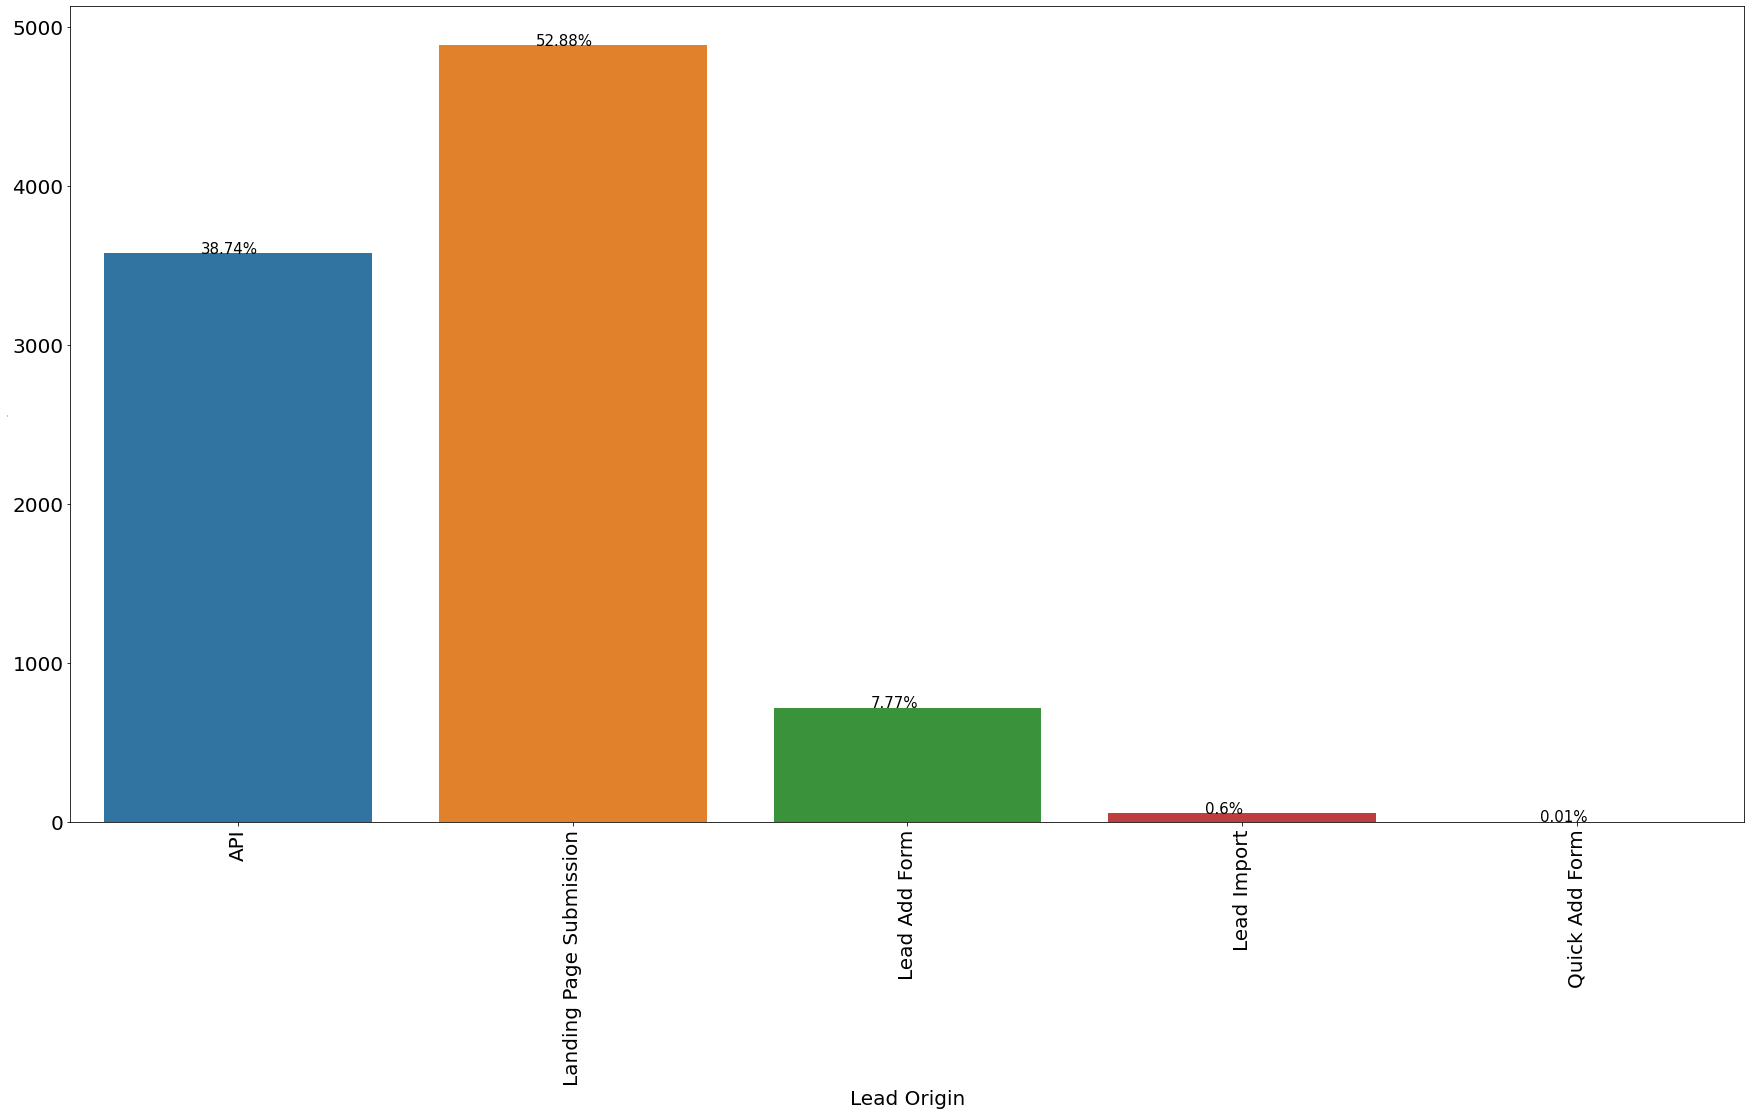

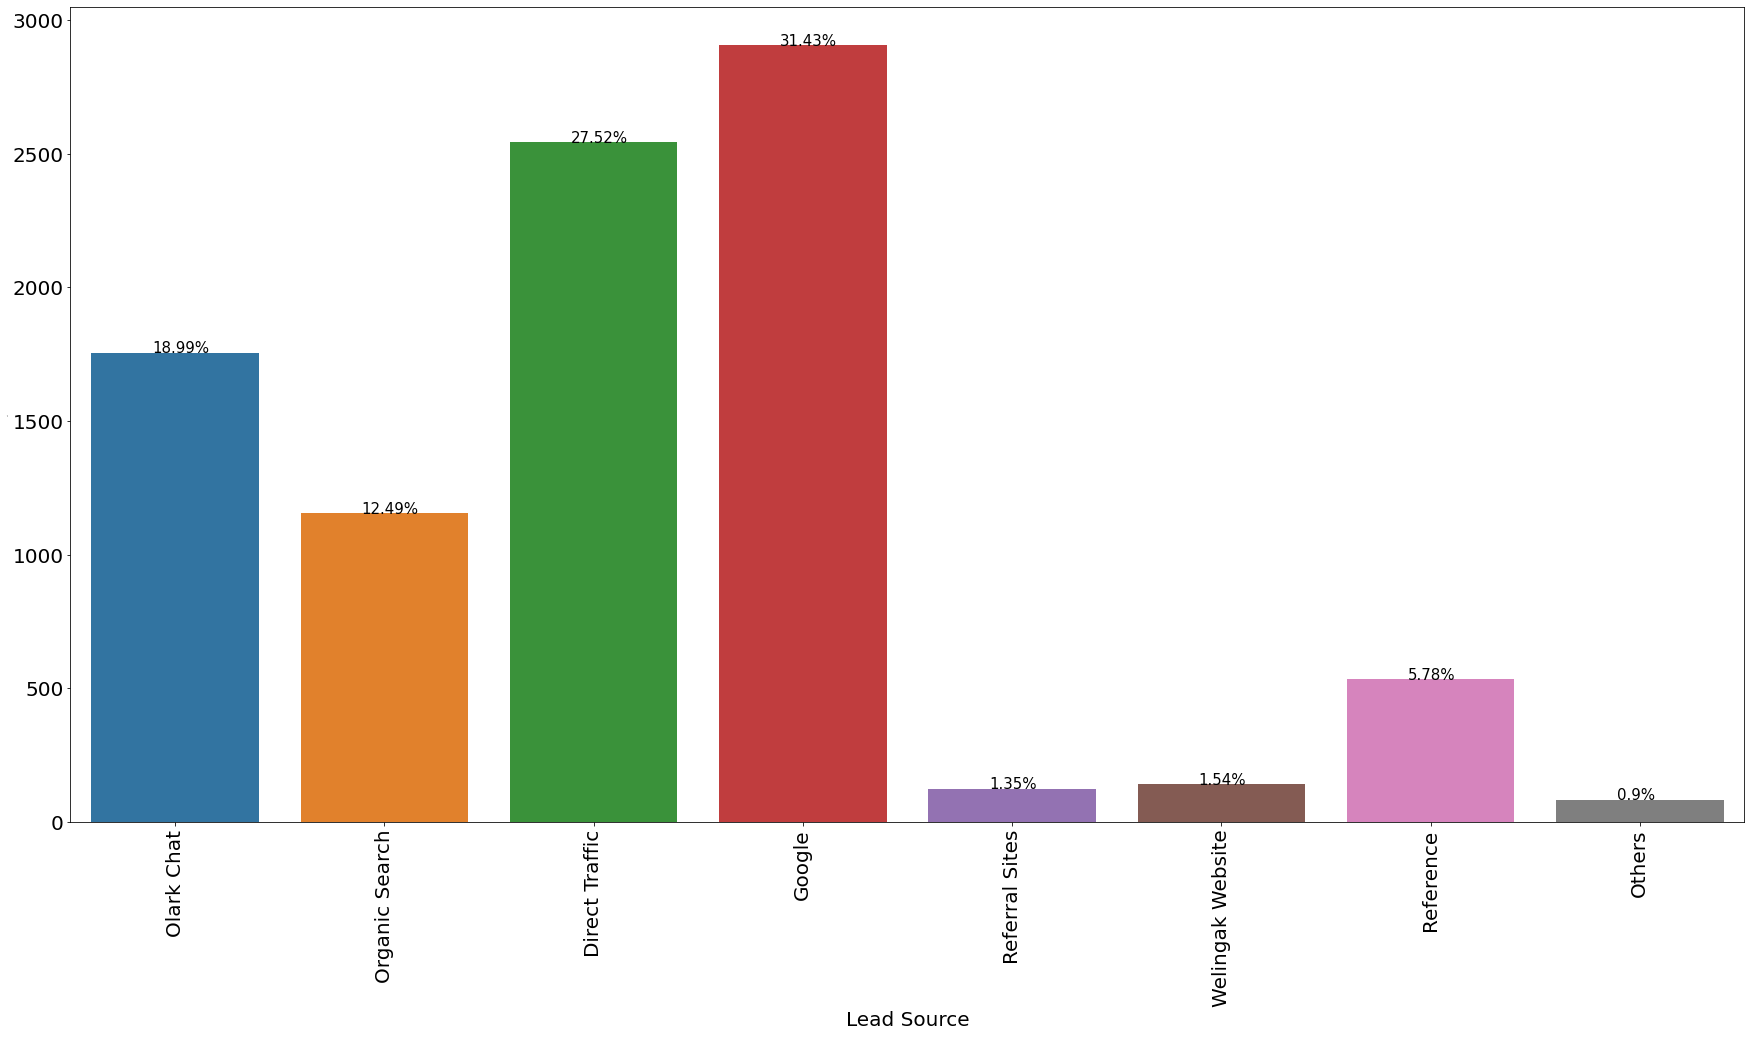

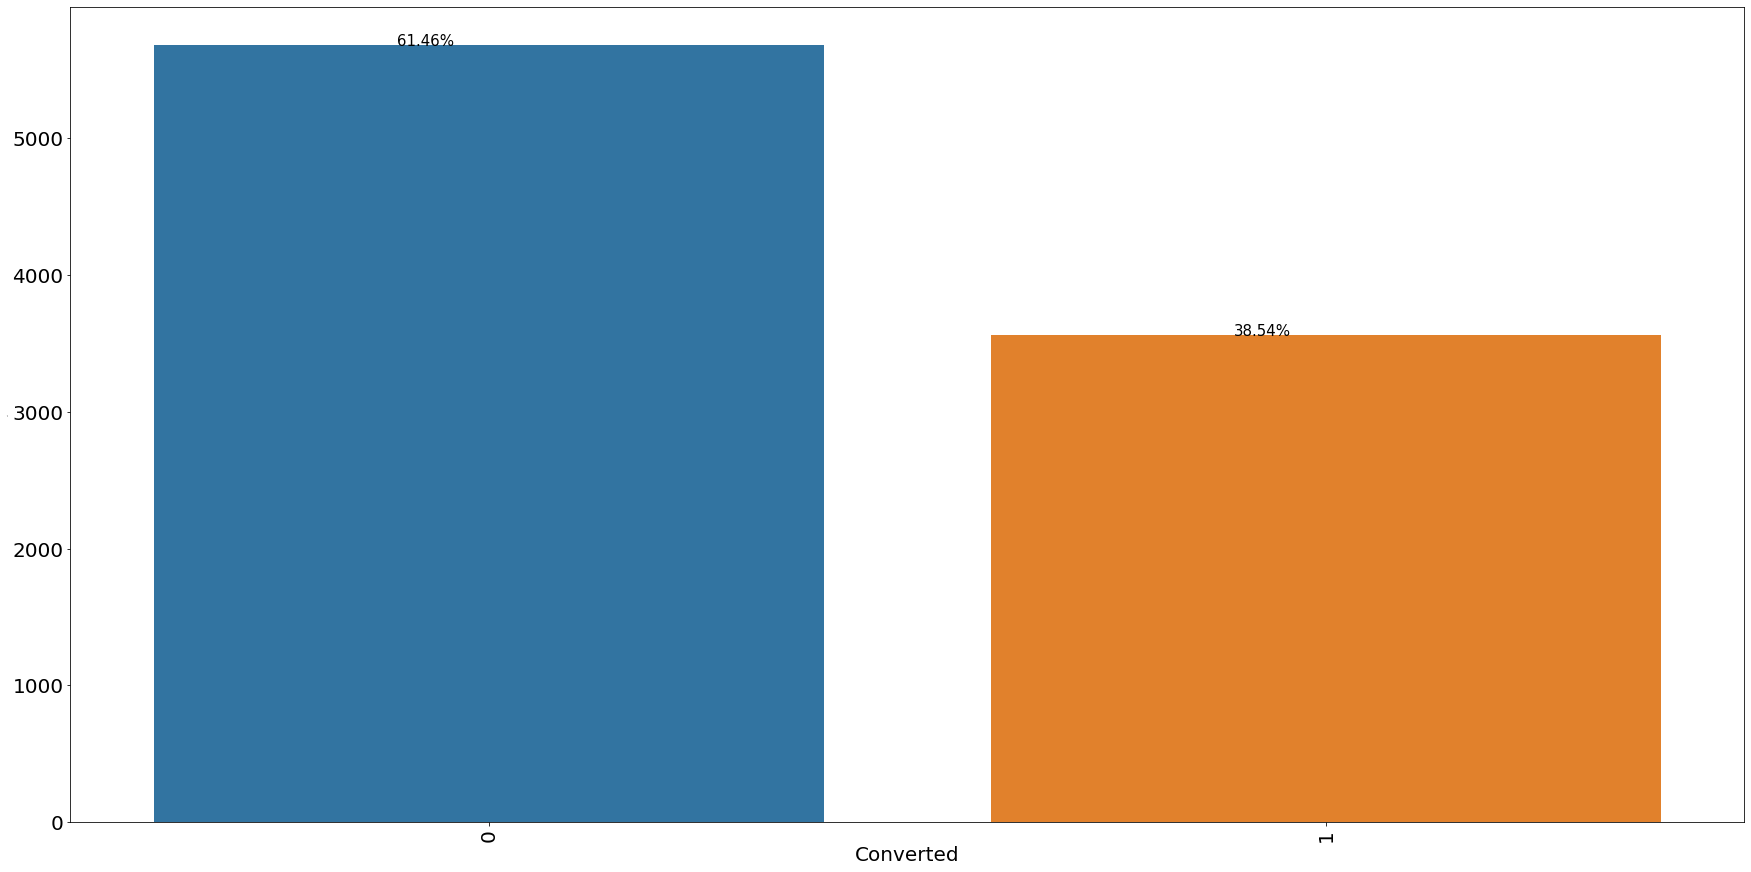

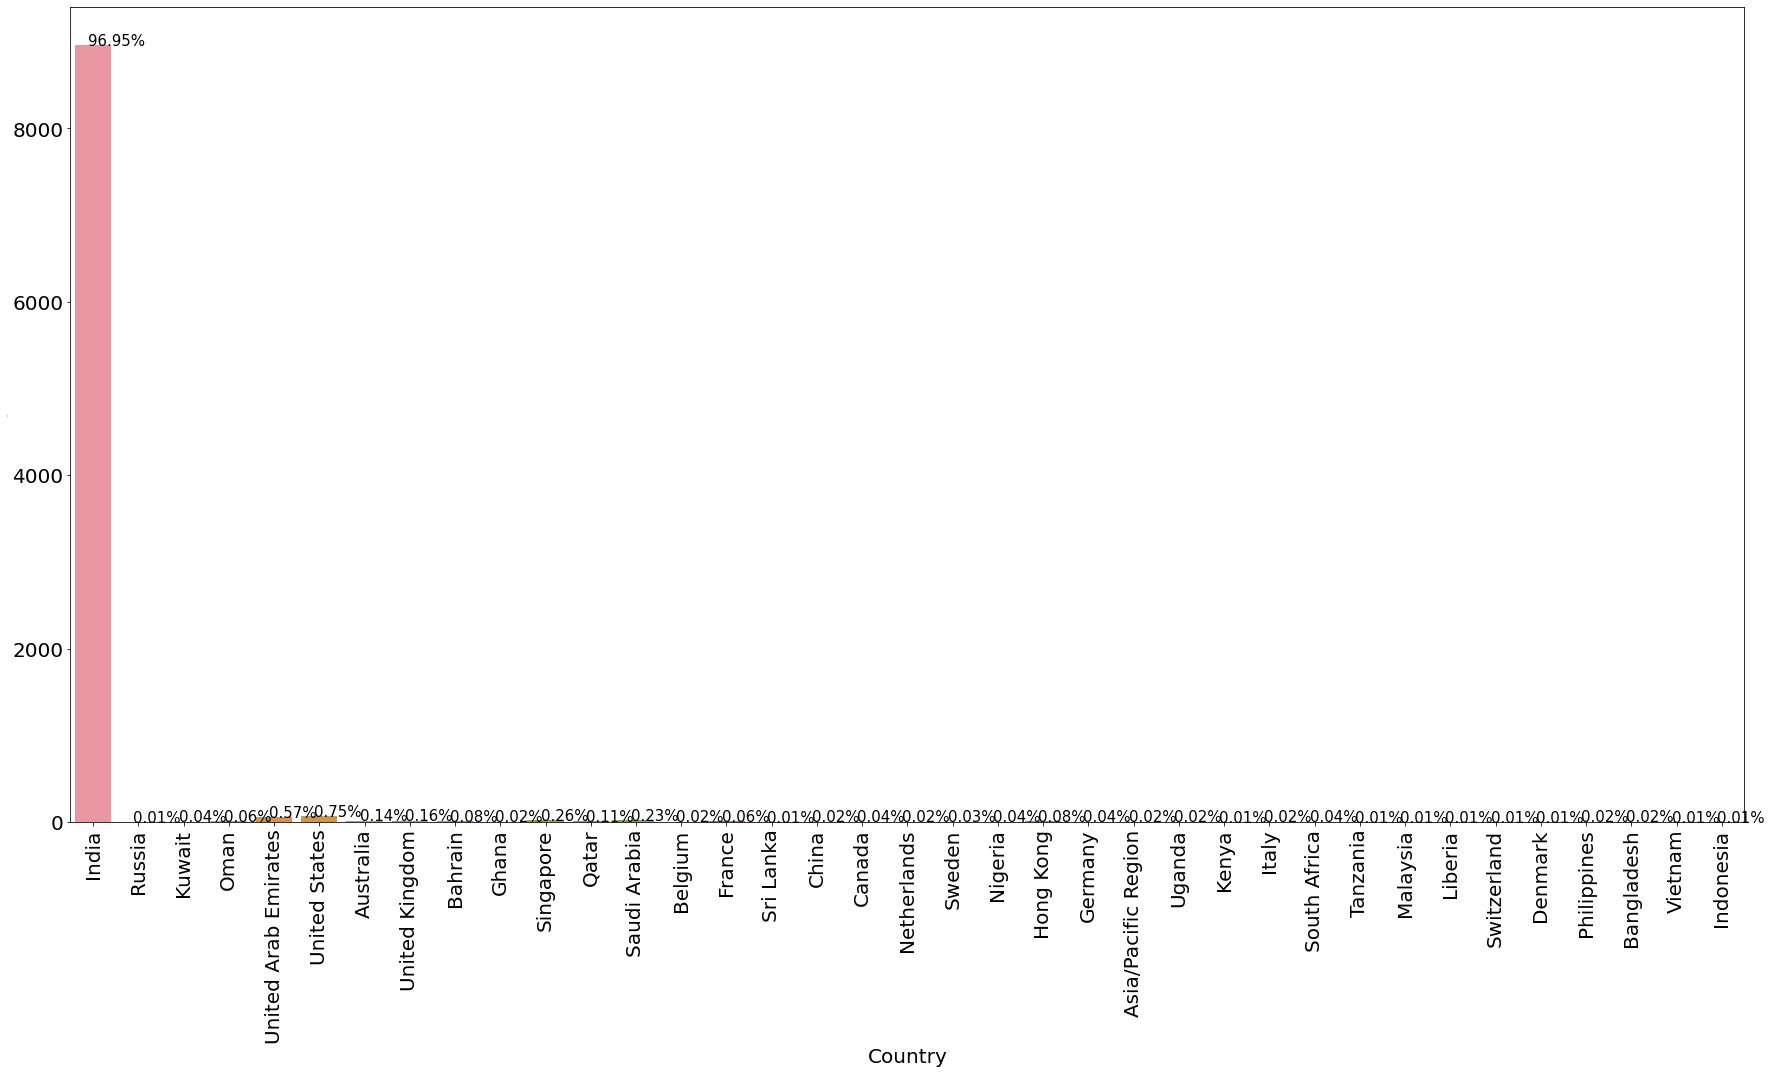

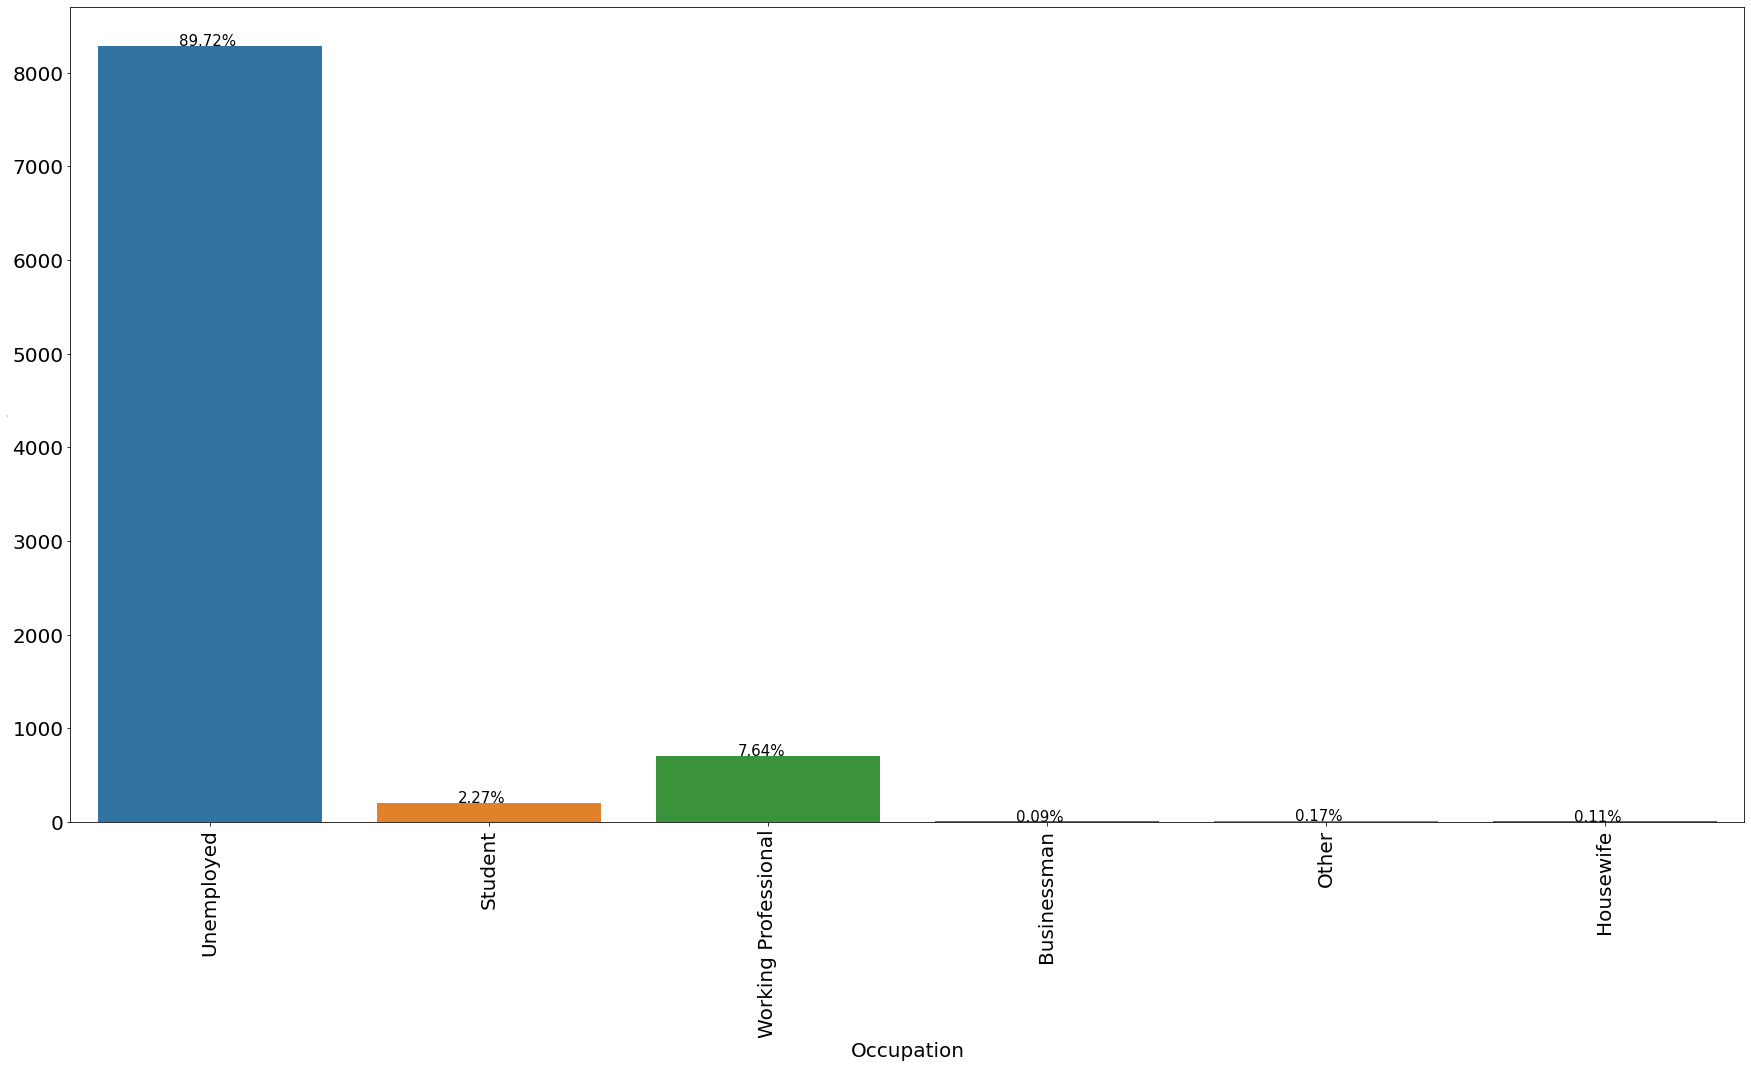

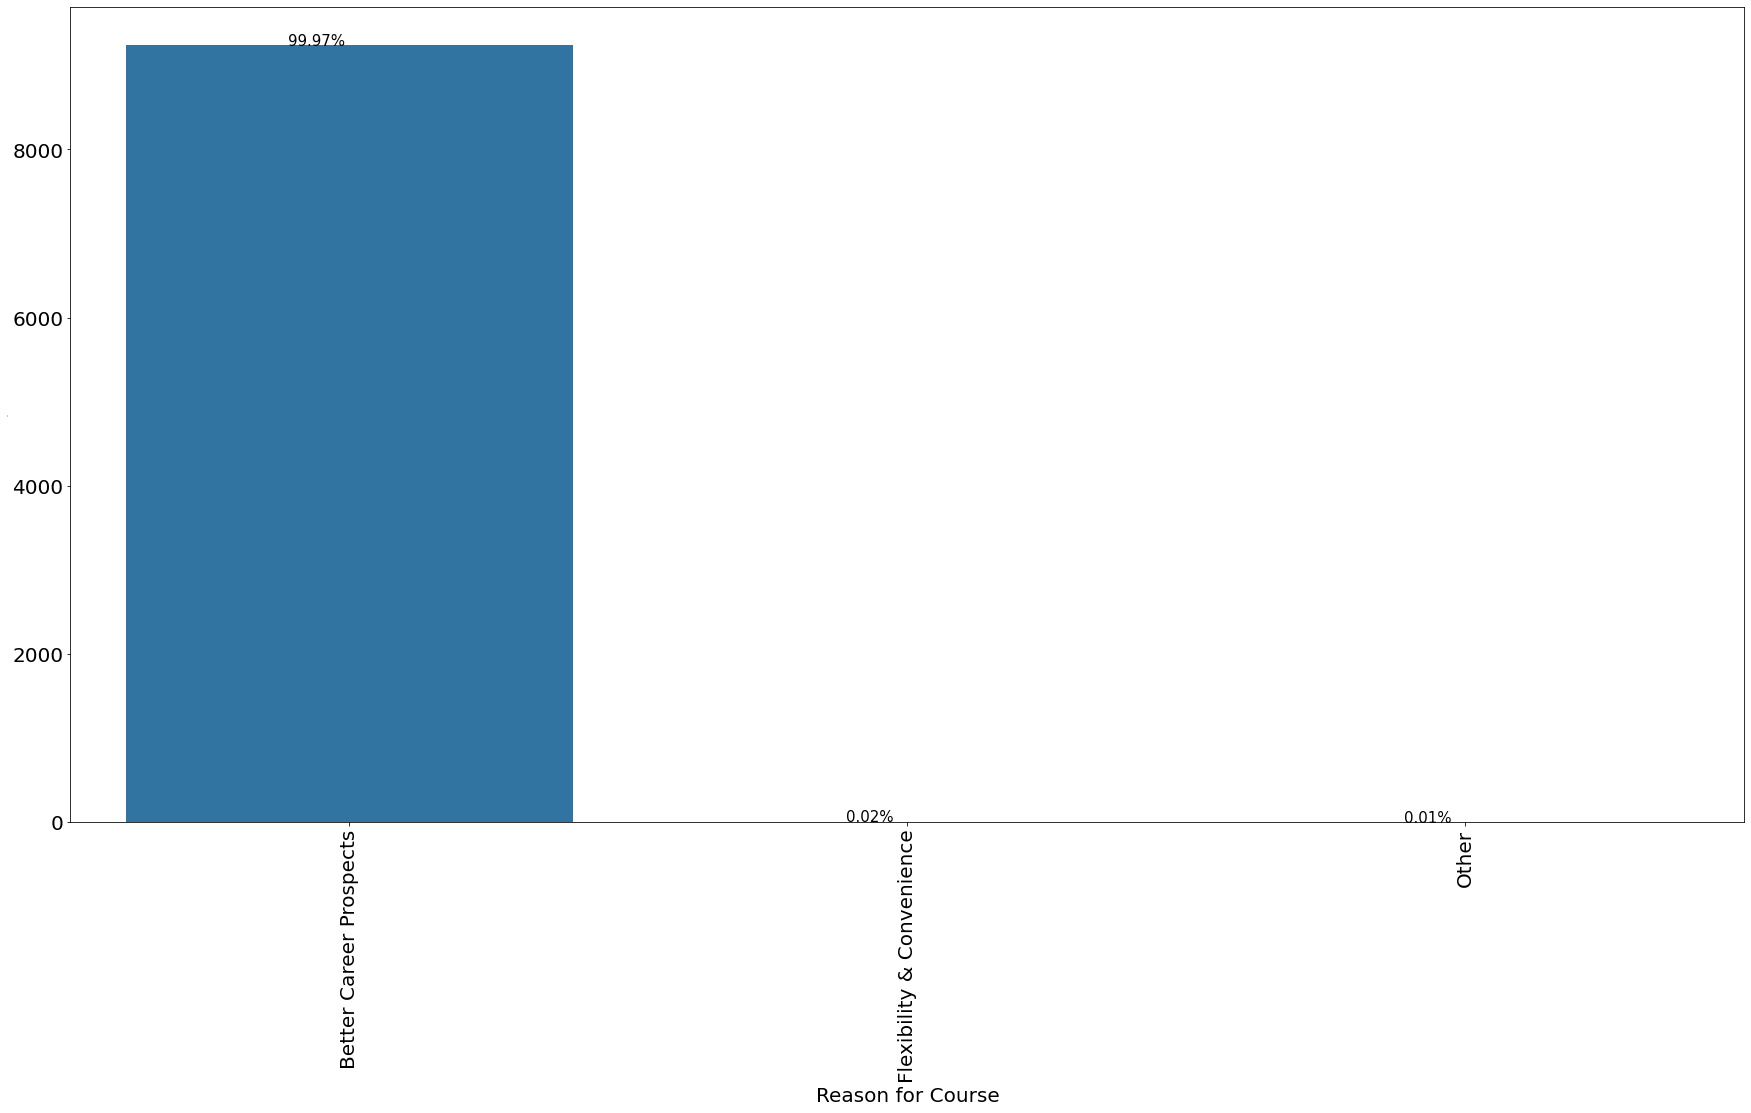

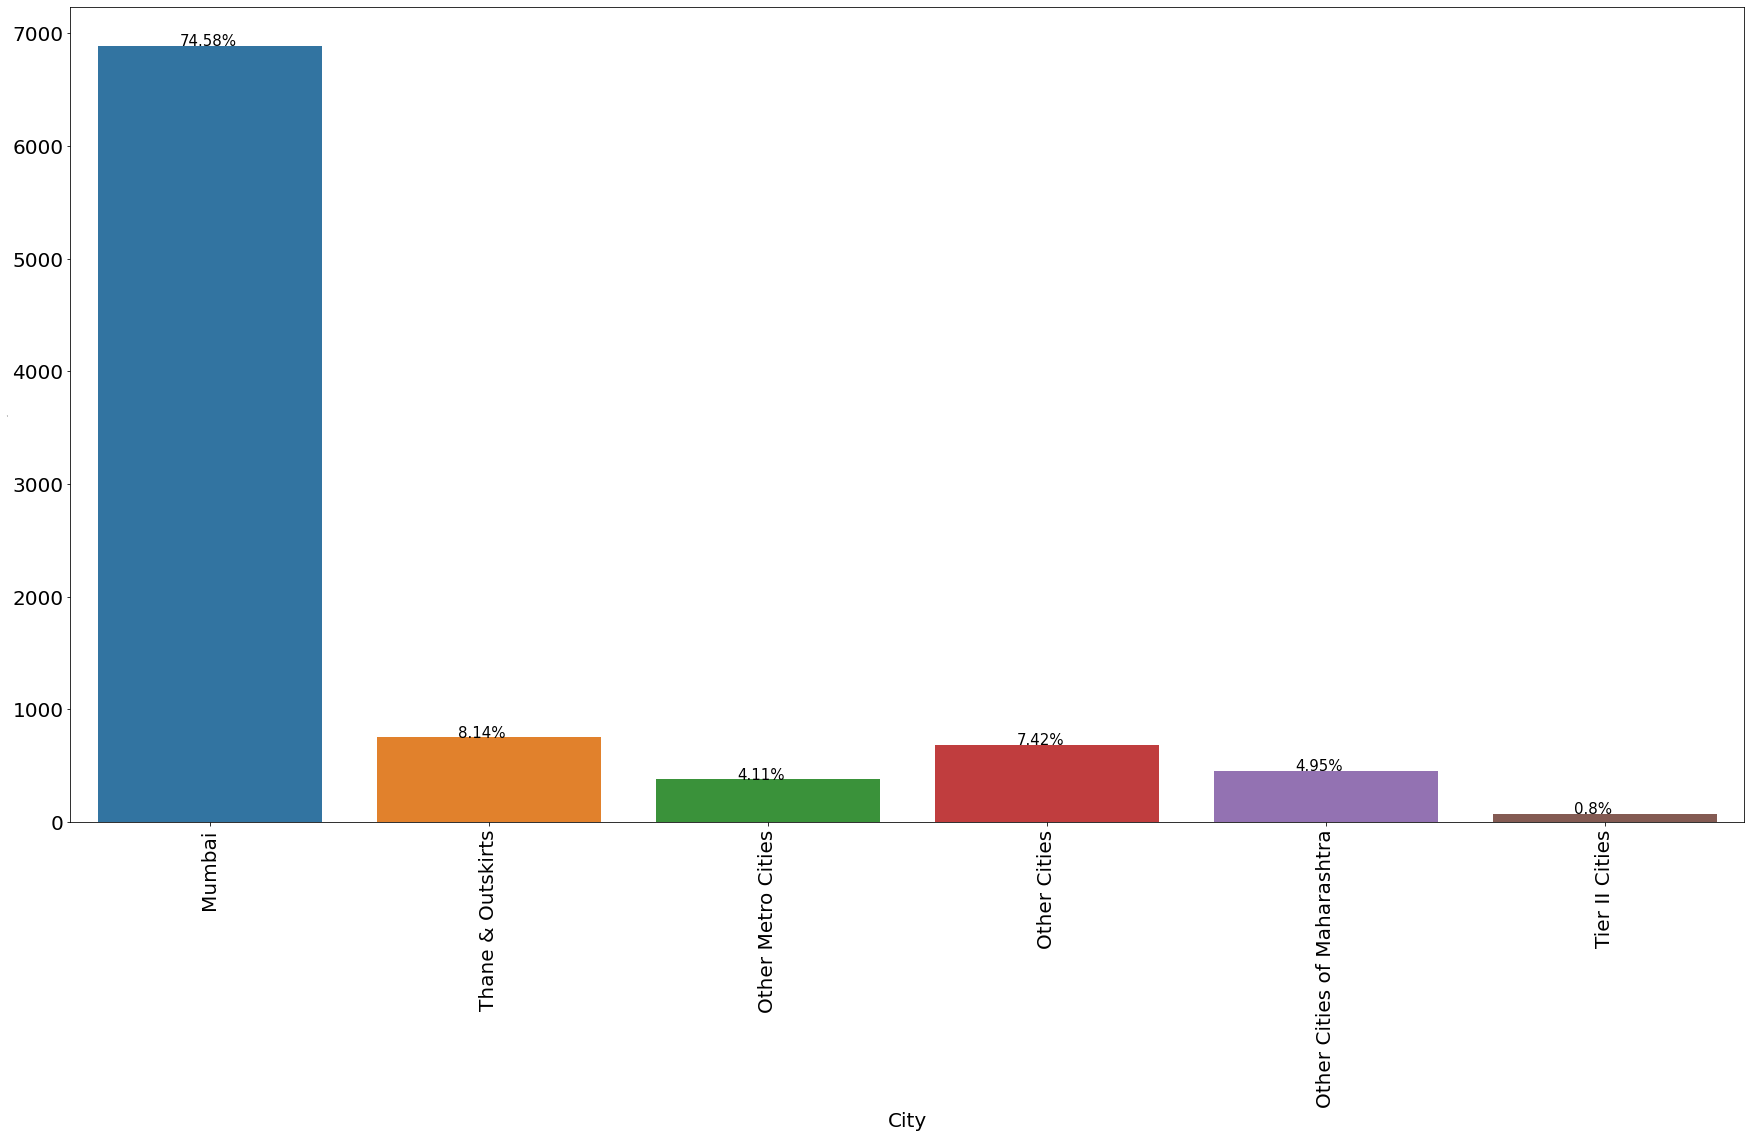

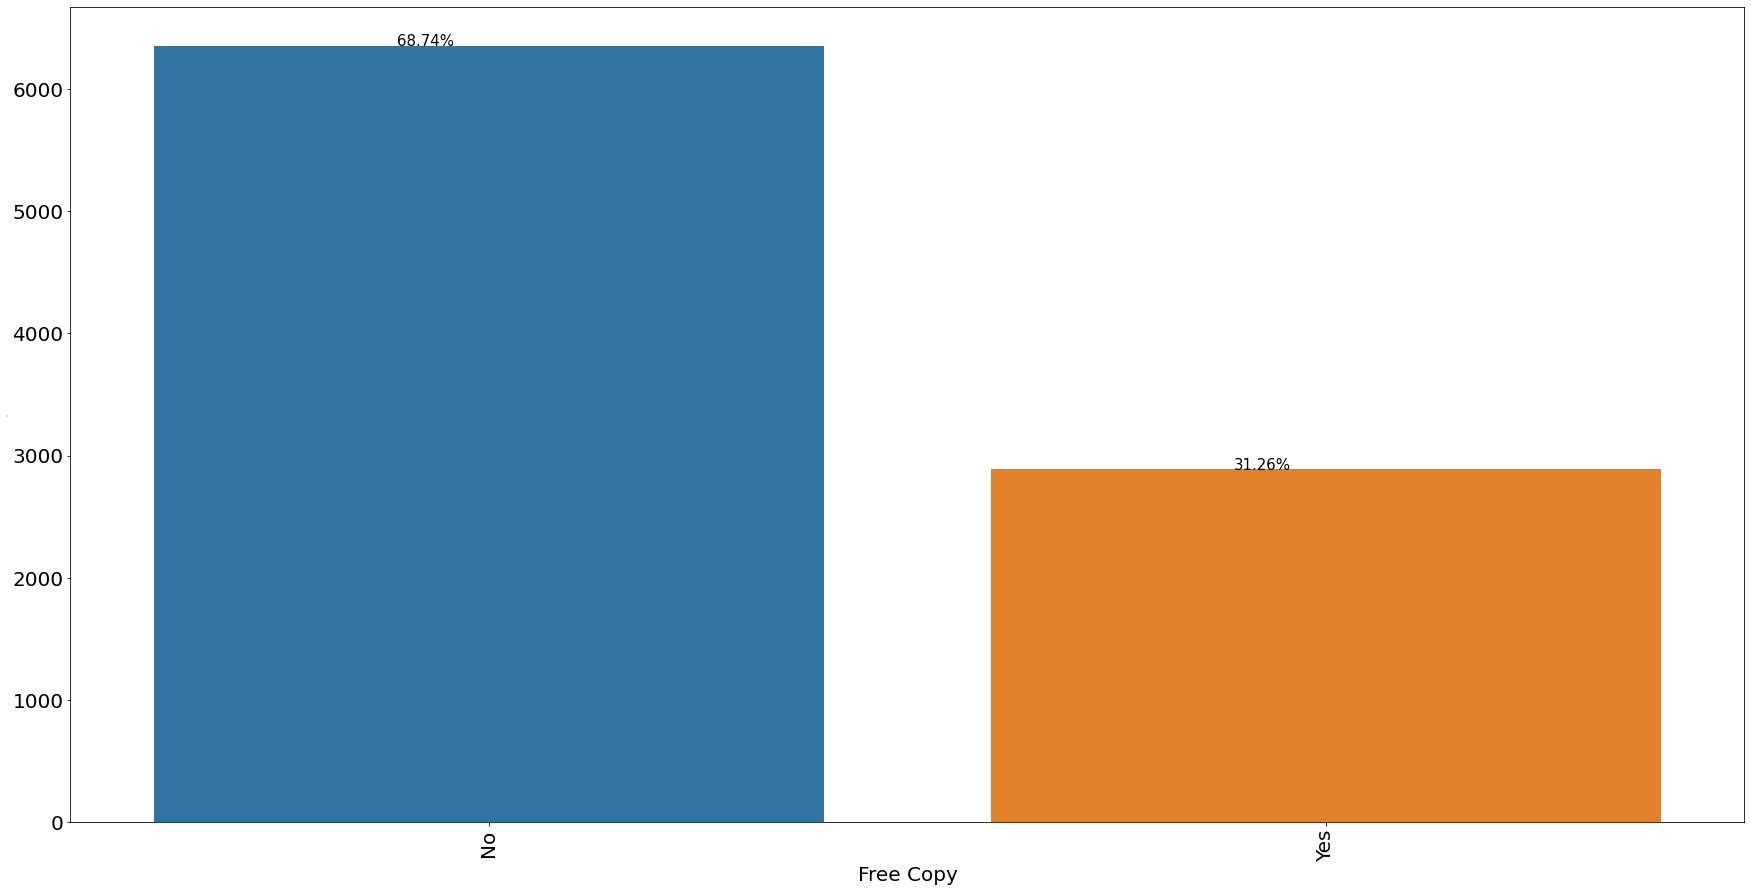

In [37]:
# Plotting the graphs of categorical columns to get the counts

cnt(['Lead Origin','Lead Source','Converted','Country','Occupation','Reason for Course', 'City', 'Free Copy'])

In [38]:
# The country and Reason for Course fields still have quite large skewness. Thus dropping it.

lead_df=lead_df.drop(['Country','Reason for Course'], axis=1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Occupation,City,Free Copy
0,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,Mumbai,No
1,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,Mumbai,No


In [39]:
lead_df.shape

(9240, 10)

In [40]:
# Let's finally look at all the categorical columns and its values

v_cnts(['Lead Origin','Lead Source','Converted','Occupation','City','Free Copy']) #checking values for each columns 

***************************************************************
Lead Origin
----------------------------------------------------------------
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
***************************************************************
Lead Source
----------------------------------------------------------------
Google              31.428571
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Others               0.898268
Name: Lead Source, dtype: float64
***************************************************************
Converted
----------------------------------------------------------------
0    61.461039
1    38.538961
Name: Converted, dtype: float64
************************

______________________________________________________________________________________________________________________________________________________________________________________________________________________

### <font color=purple> Understanding the continuous variables and imputing the null values with the median

In [41]:
# Let's look at all the continuous columns and its values

v_cnts(['TotalVisits','Page Views Per Visit','Total Time Spent on Website']) #checking values for each columns 

***************************************************************
TotalVisits
----------------------------------------------------------------
0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
27.0      0.054113
25.0      0.054113
24.0      0.054113
22.0      0.032468
26.0      0.021645
29.0      0.021645
28.0      0.021645
115.0     0.010823
54.0      0.010823
43.0      0.010823
30.0      0.010823
32.0      0.010823
74.0      0.010823
251.0     0.010823
41.0      0.010823
141.0     0.010823
42.0      0.010823
55.0      0.010823
Name: TotalVisits, dtype: float64
***************************

In [42]:
# Checking mean values for all the available continuous variables

print('Mean value of TotalVisits: ',lead_df['TotalVisits'].mean())
print('Mean value of Page Views Per Visit: ',lead_df['Page Views Per Visit'].mean())
print('Mean value of Total Time Spent on Website: ',lead_df['Total Time Spent on Website'].mean())

Mean value of TotalVisits:  3.445237833681204
Mean value of Page Views Per Visit:  2.3628199494672084
Mean value of Total Time Spent on Website:  487.6982683982684


In [43]:
# Replacing continuous variables with median values

lead_df['TotalVisits'] = lead_df['TotalVisits'].replace(np.nan, lead_df['TotalVisits'].mean())
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].replace(np.nan, lead_df['Page Views Per Visit'].mean())
lead_df['Total Time Spent on Website'] = lead_df['Total Time Spent on Website'].replace(np.nan, lead_df['Total Time Spent on Website'].mean())

In [44]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Number                  9240 non-null   int64  
 1   Lead Origin                  9240 non-null   object 
 2   Lead Source                  9240 non-null   object 
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Occupation                   9240 non-null   object 
 8   City                         9240 non-null   object 
 9   Free Copy                    9240 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


### <font color=red><u> INFERENCE</u>
    
__There are no columns with null values.__

______________________________________________________________________________________________________________________________________________________________________________________________________________________

### <font color=purple> Checking outliers on all the continuous variables and treating them as per situation

In [45]:
# Creating a list of all the continuous variables from the dataframe

cc=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

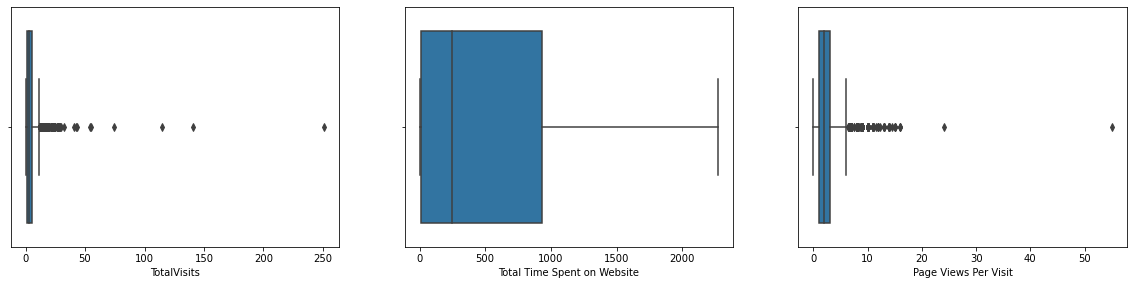

In [46]:
# Checking outliers using box_plot (with the help of function created earlier)

box_plot(cc)

### <font color=red> <u>INFERENCE</u> </font>
__1. TotalVisits and Page Views Per Visit has outliers in its upper range.__<br>
__2. We will use capping to treat the outliers__

In [47]:
# Capping the outliers at the 95th percentile

cap=['TotalVisits','Page Views Per Visit']
for var in cap:
    q4 = lead_df[var].quantile(0.95)
    lead_df[var][lead_df[var]>=q4] = q4    

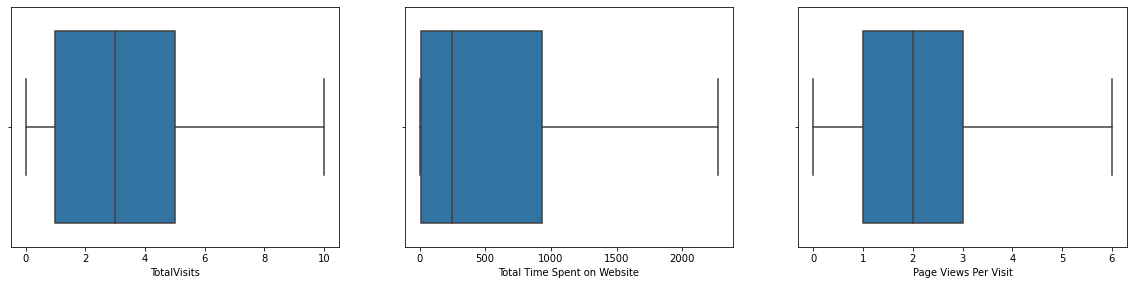

In [48]:
# Plotting the graphs once again to check the outliers post capping

box_plot(cc)

In [49]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.185822,487.698268,2.260484
std,23405.995698,0.486714,2.761315,548.021466,1.779240
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,10.000000,2272.000000,6.000000


### <font color=red> <u>INFERENCE</u></font> 
__1. Post Capping there are no outliers__<br>
__2. TotalVisits: The meadian is 3 Visits, and the maximum visits is 10__<br>
__3. Total Time Spent on Website: Average of 250hrs was spent on websiite__<br>
__4. Page Views Per Visits: 2 views per vists is the average and maximum is 6 visits__

In [50]:
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Occupation',
       'City', 'Free Copy'],
      dtype='object')

______________________________________________________________________________________________________________________________________________________________________________________________________________________

### <font color=purple> Visualizing the final dataframe

In [51]:
col=['Lead Origin', 'Lead Source', 'TotalVisits', 'Occupation', 'City', 'Free Copy']

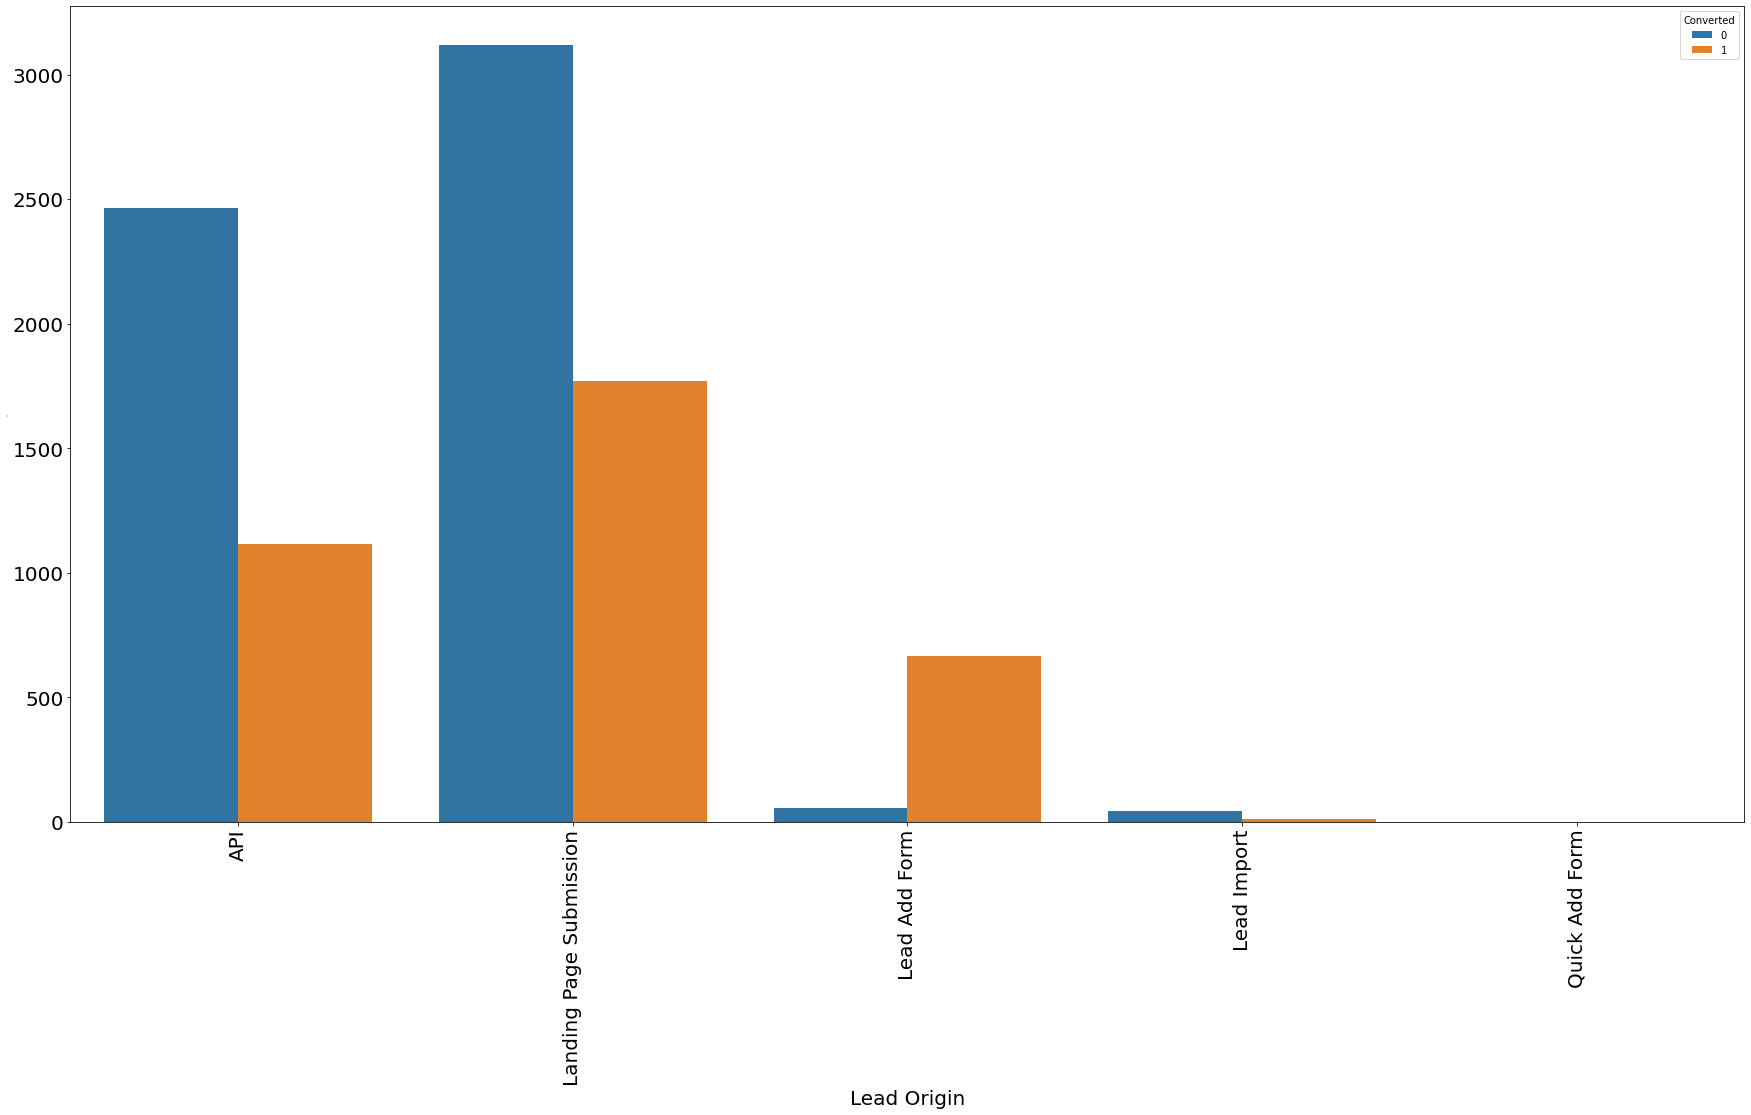

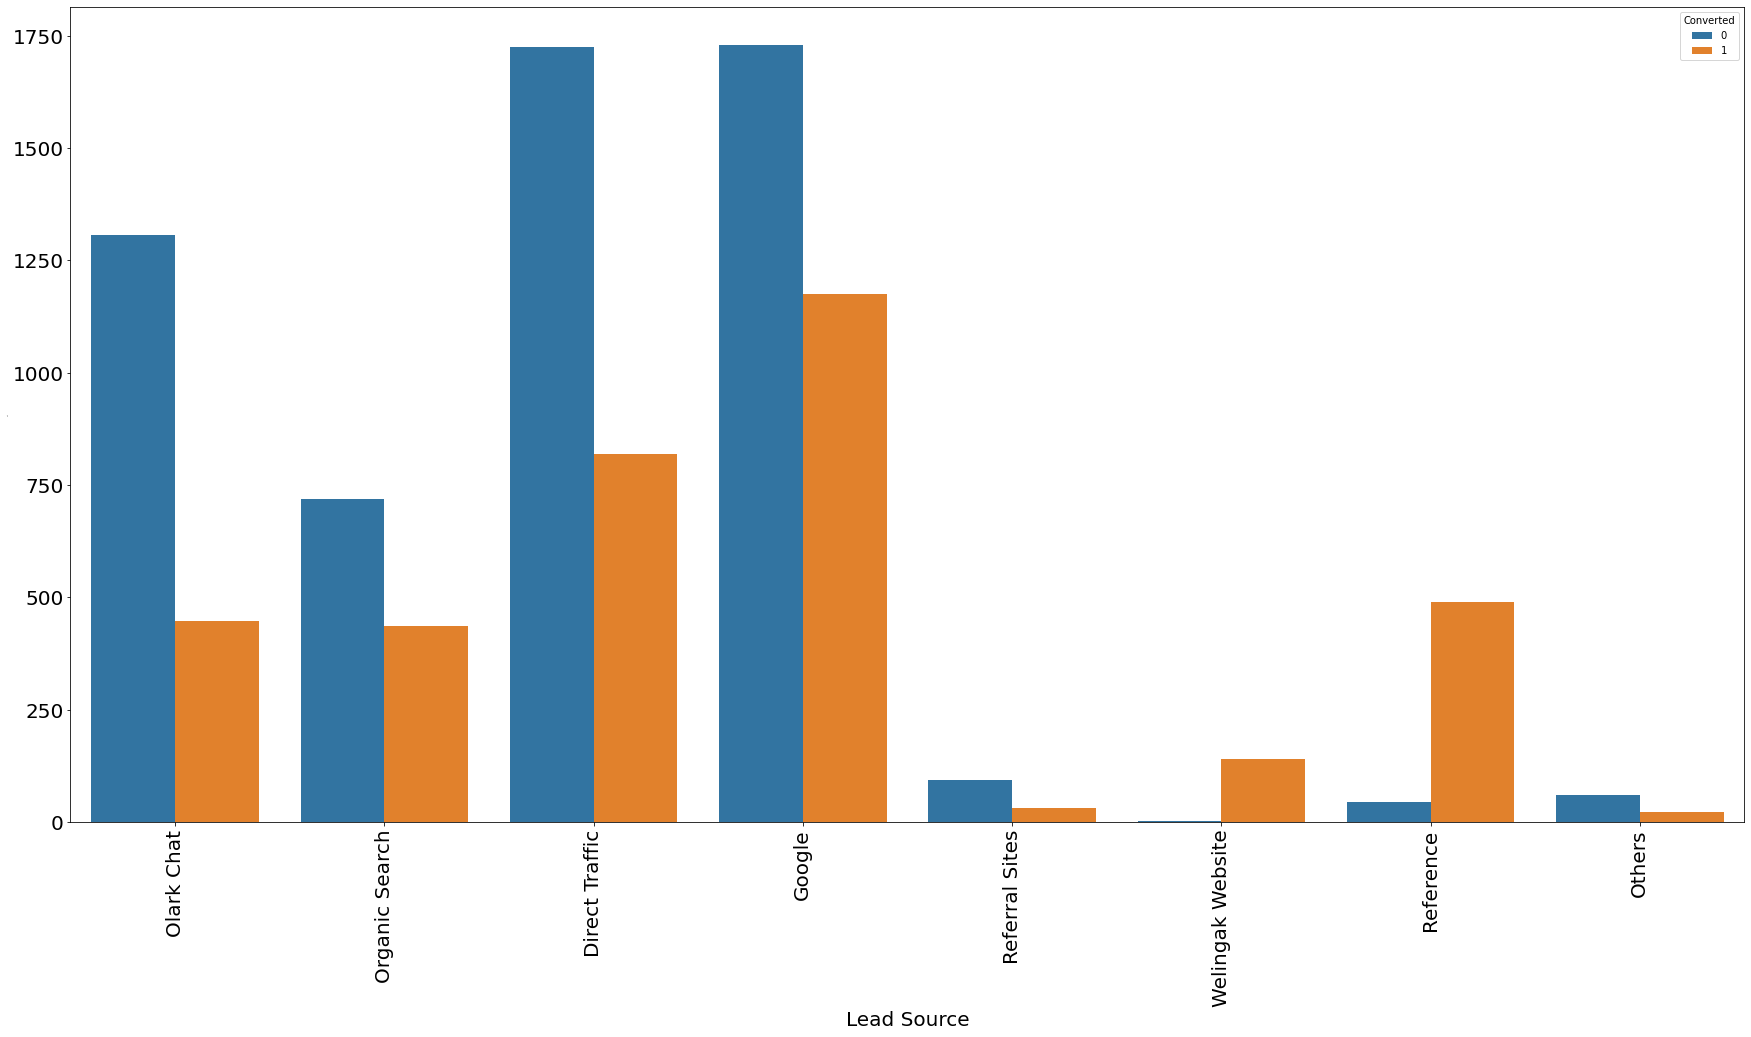

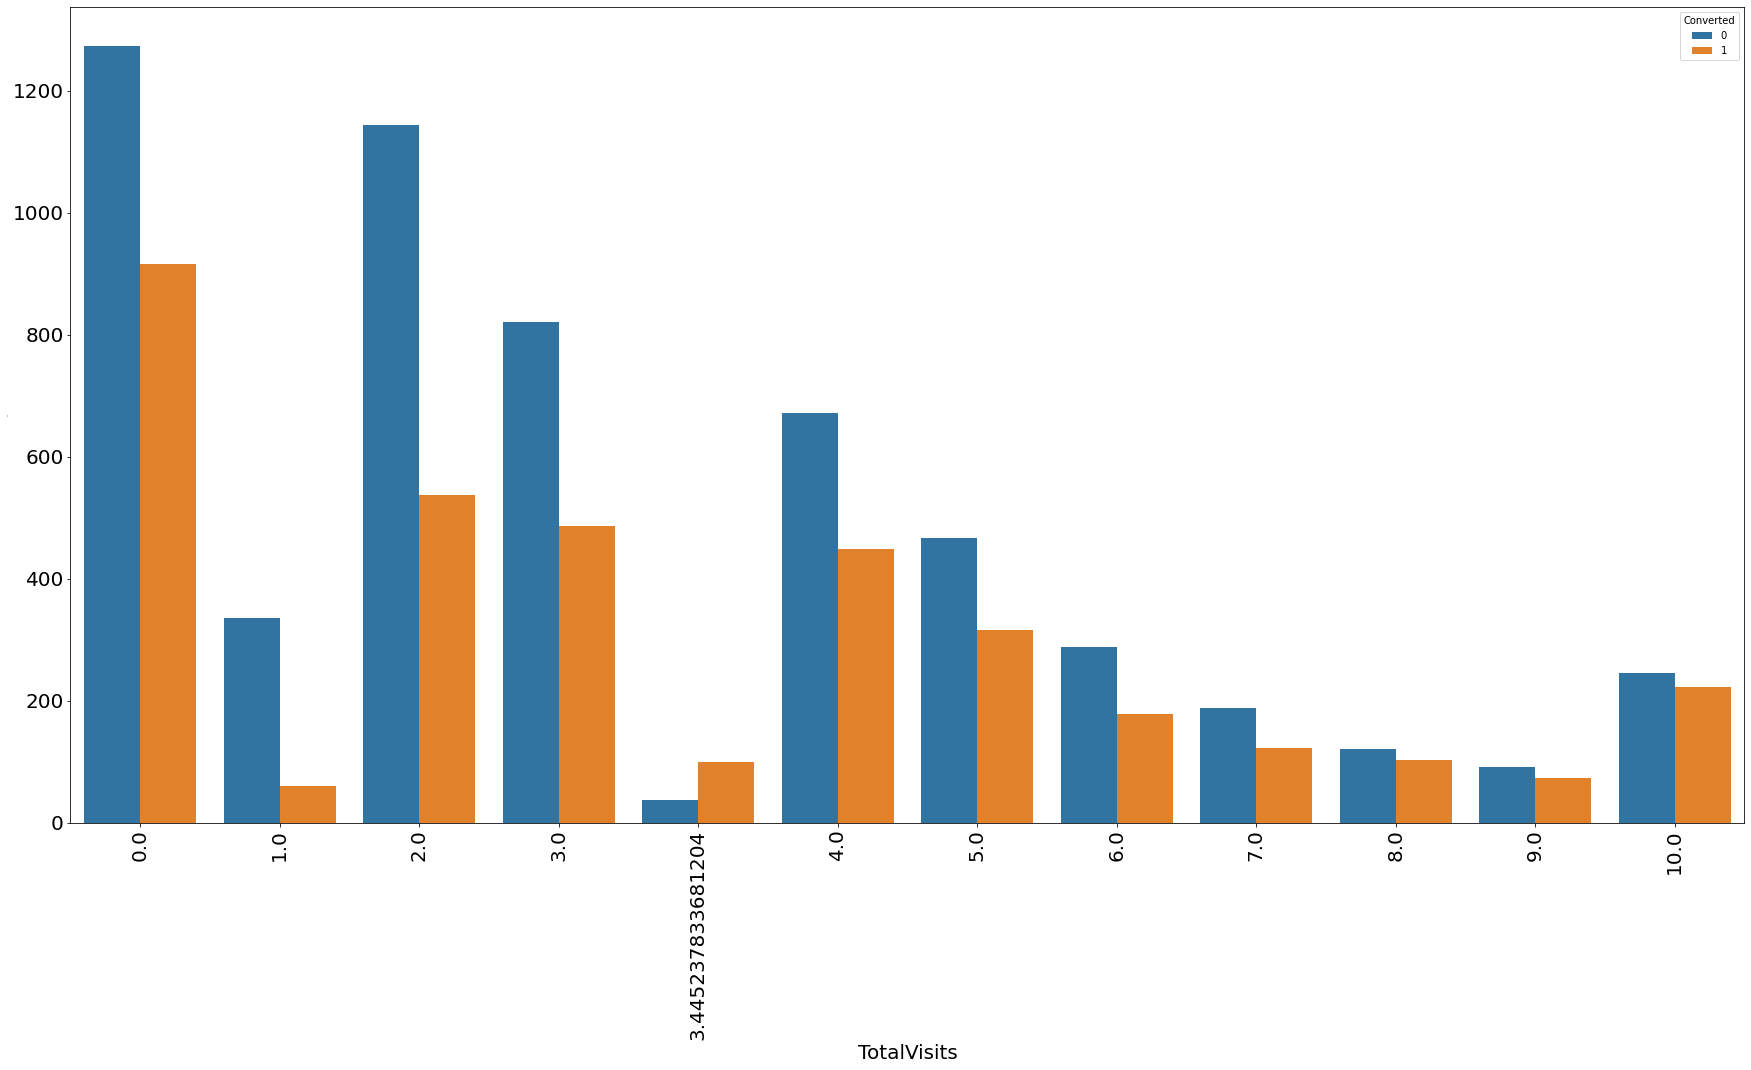

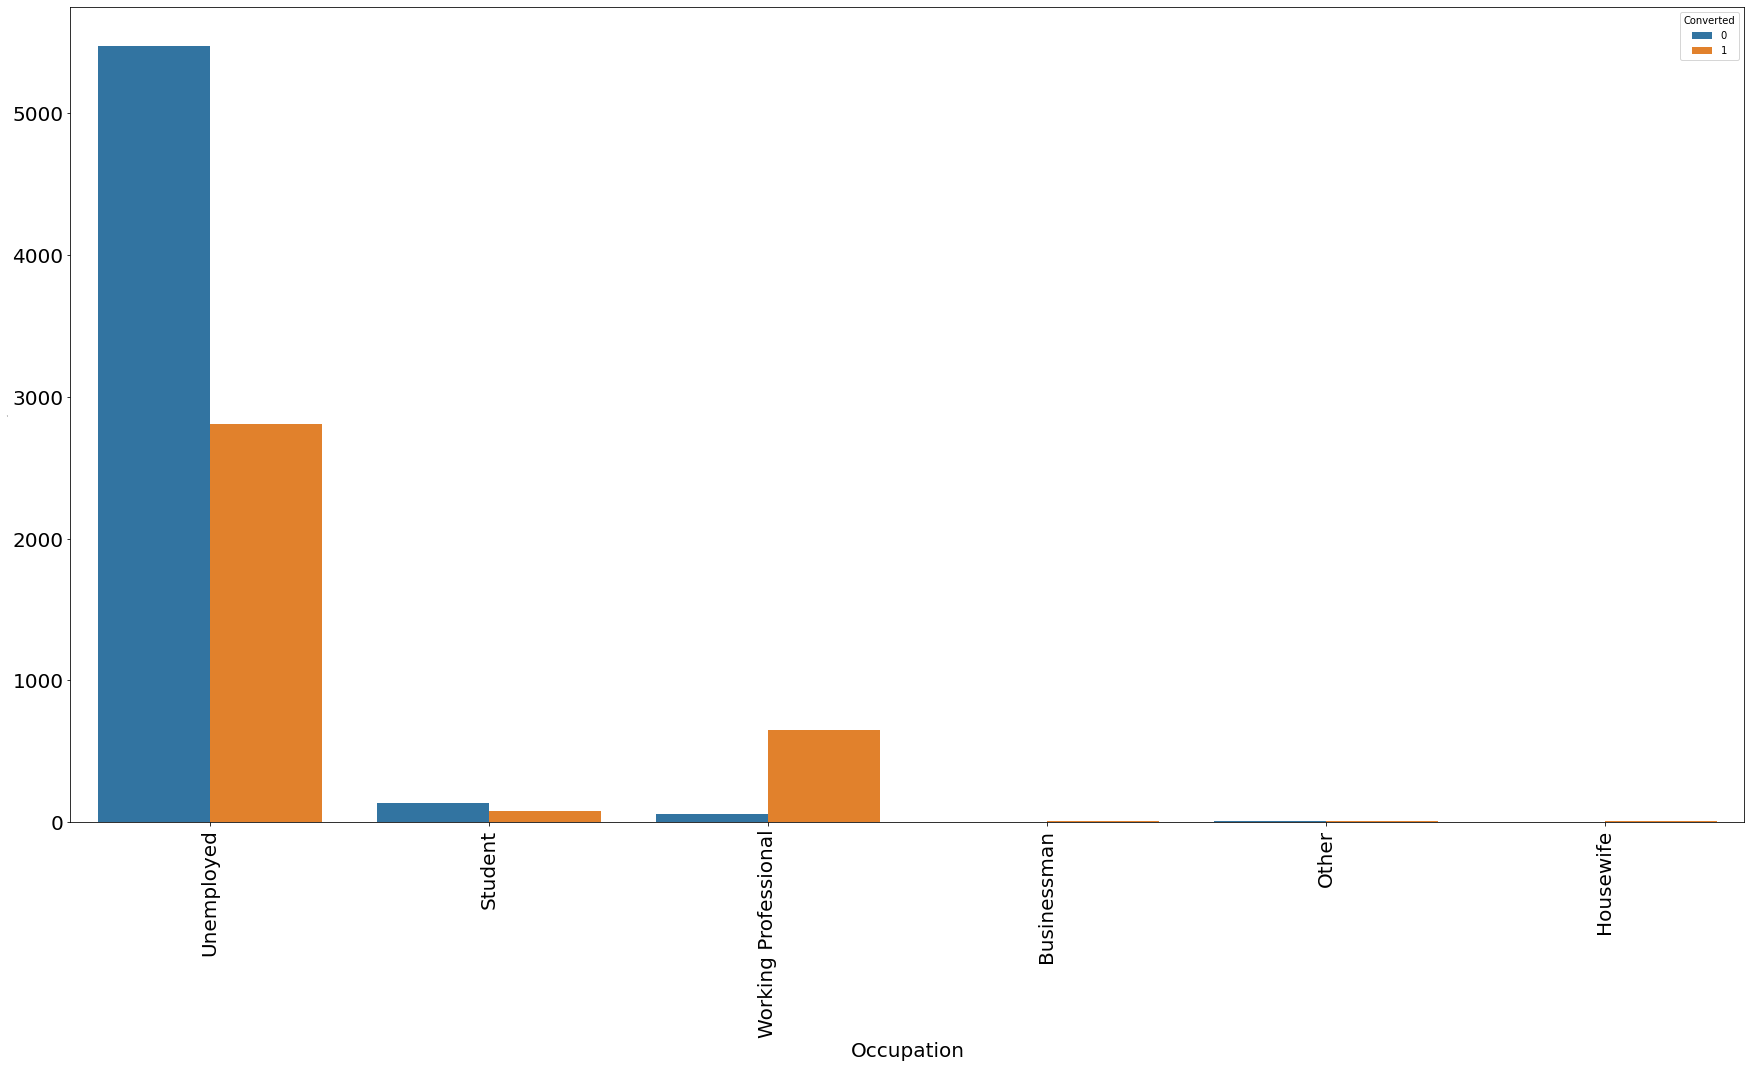

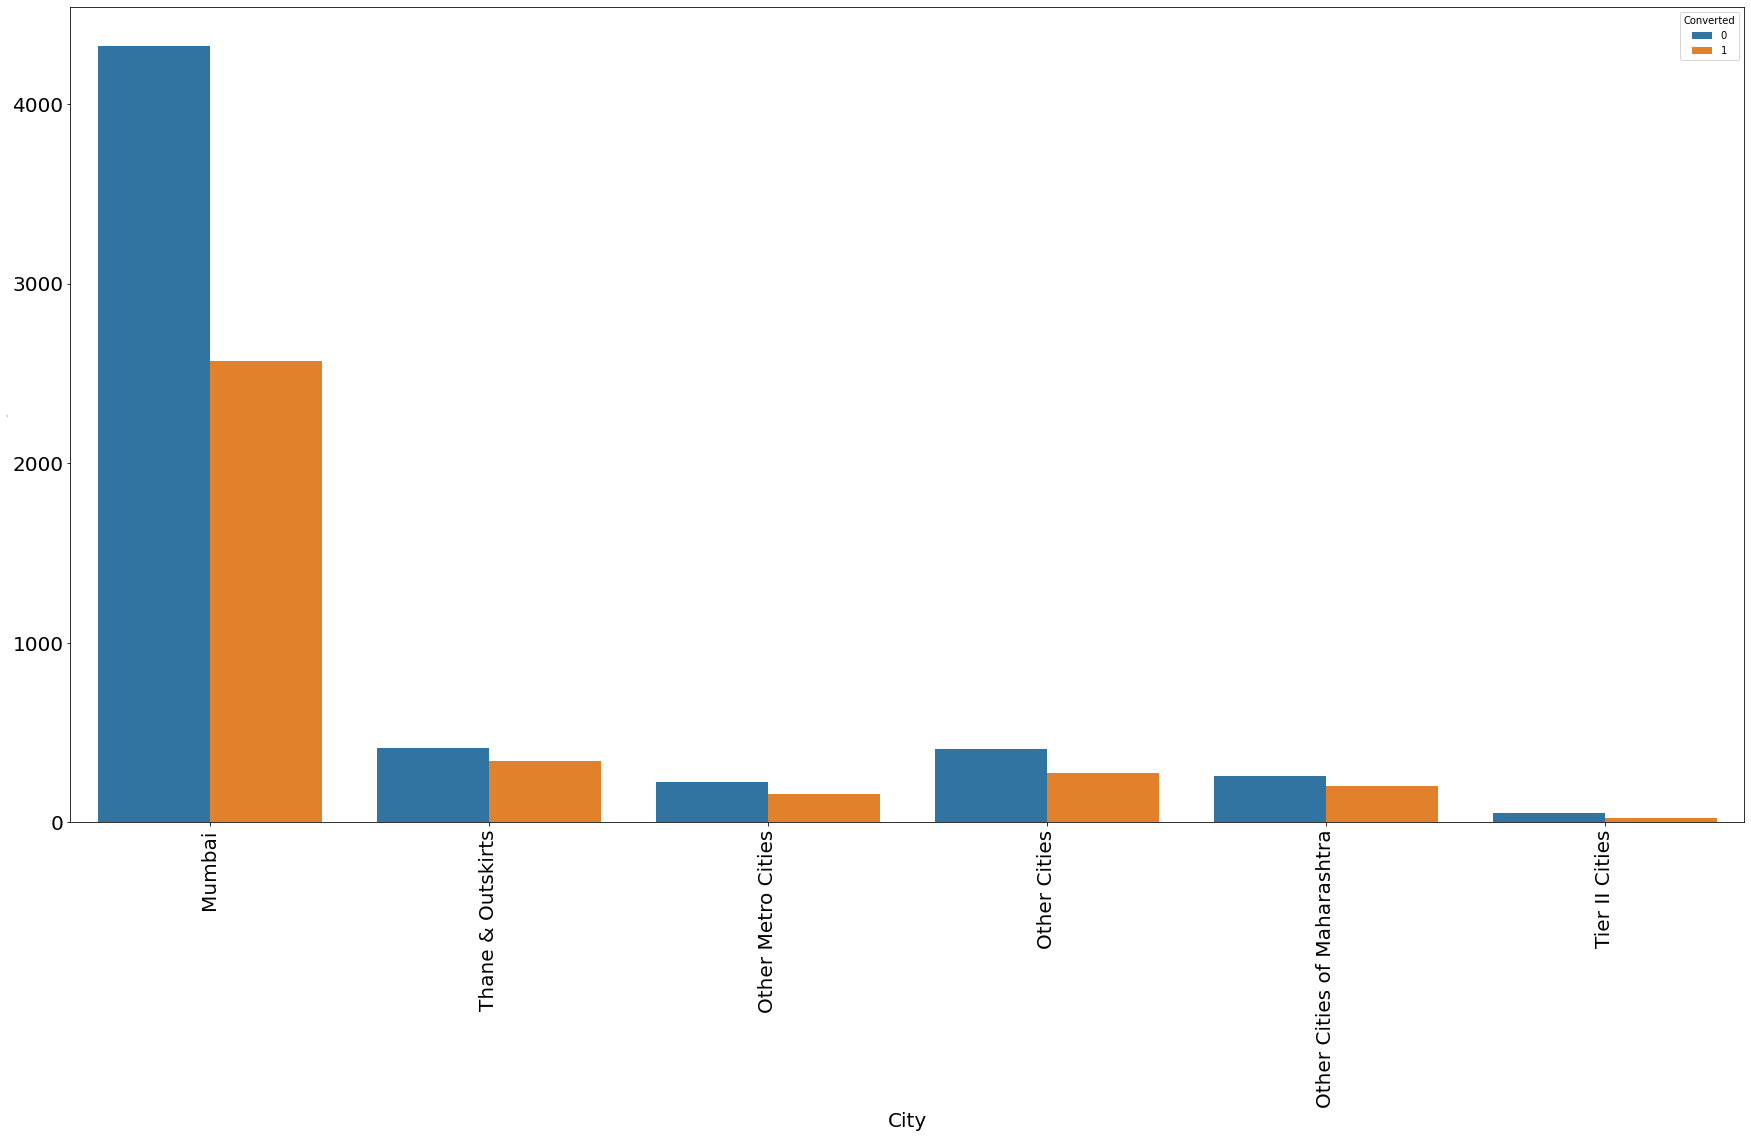

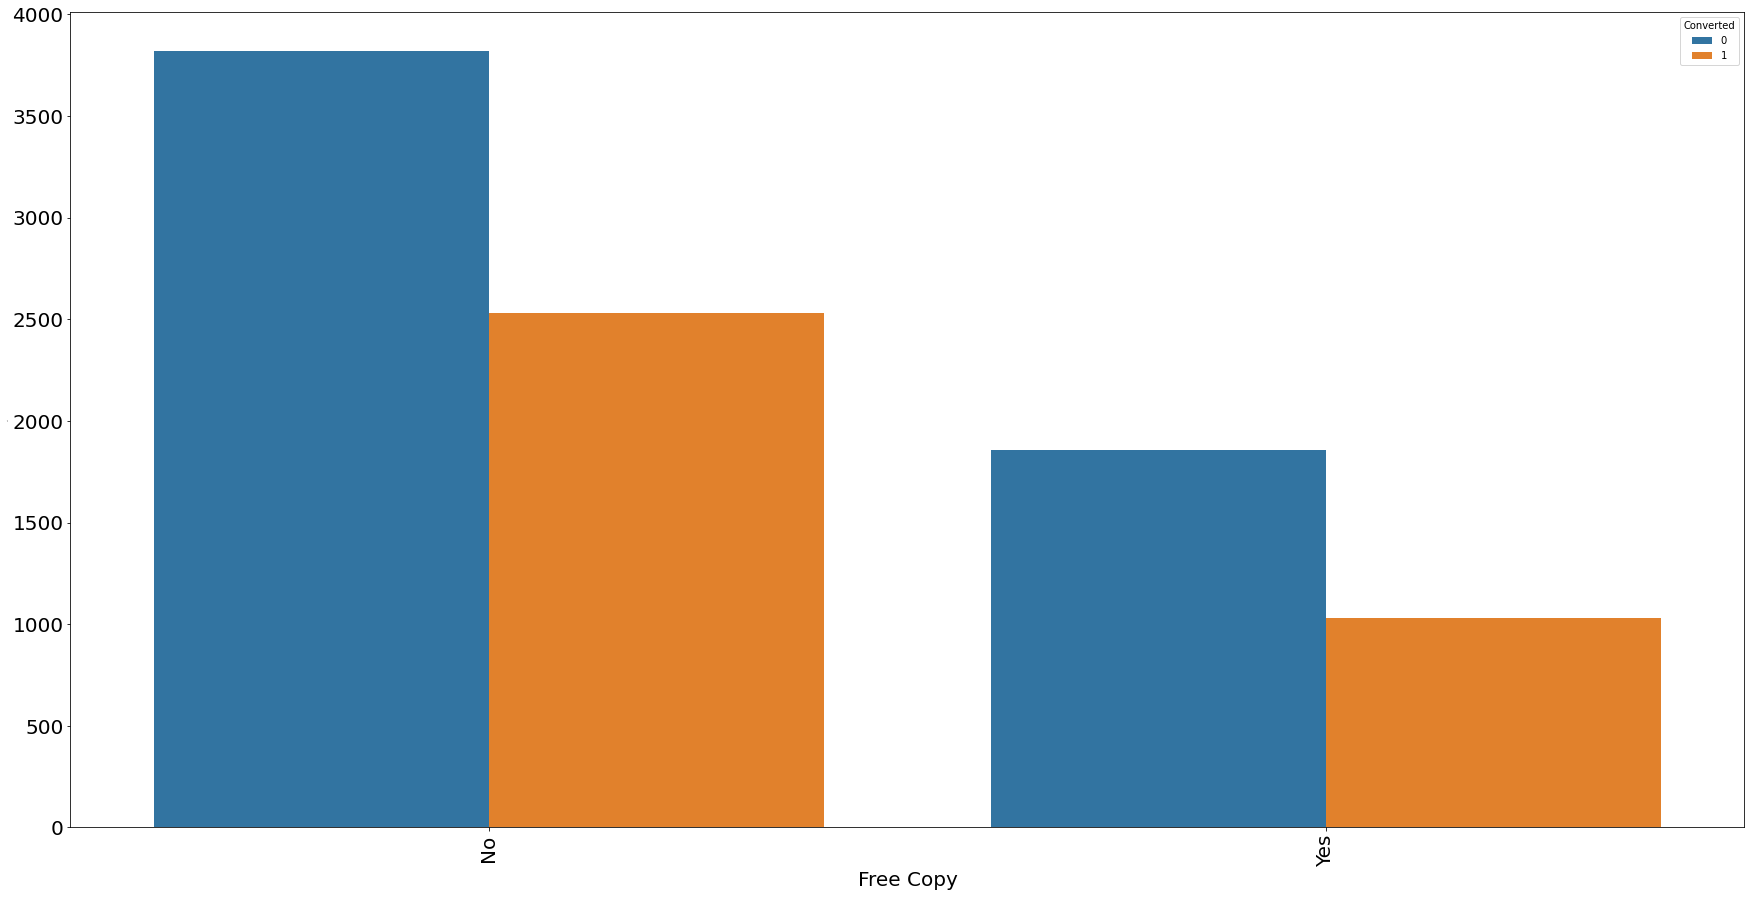

In [52]:
cnt_con(col)

### <font color=red> <u>INFERENCE</u></font> 
__1. As compared to other Lead origin, lead add form had much higher prospects of leads getting converted__<br>
__2. Google is the good source however leads from Welingak Website and Reference have higher percentage of getting converted.__<br>
__3. TotalVisits if 1 have lesser percentage of getting converted.__<br>
__4. Working professional, Businessman and Housewife are the occupations with higher percentages of people getting converted.__<br>
__5. count of leads from Mumbai are higher which get converted.__<br>
__6. The free copy does not really seem to have much effect on the conversion of leads.__

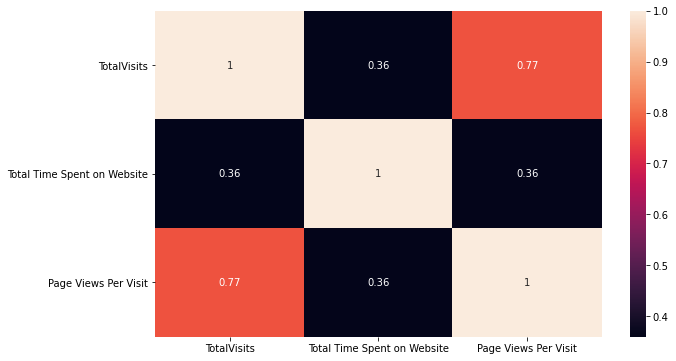

In [53]:
# checking correlation between the columns of the lead dataframe using heatmaps

plt.figure(figsize=(10,6))
sns.heatmap(lead_df[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']].corr(), annot=True)
plt.show()

### <font color=red> <u>INFERENCE</u></font> 
__1. TotalVisits and Page Views per visit are quite highly correlated.__<br>
__2. Total Time Spent on Website is equally correlated to TotalVisits and Page Views Per Visit.__

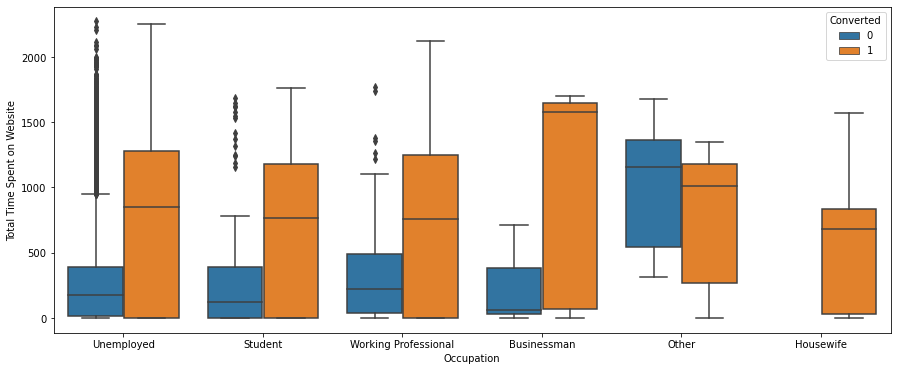

In [54]:
# Understanding data using box plots

plt.figure(figsize=(15,6))
sns.boxplot(data=lead_df, x='Occupation',y='Total Time Spent on Website',hue='Converted')
plt.show()

### <font color=red> <u>INFERENCE</u></font> 
__1. Most of the Businessman that has large amount of time spent on Website got converted.__<br>
__2. All the housewives got converted irrespective of the total time spent on the website.__<br>
__3. The proportion of leads belonging to Other occupation are the ones with very less probability of getting converted.__

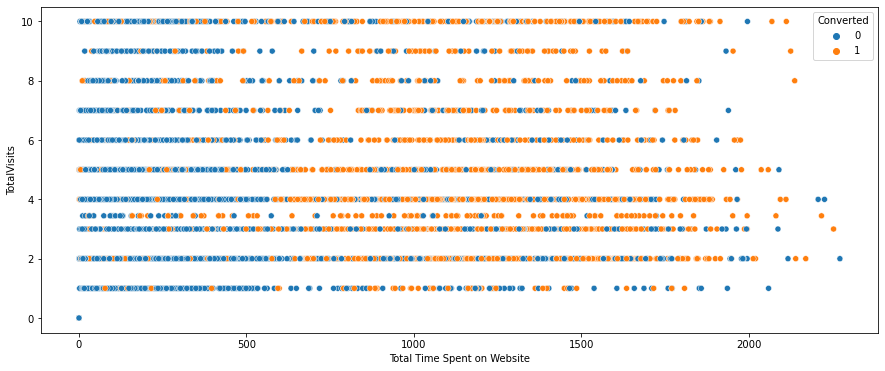

In [55]:
# Analyzing continuous variables using scatter plot

plt.figure(figsize=(15,6))
sns.scatterplot(x=lead_df['Total Time Spent on Website'],y=lead_df['TotalVisits'], hue=lead_df['Converted'])
plt.show()

### <font color=red> <u>INFERENCE</u></font> 
__1. Leads spending more time on website and visit multiple times has higher probability of getting converted.__

### <font color=blue>Our final dataframe has 10 columns and 9240 rows, we had begun with same number of rows but 37 columns.</font><br><br>__Thus we have retained all the leads i.e.(100%) for our analysis.__


# Step3: Data Preparation for Modelling

In [56]:
# 'Free Copy' has Yes and No value which can be coverted to binary 1 and 0 for modelling

var =  ['Free Copy']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function 
lead_df[var] = lead_df[var].apply(binary_map)

In [57]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Occupation,City,Free Copy
0,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,Mumbai,0


______________________________________________________________________________________________________________________________________________________________________________________________________________________

### <font color=purple> Creating Dummy variables for Categorical columns

In [58]:
# Creating dummy variables for the variable 'Lead Origin','Lead Source','Occupation','City' one by one and adding it to the dataframe

lo = pd.get_dummies(lead_df['Lead Origin'], prefix='LO_',drop_first=True)
lead_df= pd.concat([lead_df,lo], axis=1)

ls = pd.get_dummies(lead_df['Lead Source'], prefix='LS_',drop_first=True)
lead_df= pd.concat([lead_df,ls], axis=1)

occ = pd.get_dummies(lead_df['Occupation'],prefix='OCC_',drop_first=True)
lead_df= pd.concat([lead_df,occ], axis=1)

c = pd.get_dummies(lead_df['City'],prefix='CT_',drop_first=True)
lead_df= pd.concat([lead_df,c], axis=1)

In [59]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Occupation,City,Free Copy,...,OCC__Housewife,OCC__Other,OCC__Student,OCC__Unemployed,OCC__Working Professional,CT__Other Cities,CT__Other Cities of Maharashtra,CT__Other Metro Cities,CT__Thane & Outskirts,CT__Tier II Cities
0,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,Mumbai,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,Mumbai,0,...,0,0,0,1,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student,Mumbai,1,...,0,0,1,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed,Mumbai,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,Mumbai,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# Dropping the original categorical columns

lead_df=lead_df.drop(['Lead Origin','Lead Source','Occupation','City'], axis=1)

In [61]:
lead_df.shape

(9240, 27)

In [62]:
lead_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,LO__Landing Page Submission,LO__Lead Add Form,LO__Lead Import,LO__Quick Add Form,...,OCC__Housewife,OCC__Other,OCC__Student,OCC__Unemployed,OCC__Working Professional,CT__Other Cities,CT__Other Cities of Maharashtra,CT__Other Metro Cities,CT__Thane & Outskirts,CT__Tier II Cities
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9240 non-null   int64  
 1   Converted                        9240 non-null   int64  
 2   TotalVisits                      9240 non-null   float64
 3   Total Time Spent on Website      9240 non-null   int64  
 4   Page Views Per Visit             9240 non-null   float64
 5   Free Copy                        9240 non-null   int64  
 6   LO__Landing Page Submission      9240 non-null   uint8  
 7   LO__Lead Add Form                9240 non-null   uint8  
 8   LO__Lead Import                  9240 non-null   uint8  
 9   LO__Quick Add Form               9240 non-null   uint8  
 10  LS__Google                       9240 non-null   uint8  
 11  LS__Olark Chat                   9240 non-null   uint8  
 12  LS__Organic Search  

# Step 4: Test-Train Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Putting independent variable to X

X = lead_df.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,LO__Landing Page Submission,LO__Lead Add Form,LO__Lead Import,LO__Quick Add Form,LS__Google,LS__Olark Chat,...,OCC__Housewife,OCC__Other,OCC__Student,OCC__Unemployed,OCC__Working Professional,CT__Other Cities,CT__Other Cities of Maharashtra,CT__Other Metro Cities,CT__Thane & Outskirts,CT__Tier II Cities
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
# Putting dependent variable to y

y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 5: Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,LO__Landing Page Submission,LO__Lead Add Form,LO__Lead Import,LO__Quick Add Form,LS__Google,LS__Olark Chat,...,OCC__Housewife,OCC__Other,OCC__Student,OCC__Unemployed,OCC__Working Professional,CT__Other Cities,CT__Other Cities of Maharashtra,CT__Other Metro Cities,CT__Thane & Outskirts,CT__Tier II Cities
1871,0.0,0,0.00,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6795,4.0,487,1.33,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3516,5.0,106,2.50,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8105,5.0,1230,5.00,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3934,0.0,0,0.00,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [70]:
scaler = StandardScaler() #using standard scaler
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]) #standardizing data
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,LO__Landing Page Submission,LO__Lead Add Form,LO__Lead Import,LO__Quick Add Form,LS__Google,LS__Olark Chat,...,OCC__Housewife,OCC__Other,OCC__Student,OCC__Unemployed,OCC__Working Professional,CT__Other Cities,CT__Other Cities of Maharashtra,CT__Other Metro Cities,CT__Thane & Outskirts,CT__Tier II Cities
1871,-1.152121,-0.885371,-1.269958,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6795,0.297240,0.005716,-0.519633,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3516,0.659580,-0.691418,0.140427,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8105,0.659580,1.365219,1.550812,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3934,-1.152121,-0.885371,-1.269958,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [71]:
X_train.describe() # check data

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,LO__Landing Page Submission,LO__Lead Add Form,LO__Lead Import,LO__Quick Add Form,LS__Google,LS__Olark Chat,...,OCC__Housewife,OCC__Other,OCC__Student,OCC__Unemployed,OCC__Working Professional,CT__Other Cities,CT__Other Cities of Maharashtra,CT__Other Metro Cities,CT__Thane & Outskirts,CT__Tier II Cities
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,1.090312e-16,-6.701161e-17,-5.451559e-17,0.311843,0.528139,0.079468,0.005102,0.000155,0.320037,0.190167,...,0.001391,0.001237,0.021027,0.897805,0.077613,0.076376,0.049629,0.040816,0.079314,0.007885
std,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.270489,0.071252,0.012434,0.466527,0.392463,...,0.037279,0.035150,0.143484,0.302929,0.267582,0.265619,0.217194,0.197880,0.270248,0.088453
min,-1.152121e+00,-8.853708e-01,-1.269958e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.897805e-01,-8.634138e-01,-7.058039e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.510014e-02,-4.352528e-01,-1.416499e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.595802e-01,8.098906e-01,4.225041e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.471281e+00,3.271816e+00,2.114966e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
# Checking the Hot Leads Rate

Leads_Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Leads_Converted

38.53896103896104

### <font color=red> <u>INFERENCE</u></font> 
__1. Currently conversion rate is only 38.5%.__

# Step 6: Looking at Correlations

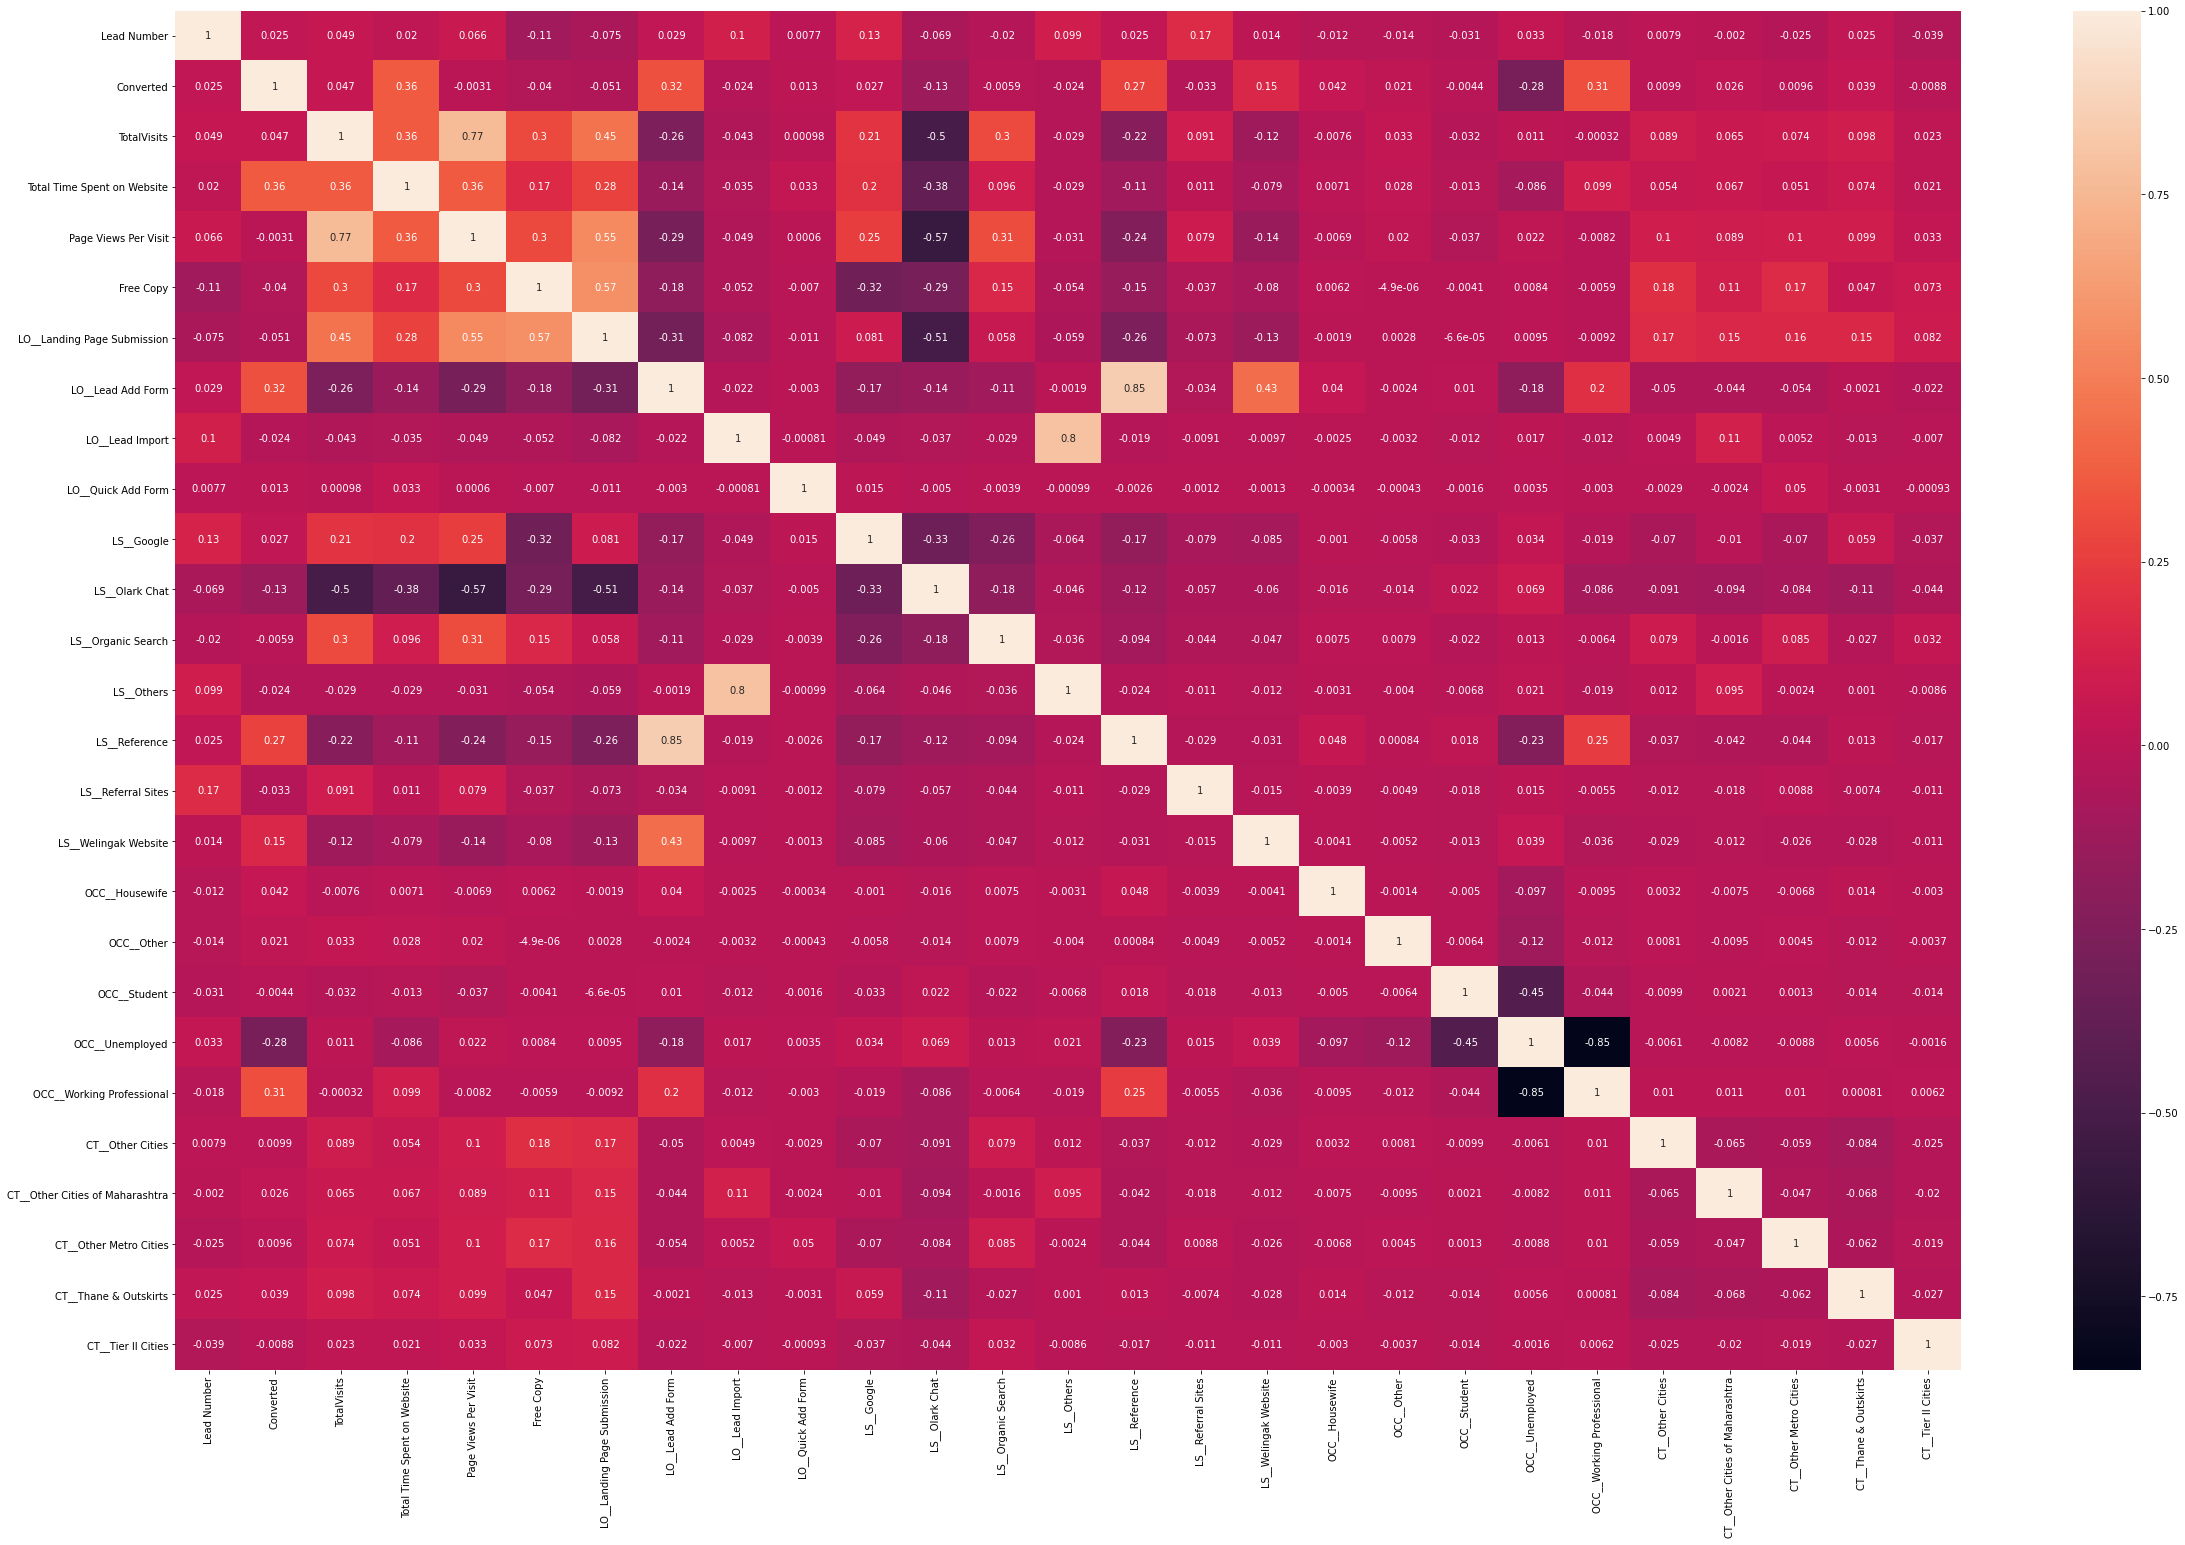

In [73]:
# checking the correlation matrix 

plt.figure(figsize = (40,25))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

In [74]:
# Pulling all the correlated column with threshold=0.6

corr_matrix = lead_df.corr().abs()
high_corr_var=np.where(corr_matrix>=0.6)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('TotalVisits', 'Page Views Per Visit'),
 ('LO__Lead Add Form', 'LS__Reference'),
 ('LO__Lead Import', 'LS__Others'),
 ('OCC__Unemployed', 'OCC__Working Professional')]

### <font color=red><u>INFERENCE</u></font>

__Thus the dummy variables which have high correlation, one of them can be dropped- LO_Lead Add Form, LS_Others and OCC_Unemployed.__

______________________________________________________________________________________________________________________________________________________________________________________________________________________

### <font color=purple> Dropping highly correlated dummy variables.</font>

In [75]:
X_test = X_test.drop(['LO__Lead Add Form','LS__Others','OCC__Unemployed'], 1)
X_train = X_train.drop(['LO__Lead Add Form','LS__Others','OCC__Unemployed'], 1)

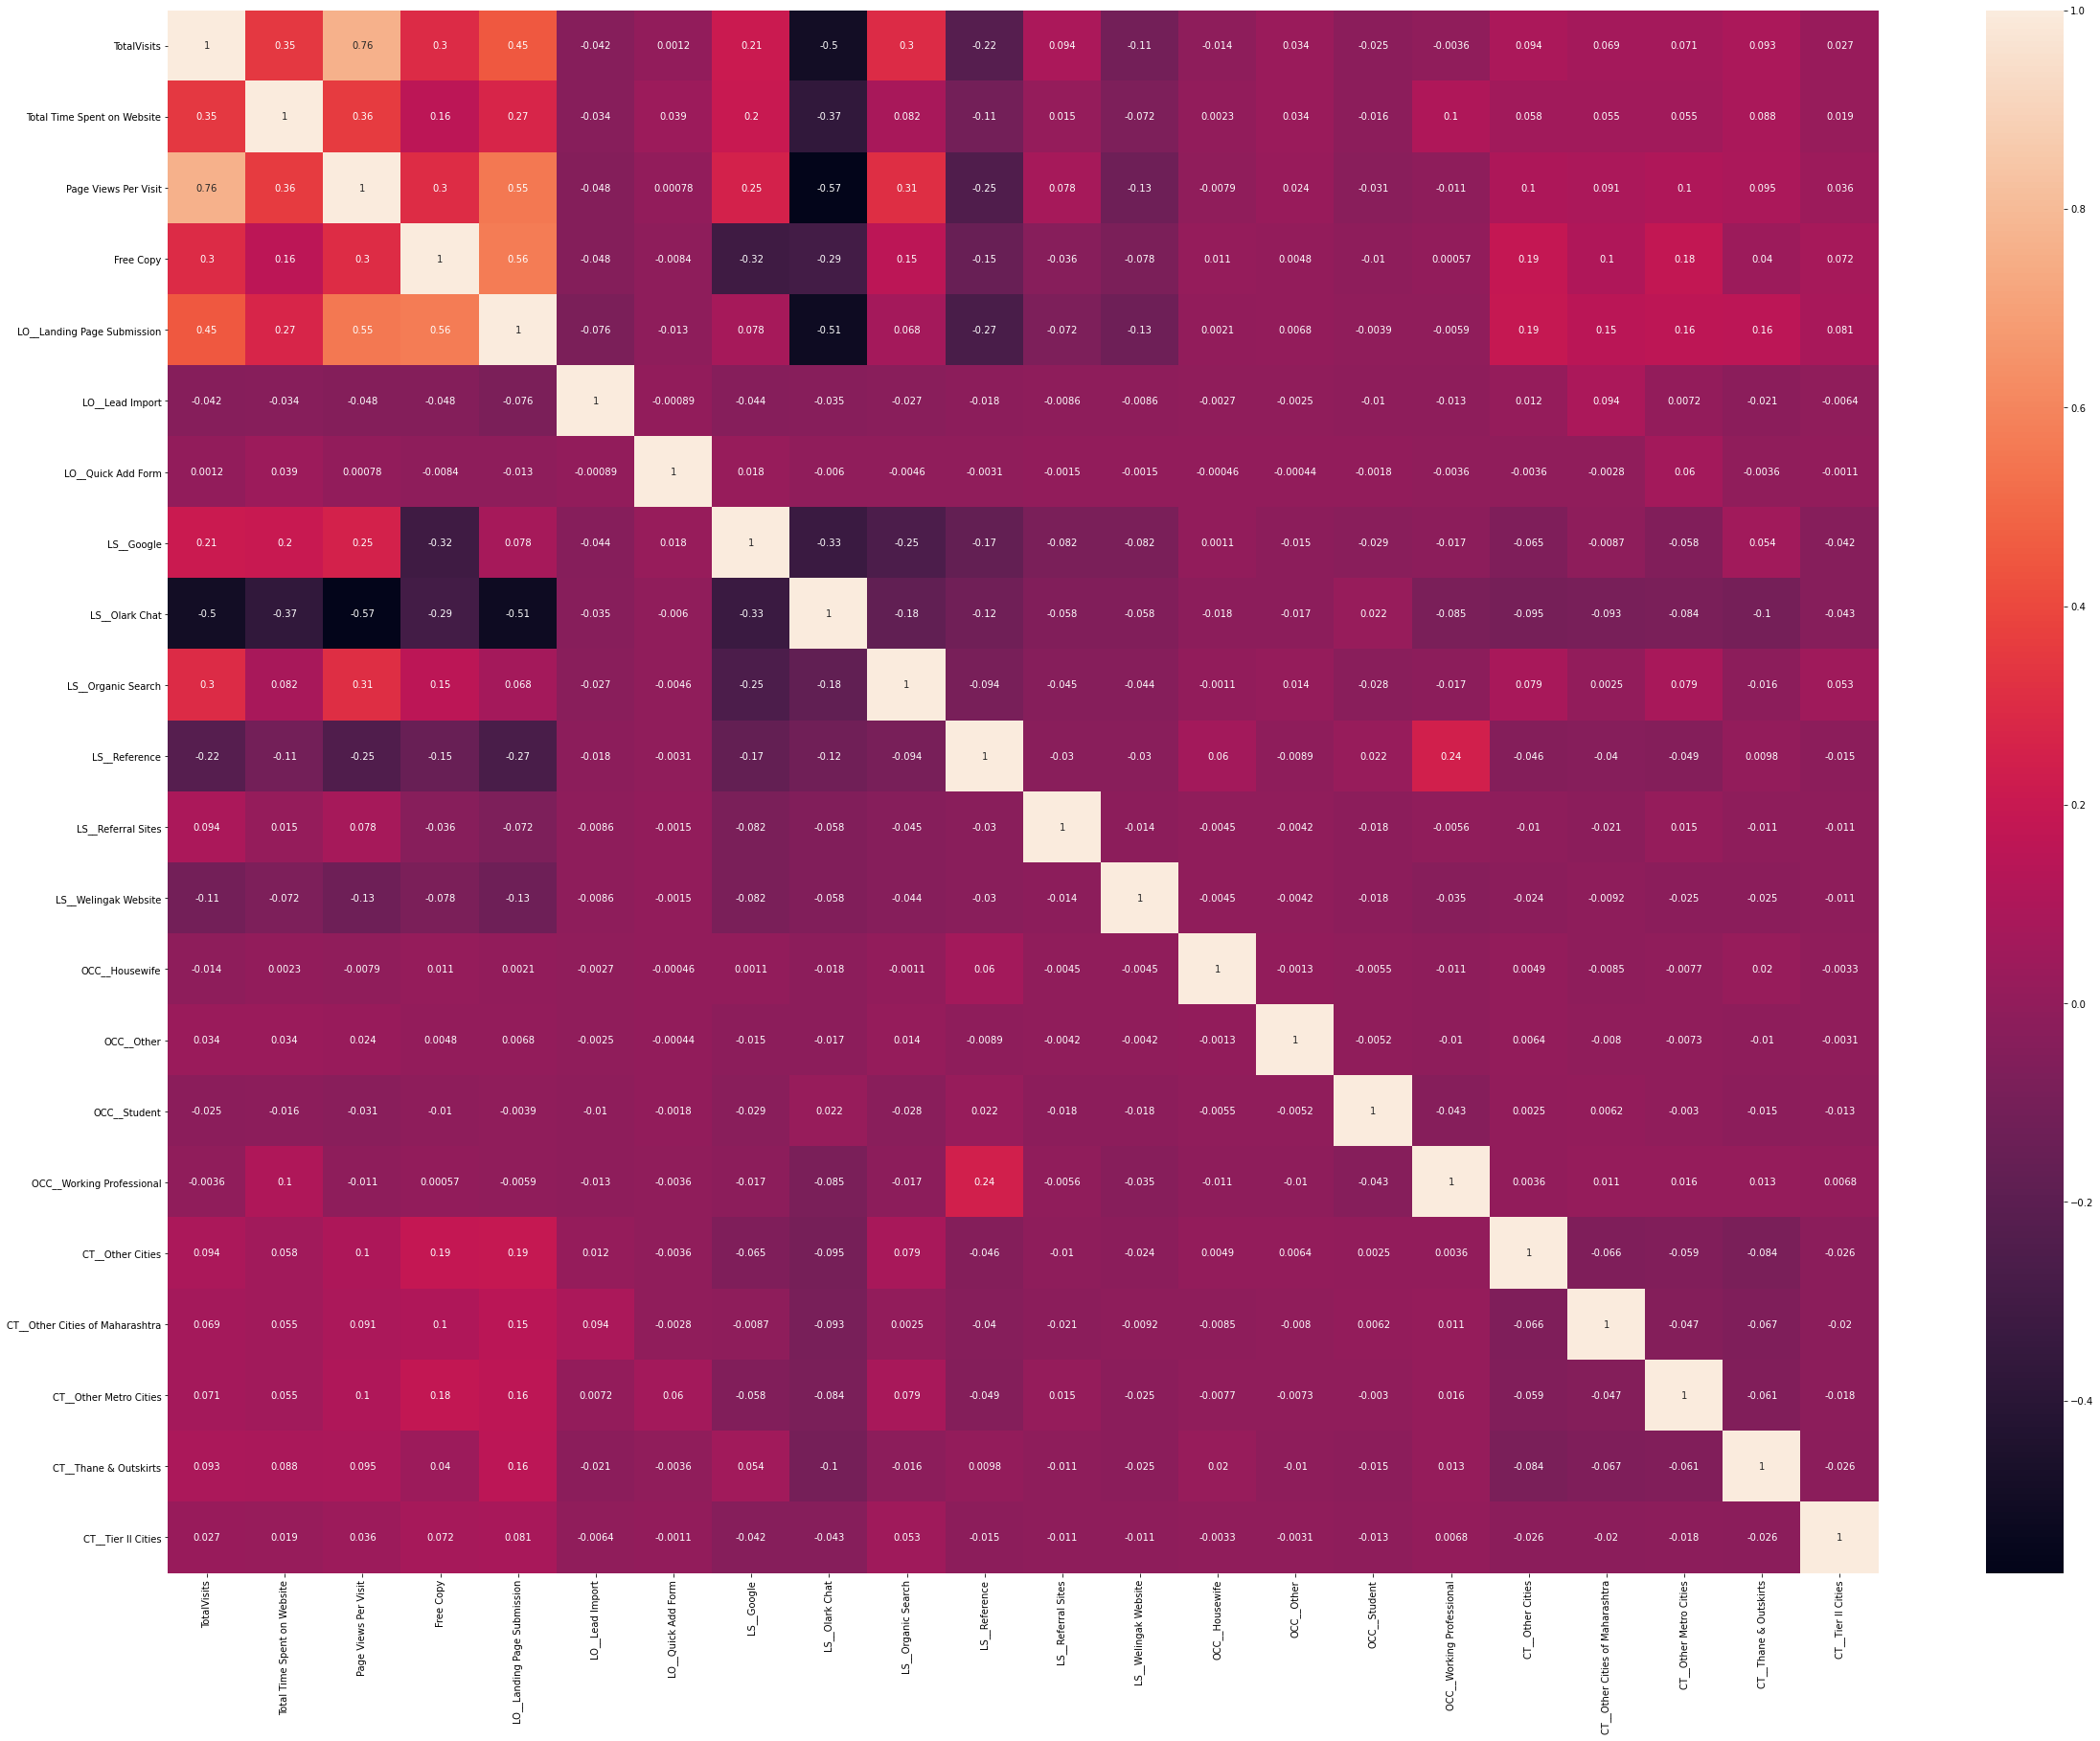

In [76]:
# Checking the correlation matrix again post dropping the columns

plt.figure(figsize = (40,30))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# Step7: Model Building

Let's start by building logistic regression model and rebuilding it till we achieve required metrics and a better stable model.

### Running our First Training Model

In [77]:
import statsmodels.api as sm

In [78]:
# Logistic regression model

logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3067.2
Date:                Mon, 07 Dec 2020   Deviance:                       6134.5
Time:                        21:05:55   Pearson chi2:                 7.96e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3072      0.115    -11.379      0.000      -1.532      -1.082
TotalVisits                         0.2655      0.048      5.504      0.000       0.171       0.360
Total Time Spent on Website         1.0666      0.037     29.072      0.000       0.995       1.138
Page Views Per Visit               -0.1580      0.055     -2.862      0.004      -0.266      -0.050
Free Copy                          -0.0479      0.097     -0.494      0.621      -0.238       0.142
LO__Landing Page Submission        -0.1466      0.100     -1.469      0.142      -0.342       0.049
LO__Lead Import                    -0.1681      0.534     -0.315      0.753      -1.214       0.878
LO__Quick Add Form                 19.6802   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
LS__Google                          0.3895      0.103      3.792      0.000       0.188       0.591
LS__Olark Chat                      0.9686      0.144      6.722      0.000       0.686       1.251
LS__Organic Search                  0.1241      0.119      1.039      0.299      -0.110       0.358
LS__Reference                       3.9847      0.228     17.506      0.000       3.539       4.431
LS__Referral Sites                 -0.3935      0.305     -1.290      0.197      -0.991       0.204
LS__Welingak Website                5.9790      0.728      8.218      0.000       4.553       7.405
OCC__Housewife                     22.7848   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
OCC__Other                         -0.4777      0.785     -0.608      0.543      -2.017       1.061
OCC__Student                        0.2152      0.212      1.014      0.311      -0.201       0.631
OCC__Working Professional           2.8931      0.180     16.083      0.000       2.541       3.246
CT__Other Cities                    0.2515      0.123      2.041      0.041       0.010       0.493
CT__Other Cities of Maharashtra     0.3200      0.149      2.146      0.032       0.028       0.612
CT__Other Metro Cities              0.4056      0.161      2.524      0.012       0.091       0.720
CT__Thane & Outskirts               0.1708      0.120      1.422      0.155      -0.065       0.406
CT__Tier II Cities                 -0.2949      0.380     -0.775      0.438      -1.041       0.451
===================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Free Copy', False, 2),
 ('LO__Landing Page Submission', True, 1),
 ('LO__Lead Import', True, 1),
 ('LO__Quick Add Form', False, 3),
 ('LS__Google', True, 1),
 ('LS__Olark Chat', True, 1),
 ('LS__Organic Search', True, 1),
 ('LS__Reference', True, 1),
 ('LS__Referral Sites', True, 1),
 ('LS__Welingak Website', True, 1),
 ('OCC__Housewife', True, 1),
 ('OCC__Other', True, 1),
 ('OCC__Student', True, 1),
 ('OCC__Working Professional', True, 1),
 ('CT__Other Cities', True, 1),
 ('CT__Other Cities of Maharashtra', True, 1),
 ('CT__Other Metro Cities', True, 1),
 ('CT__Thane & Outskirts', True, 1),
 ('CT__Tier II Cities', True, 1)]

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
X_train.columns[~rfe.support_]

Index(['Free Copy', 'LO__Quick Add Form'], dtype='object')

#### Now we will perform manual elimination 

# <font color=blue> RFE MODEL 

In [85]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LO__Landing Page Submission', 'LO__Lead Import', 'LS__Google',
       'LS__Olark Chat', 'LS__Organic Search', 'LS__Reference',
       'LS__Referral Sites', 'LS__Welingak Website', 'OCC__Housewife',
       'OCC__Other', 'OCC__Student', 'OCC__Working Professional',
       'CT__Other Cities', 'CT__Other Cities of Maharashtra',
       'CT__Other Metro Cities', 'CT__Thane & Outskirts',
       'CT__Tier II Cities'],
      dtype='object')

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logrfe = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logrfe.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3067.4
Date:                Mon, 07 Dec 2020   Deviance:                       6134.9
Time:                        21:05:56   Pearson chi2:                 7.95e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3282      0.107    -12.442      0.000      -1.537      -1.119
TotalVisits                         0.2628      0.048      5.484      0.000       0.169       0.357
Total Time Spent on Website         1.0664      0.037     29.083      0.000       0.995       1.138
Page Views Per Visit               -0.1569      0.055     -2.845      0.004      -0.265      -0.049
LO__Landing Page Submission        -0.1607      0.096     -1.677      0.093      -0.348       0.027
LO__Lead Import                    -0.1470      0.532     -0.276      0.782      -1.189       0.895
LS__Google                          0.4149      0.089      4.651      0.000       0.240       0.590
LS__Olark Chat                      0.9862      0.140      7.060      0.000       0.712       1.260
LS__Organic Search                  0.1323      0.118      1.118      0.263      -0.100       0.364
LS__Reference                       4.0033      0.225     17.831      0.000       3.563       4.443
LS__Referral Sites                 -0.3758      0.303     -1.240      0.215      -0.970       0.218
LS__Welingak Website                5.9983      0.726      8.256      0.000       4.574       7.422
OCC__Housewife                     22.7688   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
OCC__Other                         -0.4705      0.786     -0.599      0.549      -2.011       1.070
OCC__Student                        0.2187      0.212      1.031      0.302      -0.197       0.634
OCC__Working Professional           2.8934      0.180     16.082      0.000       2.541       3.246
CT__Other Cities                    0.2469      0.123      2.009      0.045       0.006       0.488
CT__Other Cities of Maharashtra     0.3190      0.149      2.139      0.032       0.027       0.611
CT__Other Metro Cities              0.3994      0.160      2.499      0.012       0.086       0.713
CT__Thane & Outskirts               0.1724      0.120      1.435      0.151      -0.063       0.408
CT__Tier II Cities                 -0.2986      0.380     -0.785      0.432      -1.044       0.447
===================================================================================================
"""

In [87]:
# Check for the VIF values 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.15
0,TotalVisits,2.52
3,LO__Landing Page Submission,2.15
6,LS__Olark Chat,1.69
5,LS__Google,1.34
8,LS__Reference,1.26
1,Total Time Spent on Website,1.26
7,LS__Organic Search,1.25
15,CT__Other Cities,1.19
14,OCC__Working Professional,1.18


In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.199468
6795    0.254222
3516    0.283335
8105    0.577373
3934    0.199468
4844    0.970447
3297    0.153258
8071    0.996403
987     0.239652
7423    0.775891
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19946848, 0.25422205, 0.28333522, 0.57737313, 0.19946848,
       0.97044738, 0.15325781, 0.99640332, 0.23965216, 0.77589073])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.199468,1871
1,0,0.254222,6795
2,0,0.283335,3516
3,0,0.577373,8105
4,0,0.199468,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [92]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.199468,1871,0
1,0,0.254222,6795,0
2,0,0.283335,3516,0
3,0,0.577373,8105,1
4,0,0.199468,3934,0


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3532  470]
 [ 930 1536]]


In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7835497835497836


In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# sensitivity
TP / float(TP+FN)

0.6228710462287105

In [98]:
#  specificity
TN / float(TN+FP)

0.8825587206396801

#### All Variables have acceptable VIF, however p value is very high for OCC__Housewife, 0.999 which is greated than 0.05. Hence dropping OCC__Housewife. 

# <font color=blue> MODEL 1
By dropping 'OCC__Housewife'

In [99]:
col1=col.drop('OCC__Housewife',1)
col1

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LO__Landing Page Submission', 'LO__Lead Import', 'LS__Google',
       'LS__Olark Chat', 'LS__Organic Search', 'LS__Reference',
       'LS__Referral Sites', 'LS__Welingak Website', 'OCC__Other',
       'OCC__Student', 'OCC__Working Professional', 'CT__Other Cities',
       'CT__Other Cities of Maharashtra', 'CT__Other Metro Cities',
       'CT__Thane & Outskirts', 'CT__Tier II Cities'],
      dtype='object')

In [100]:
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3073.7
Date:                Mon, 07 Dec 2020   Deviance:                       6147.4
Time:                        21:05:56   Pearson chi2:                 7.97e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3328      0.107    -12.495      0.000      -1.542      -1.124
TotalVisits                         0.2601      0.048      5.431      0.000       0.166       0.354
Total Time Spent on Website         1.0659      0.037     29.092      0.000       0.994       1.138
Page Views Per Visit               -0.1589      0.055     -2.883      0.004      -0.267      -0.051
LO__Landing Page Submission        -0.1504      0.096     -1.572      0.116      -0.338       0.037
LO__Lead Import                    -0.1420      0.532     -0.267      0.789      -1.184       0.900
LS__Google                          0.4194      0.089      4.708      0.000       0.245       0.594
LS__Olark Chat                      0.9855      0.140      7.062      0.000       0.712       1.259
LS__Organic Search                  0.1429      0.118      1.210      0.226      -0.089       0.374
LS__Reference                       4.0190      0.224     17.929      0.000       3.580       4.458
LS__Referral Sites                 -0.3696      0.303     -1.220      0.222      -0.963       0.224
LS__Welingak Website                5.9972      0.726      8.255      0.000       4.573       7.421
OCC__Other                         -0.4699      0.786     -0.598      0.550      -2.009       1.070
OCC__Student                        0.2150      0.212      1.014      0.311      -0.201       0.631
OCC__Working Professional           2.8886      0.180     16.057      0.000       2.536       3.241
CT__Other Cities                    0.2428      0.123      1.979      0.048       0.002       0.483
CT__Other Cities of Maharashtra     0.3136      0.149      2.104      0.035       0.022       0.606
CT__Other Metro Cities              0.3935      0.160      2.464      0.014       0.080       0.707
CT__Thane & Outskirts               0.1820      0.120      1.521      0.128      -0.053       0.417
CT__Tier II Cities                 -0.3060      0.380     -0.805      0.421      -1.051       0.439
===================================================================================================
"""

In [101]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.15
0,TotalVisits,2.52
3,LO__Landing Page Submission,2.15
6,LS__Olark Chat,1.69
5,LS__Google,1.34
8,LS__Reference,1.26
1,Total Time Spent on Website,1.26
7,LS__Organic Search,1.25
14,CT__Other Cities,1.19
17,CT__Thane & Outskirts,1.17


In [102]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.199595
6795    0.254573
3516    0.281908
8105    0.578467
3934    0.199595
4844    0.970428
3297    0.156012
8071    0.996406
987     0.240525
7423    0.775860
dtype: float64

In [103]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19959538, 0.25457265, 0.2819082 , 0.57846691, 0.19959538,
       0.97042768, 0.1560122 , 0.99640575, 0.24052455, 0.77585995])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [104]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.199595,1871
1,0,0.254573,6795
2,0,0.281908,3516
3,0,0.578467,8105
4,0,0.199595,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [105]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.199595,1871,0
1,0,0.254573,6795,0
2,0,0.281908,3516,0
3,0,0.578467,8105,1
4,0,0.199595,3934,0


In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3531  471]
 [ 930 1536]]


In [107]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7833951762523191


In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# sensitivity
TP / float(TP+FN)

0.6228710462287105

In [110]:
#  specificity
TN / float(TN+FP)

0.8823088455772113

#### All Variables have acceptable VIF, however p value is very high for LO__Lead Import, 0.789 which is greated than 0.05. Hence dropping LO__Lead Import. 

## <font color= blue> MODEL 2
Dropping LO__Lead Import

In [111]:
col2=col1.drop('LO__Lead Import',1)
col2

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LO__Landing Page Submission', 'LS__Google', 'LS__Olark Chat',
       'LS__Organic Search', 'LS__Reference', 'LS__Referral Sites',
       'LS__Welingak Website', 'OCC__Other', 'OCC__Student',
       'OCC__Working Professional', 'CT__Other Cities',
       'CT__Other Cities of Maharashtra', 'CT__Other Metro Cities',
       'CT__Thane & Outskirts', 'CT__Tier II Cities'],
      dtype='object')

In [112]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3073.7
Date:                Mon, 07 Dec 2020   Deviance:                       6147.4
Time:                        21:05:57   Pearson chi2:                 7.97e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3382      0.105    -12.775      0.000      -1.544      -1.133
TotalVisits                         0.2603      0.048      5.435      0.000       0.166       0.354
Total Time Spent on Website         1.0663      0.037     29.122      0.000       0.995       1.138
Page Views Per Visit               -0.1588      0.055     -2.880      0.004      -0.267      -0.051
LO__Landing Page Submission        -0.1464      0.095     -1.549      0.121      -0.332       0.039
LS__Google                          0.4225      0.088      4.781      0.000       0.249       0.596
LS__Olark Chat                      0.9917      0.138      7.204      0.000       0.722       1.262
LS__Organic Search                  0.1459      0.118      1.241      0.215      -0.085       0.376
LS__Reference                       4.0253      0.223     18.055      0.000       3.588       4.462
LS__Referral Sites                 -0.3653      0.303     -1.207      0.227      -0.958       0.228
LS__Welingak Website                6.0035      0.726      8.268      0.000       4.580       7.427
OCC__Other                         -0.4687      0.785     -0.597      0.551      -2.008       1.071
OCC__Student                        0.2157      0.212      1.017      0.309      -0.200       0.631
OCC__Working Professional           2.8881      0.180     16.058      0.000       2.536       3.241
CT__Other Cities                    0.2419      0.123      1.973      0.049       0.002       0.482
CT__Other Cities of Maharashtra     0.3104      0.148      2.091      0.037       0.019       0.601
CT__Other Metro Cities              0.3921      0.160      2.455      0.014       0.079       0.705
CT__Thane & Outskirts               0.1815      0.120      1.517      0.129      -0.053       0.416
CT__Tier II Cities                 -0.3062      0.380     -0.805      0.421      -1.052       0.439
===================================================================================================
"""

In [113]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.14
0,TotalVisits,2.51
3,LO__Landing Page Submission,2.15
5,LS__Olark Chat,1.69
4,LS__Google,1.34
7,LS__Reference,1.26
1,Total Time Spent on Website,1.26
6,LS__Organic Search,1.25
13,CT__Other Cities,1.18
16,CT__Thane & Outskirts,1.17


In [114]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.199591
6795    0.254122
3516    0.282039
8105    0.579083
3934    0.199591
4844    0.970396
3297    0.156175
8071    0.996395
987     0.240305
7423    0.775564
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19959085, 0.2541221 , 0.28203896, 0.57908342, 0.19959085,
       0.97039603, 0.15617503, 0.99639532, 0.24030546, 0.77556413])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.199591,1871
1,0,0.254122,6795
2,0,0.282039,3516
3,0,0.579083,8105
4,0,0.199591,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [117]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.199591,1871,0
1,0,0.254122,6795,0
2,0,0.282039,3516,0
3,0,0.579083,8105,1
4,0,0.199591,3934,0


In [118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3531  471]
 [ 929 1537]]


In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7835497835497836


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# sensitivity
TP / float(TP+FN)

0.6232765612327656

In [122]:
#  specificity
TN / float(TN+FP)

0.8823088455772113

#### All Variables have acceptable VIF, however p value is very high for OCC__Other, 0.551 which is greated than 0.05. Hence dropping LO__Lead Import. 
#### Accuracy and Sensitivity is practically same

## <font color= blue> MODEL 3
Dropping OCC__Other from MODEL 2 

In [123]:
col3=col2.drop('OCC__Other',1)
col3

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LO__Landing Page Submission', 'LS__Google', 'LS__Olark Chat',
       'LS__Organic Search', 'LS__Reference', 'LS__Referral Sites',
       'LS__Welingak Website', 'OCC__Student', 'OCC__Working Professional',
       'CT__Other Cities', 'CT__Other Cities of Maharashtra',
       'CT__Other Metro Cities', 'CT__Thane & Outskirts',
       'CT__Tier II Cities'],
      dtype='object')

In [124]:
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3073.9
Date:                Mon, 07 Dec 2020   Deviance:                       6147.8
Time:                        21:05:57   Pearson chi2:                 7.97e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3412      0.105    -12.815      0.000      -1.546      -1.136
TotalVisits                         0.2595      0.048      5.421      0.000       0.166       0.353
Total Time Spent on Website         1.0656      0.037     29.123      0.000       0.994       1.137
Page Views Per Visit               -0.1589      0.055     -2.883      0.004      -0.267      -0.051
LO__Landing Page Submission        -0.1453      0.095     -1.537      0.124      -0.331       0.040
LS__Google                          0.4247      0.088      4.811      0.000       0.252       0.598
LS__Olark Chat                      0.9930      0.138      7.214      0.000       0.723       1.263
LS__Organic Search                  0.1474      0.118      1.254      0.210      -0.083       0.378
LS__Reference                       4.0264      0.223     18.060      0.000       3.589       4.463
LS__Referral Sites                 -0.3618      0.302     -1.196      0.232      -0.955       0.231
LS__Welingak Website                6.0047      0.726      8.270      0.000       4.582       7.428
OCC__Student                        0.2165      0.212      1.021      0.307      -0.199       0.632
OCC__Working Professional           2.8888      0.180     16.063      0.000       2.536       3.241
CT__Other Cities                    0.2422      0.123      1.974      0.048       0.002       0.483
CT__Other Cities of Maharashtra     0.3118      0.148      2.101      0.036       0.021       0.603
CT__Other Metro Cities              0.3936      0.160      2.465      0.014       0.081       0.707
CT__Thane & Outskirts               0.1828      0.120      1.528      0.127      -0.052       0.417
CT__Tier II Cities                 -0.3045      0.380     -0.801      0.423      -1.050       0.441
===================================================================================================
"""

In [125]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.14
0,TotalVisits,2.51
3,LO__Landing Page Submission,2.14
5,LS__Olark Chat,1.69
4,LS__Google,1.34
7,LS__Reference,1.26
1,Total Time Spent on Website,1.26
6,LS__Organic Search,1.25
12,CT__Other Cities,1.18
15,CT__Thane & Outskirts,1.17


In [126]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.199607
6795    0.253798
3516    0.281689
8105    0.578790
3934    0.199607
4844    0.970321
3297    0.156210
8071    0.996397
987     0.240472
7423    0.775240
dtype: float64

In [127]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19960651, 0.25379819, 0.28168866, 0.57879019, 0.19960651,
       0.97032116, 0.1562104 , 0.99639657, 0.24047196, 0.7752396 ])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [128]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.199607,1871
1,0,0.253798,6795
2,0,0.281689,3516
3,0,0.578790,8105
4,0,0.199607,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [129]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.199607,1871,0
1,0,0.253798,6795,0
2,0,0.281689,3516,0
3,0,0.578790,8105,1
4,0,0.199607,3934,0


In [130]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3530  472]
 [ 930 1536]]


In [131]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7832405689548547


In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
# sensitivity
TP / float(TP+FN)

0.6228710462287105

In [134]:
#  specificity
TN / float(TN+FP)

0.8820589705147426

#### All Variables have acceptable VIF, however p value is very high for CT__Tier II Cities, 0.423 which is greated than 0.05. Hence dropping CT__Tier II Cities. 
#### Accuracy and Sensitivity is practically same

## <font color= blue> MODEL 4
Dropping CT__Tier II Cities , from MODEL 3

In [135]:
col4=col3.drop('CT__Tier II Cities',1)
col4

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LO__Landing Page Submission', 'LS__Google', 'LS__Olark Chat',
       'LS__Organic Search', 'LS__Reference', 'LS__Referral Sites',
       'LS__Welingak Website', 'OCC__Student', 'OCC__Working Professional',
       'CT__Other Cities', 'CT__Other Cities of Maharashtra',
       'CT__Other Metro Cities', 'CT__Thane & Outskirts'],
      dtype='object')

In [136]:
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3074.2
Date:                Mon, 07 Dec 2020   Deviance:                       6148.5
Time:                        21:05:57   Pearson chi2:                 7.97e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3432      0.105    -12.837      0.000      -1.548      -1.138
TotalVisits                         0.2601      0.048      5.434      0.000       0.166       0.354
Total Time Spent on Website         1.0651      0.037     29.123      0.000       0.993       1.137
Page Views Per Visit               -0.1582      0.055     -2.871      0.004      -0.266      -0.050
LO__Landing Page Submission        -0.1512      0.094     -1.604      0.109      -0.336       0.034
LS__Google                          0.4280      0.088      4.853      0.000       0.255       0.601
LS__Olark Chat                      0.9956      0.138      7.234      0.000       0.726       1.265
LS__Organic Search                  0.1441      0.118      1.226      0.220      -0.086       0.374
LS__Reference                       4.0284      0.223     18.070      0.000       3.591       4.465
LS__Referral Sites                 -0.3602      0.302     -1.191      0.234      -0.953       0.233
LS__Welingak Website                6.0073      0.726      8.274      0.000       4.584       7.430
OCC__Student                        0.2189      0.212      1.032      0.302      -0.197       0.634
OCC__Working Professional           2.8873      0.180     16.060      0.000       2.535       3.240
CT__Other Cities                    0.2489      0.122      2.033      0.042       0.009       0.489
CT__Other Cities of Maharashtra     0.3180      0.148      2.145      0.032       0.027       0.609
CT__Other Metro Cities              0.4007      0.159      2.513      0.012       0.088       0.713
CT__Thane & Outskirts               0.1881      0.119      1.574      0.115      -0.046       0.422
===================================================================================================
"""

In [137]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.14
0,TotalVisits,2.51
3,LO__Landing Page Submission,2.10
5,LS__Olark Chat,1.69
4,LS__Google,1.34
1,Total Time Spent on Website,1.26
7,LS__Reference,1.26
6,LS__Organic Search,1.25
12,CT__Other Cities,1.18
11,OCC__Working Professional,1.17


In [138]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.199526
6795    0.253528
3516    0.281982
8105    0.577830
3934    0.199526
4844    0.970020
3297    0.155654
8071    0.996414
987     0.240166
7423    0.775210
dtype: float64

In [139]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19952578, 0.25352797, 0.28198197, 0.57783014, 0.19952578,
       0.9700205 , 0.15565386, 0.99641402, 0.24016554, 0.77521026])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [140]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.199526,1871
1,0,0.253528,6795
2,0,0.281982,3516
3,0,0.577830,8105
4,0,0.199526,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [141]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.199526,1871,0
1,0,0.253528,6795,0
2,0,0.281982,3516,0
3,0,0.577830,8105,1
4,0,0.199526,3934,0


In [142]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3528  474]
 [ 933 1533]]


In [143]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7824675324675324


In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# sensitivity
TP / float(TP+FN)

0.621654501216545

In [146]:
#  specificity
TN / float(TN+FP)

0.881559220389805

#### All Variables have acceptable VIF, however p value is very high for OCC__Student, 0.302 which is greated than 0.05. Hence dropping OCC__Student. 
#### Accuracy and Sensitivity is practically same

# <font color=blue> MODEL 5
Dropping 'OCC__Student' from model 4

In [147]:
col5= col4.drop('OCC__Student',1)
col5

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LO__Landing Page Submission', 'LS__Google', 'LS__Olark Chat',
       'LS__Organic Search', 'LS__Reference', 'LS__Referral Sites',
       'LS__Welingak Website', 'OCC__Working Professional', 'CT__Other Cities',
       'CT__Other Cities of Maharashtra', 'CT__Other Metro Cities',
       'CT__Thane & Outskirts'],
      dtype='object')

In [148]:
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3074.8
Date:                Mon, 07 Dec 2020   Deviance:                       6149.5
Time:                        21:05:58   Pearson chi2:                 7.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3370      0.104    -12.805      0.000      -1.542      -1.132
TotalVisits                         0.2601      0.048      5.436      0.000       0.166       0.354
Total Time Spent on Website         1.0648      0.037     29.120      0.000       0.993       1.136
Page Views Per Visit               -0.1586      0.055     -2.878      0.004      -0.267      -0.051
LO__Landing Page Submission        -0.1507      0.094     -1.599      0.110      -0.335       0.034
LS__Google                          0.4255      0.088      4.828      0.000       0.253       0.598
LS__Olark Chat                      0.9955      0.138      7.234      0.000       0.726       1.265
LS__Organic Search                  0.1413      0.117      1.203      0.229      -0.089       0.371
LS__Reference                       4.0307      0.223     18.083      0.000       3.594       4.468
LS__Referral Sites                 -0.3659      0.302     -1.210      0.226      -0.958       0.227
LS__Welingak Website                6.0005      0.726      8.265      0.000       4.577       7.424
OCC__Working Professional           2.8821      0.180     16.039      0.000       2.530       3.234
CT__Other Cities                    0.2490      0.122      2.035      0.042       0.009       0.489
CT__Other Cities of Maharashtra     0.3185      0.148      2.147      0.032       0.028       0.609
CT__Other Metro Cities              0.4006      0.159      2.513      0.012       0.088       0.713
CT__Thane & Outskirts               0.1873      0.119      1.568      0.117      -0.047       0.421
===================================================================================================
"""

In [149]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.14
0,TotalVisits,2.51
3,LO__Landing Page Submission,2.09
5,LS__Olark Chat,1.68
4,LS__Google,1.34
1,Total Time Spent on Website,1.26
6,LS__Organic Search,1.25
7,LS__Reference,1.25
11,CT__Other Cities,1.18
10,OCC__Working Professional,1.17


In [150]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.200605
6795    0.254864
3516    0.283239
8105    0.578628
3934    0.200605
4844    0.970049
3297    0.156046
8071    0.996428
987     0.240265
7423    0.775782
dtype: float64

In [151]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20060543, 0.25486433, 0.28323852, 0.5786279 , 0.20060543,
       0.9700491 , 0.15604568, 0.99642763, 0.24026498, 0.77578217])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [152]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.200605,1871
1,0,0.254864,6795
2,0,0.283239,3516
3,0,0.578628,8105
4,0,0.200605,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [153]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.200605,1871,0
1,0,0.254864,6795,0
2,0,0.283239,3516,0
3,0,0.578628,8105,1
4,0,0.200605,3934,0


In [154]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3528  474]
 [ 933 1533]]


In [155]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7824675324675324


In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# sensitivity
TP / float(TP+FN)

0.621654501216545

In [158]:
#  specificity
TN / float(TN+FP)

0.881559220389805

#### All Variables have acceptable VIF, however p value is very high for LS__Organic Search, 0.229 which is greated than 0.05. Hence dropping LS__Organic Search. 
#### Accuracy and Sensitivity are slightly imporving, however they are practically same

# <font color=blue> MODEL 6
Dropping LS__Organic Search from model 5

In [159]:
col6=col5.drop('LS__Organic Search',1)
col6

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LO__Landing Page Submission', 'LS__Google', 'LS__Olark Chat',
       'LS__Reference', 'LS__Referral Sites', 'LS__Welingak Website',
       'OCC__Working Professional', 'CT__Other Cities',
       'CT__Other Cities of Maharashtra', 'CT__Other Metro Cities',
       'CT__Thane & Outskirts'],
      dtype='object')

In [160]:
X_train_sm = sm.add_constant(X_train[col6])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3075.5
Date:                Mon, 07 Dec 2020   Deviance:                       6151.0
Time:                        21:05:58   Pearson chi2:                 8.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.2710      0.089    -14.349      0.000      -1.445      -1.097
TotalVisits                         0.2662      0.048      5.597      0.000       0.173       0.359
Total Time Spent on Website         1.0636      0.037     29.106      0.000       0.992       1.135
Page Views Per Visit               -0.1462      0.054     -2.703      0.007      -0.252      -0.040
LO__Landing Page Submission        -0.1867      0.089     -2.089      0.037      -0.362      -0.012
LS__Google                          0.3742      0.077      4.862      0.000       0.223       0.525
LS__Olark Chat                      0.9493      0.132      7.192      0.000       0.691       1.208
LS__Reference                       3.9847      0.220     18.152      0.000       3.554       4.415
LS__Referral Sites                 -0.4364      0.296     -1.472      0.141      -1.017       0.145
LS__Welingak Website                5.9553      0.725      8.214      0.000       4.534       7.376
OCC__Working Professional           2.8793      0.180     16.033      0.000       2.527       3.231
CT__Other Cities                    0.2542      0.122      2.080      0.038       0.015       0.494
CT__Other Cities of Maharashtra     0.3157      0.148      2.129      0.033       0.025       0.606
CT__Other Metro Cities              0.4073      0.159      2.558      0.011       0.095       0.719
CT__Thane & Outskirts               0.1877      0.119      1.571      0.116      -0.046       0.422
===================================================================================================
"""

In [161]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.06
0,TotalVisits,2.48
3,LO__Landing Page Submission,2.05
5,LS__Olark Chat,1.64
4,LS__Google,1.29
1,Total Time Spent on Website,1.26
6,LS__Reference,1.24
9,OCC__Working Professional,1.17
10,CT__Other Cities,1.17
13,CT__Thane & Outskirts,1.16


In [162]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.200300
6795    0.260717
3516    0.288640
8105    0.578726
3934    0.200300
4844    0.970771
3297    0.144221
8071    0.996485
987     0.236857
7423    0.776954
dtype: float64

In [163]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2003    , 0.26071676, 0.28864032, 0.57872577, 0.2003    ,
       0.97077127, 0.14422095, 0.99648465, 0.23685736, 0.77695446])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [164]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.200300,1871
1,0,0.260717,6795
2,0,0.288640,3516
3,0,0.578726,8105
4,0,0.200300,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [165]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.200300,1871,0
1,0,0.260717,6795,0
2,0,0.288640,3516,0
3,0,0.578726,8105,1
4,0,0.200300,3934,0


In [166]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3534  468]
 [ 928 1538]]


In [167]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7841682127396413


In [168]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
# sensitivity
TP / float(TP+FN)

0.6236820762368208

In [170]:
#  specificity
TN / float(TN+FP)

0.8830584707646177

#### All Variables have acceptable VIF, however p value is very high forLS__Referral Sites, 0.141 which is greated than 0.05. Hence dropping LS__Referral Sites 
#### Accuracy and Sensitivity are slightly imporving, however they are practically same

# <font color=blue> MODEL 7
Dropping LS__Referral Sites  from model 6

In [171]:
col7=col6.drop('LS__Referral Sites',1)
col7

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LO__Landing Page Submission', 'LS__Google', 'LS__Olark Chat',
       'LS__Reference', 'LS__Welingak Website', 'OCC__Working Professional',
       'CT__Other Cities', 'CT__Other Cities of Maharashtra',
       'CT__Other Metro Cities', 'CT__Thane & Outskirts'],
      dtype='object')

In [172]:
X_train_sm = sm.add_constant(X_train[col7])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3076.6
Date:                Mon, 07 Dec 2020   Deviance:                       6153.2
Time:                        21:05:58   Pearson chi2:                 8.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3031      0.086    -15.149      0.000      -1.472      -1.135
TotalVisits                         0.2632      0.047      5.544      0.000       0.170       0.356
Total Time Spent on Website         1.0641      0.037     29.120      0.000       0.992       1.136
Page Views Per Visit               -0.1490      0.054     -2.756      0.006      -0.255      -0.043
LO__Landing Page Submission        -0.1623      0.088     -1.847      0.065      -0.334       0.010
LS__Google                          0.3936      0.076      5.185      0.000       0.245       0.542
LS__Olark Chat                      0.9754      0.131      7.452      0.000       0.719       1.232
LS__Reference                       4.0108      0.219     18.325      0.000       3.582       4.440
LS__Welingak Website                5.9810      0.725      8.251      0.000       4.560       7.402
OCC__Working Professional           2.8789      0.180     16.025      0.000       2.527       3.231
CT__Other Cities                    0.2575      0.122      2.106      0.035       0.018       0.497
CT__Other Cities of Maharashtra     0.3197      0.148      2.156      0.031       0.029       0.610
CT__Other Metro Cities              0.4067      0.159      2.555      0.011       0.095       0.719
CT__Thane & Outskirts               0.1868      0.119      1.564      0.118      -0.047       0.421
===================================================================================================
"""

In [173]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.06
0,TotalVisits,2.47
3,LO__Landing Page Submission,2.05
5,LS__Olark Chat,1.63
4,LS__Google,1.29
1,Total Time Spent on Website,1.26
6,LS__Reference,1.24
8,OCC__Working Professional,1.17
9,CT__Other Cities,1.17
12,CT__Thane & Outskirts,1.16


In [174]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.200382
6795    0.259960
3516    0.286843
8105    0.580185
3934    0.200382
4844    0.970550
3297    0.142359
8071    0.996474
987     0.318396
7423    0.775136
dtype: float64

In [175]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20038191, 0.25996034, 0.28684325, 0.58018461, 0.20038191,
       0.97054953, 0.14235907, 0.99647403, 0.31839628, 0.77513607])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [176]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.200382,1871
1,0,0.259960,6795
2,0,0.286843,3516
3,0,0.580185,8105
4,0,0.200382,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [177]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.200382,1871,0
1,0,0.259960,6795,0
2,0,0.286843,3516,0
3,0,0.580185,8105,1
4,0,0.200382,3934,0


In [178]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3534  468]
 [ 929 1537]]


In [179]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7840136054421769


In [180]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [181]:
# sensitivity
TP / float(TP+FN)

0.6232765612327656

In [182]:
#  specificity
TN / float(TN+FP)

0.8830584707646177

#### All Variables have acceptable VIF, however p value is very high for CT__Thane & Outskirts, 0.118 which is greated than 0.05. Hence dropping CT__Thane & Outskirts
#### Accuracy and Sensitivity are slightly imporving, however they are practically same

# <font color=blue> MODEL 8
Drop CT__Thane & Outskirts

In [183]:
col8=col7.drop(['CT__Thane & Outskirts'],1)

In [184]:
col8

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LO__Landing Page Submission', 'LS__Google', 'LS__Olark Chat',
       'LS__Reference', 'LS__Welingak Website', 'OCC__Working Professional',
       'CT__Other Cities', 'CT__Other Cities of Maharashtra',
       'CT__Other Metro Cities'],
      dtype='object')

In [185]:
X_train_sm = sm.add_constant(X_train[col8])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3077.8
Date:                Mon, 07 Dec 2020   Deviance:                       6155.7
Time:                        21:05:58   Pearson chi2:                 8.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.2990      0.086    -15.113      0.000      -1.468      -1.131
TotalVisits                         0.2648      0.047      5.579      0.000       0.172       0.358
Total Time Spent on Website         1.0664      0.037     29.203      0.000       0.995       1.138
Page Views Per Visit               -0.1492      0.054     -2.761      0.006      -0.255      -0.043
LO__Landing Page Submission        -0.1383      0.086     -1.600      0.110      -0.308       0.031
LS__Google                          0.3966      0.076      5.227      0.000       0.248       0.545
LS__Olark Chat                      0.9797      0.131      7.489      0.000       0.723       1.236
LS__Reference                       4.0329      0.218     18.458      0.000       3.605       4.461
LS__Welingak Website                5.9842      0.725      8.256      0.000       4.564       7.405
OCC__Working Professional           2.8821      0.180     16.045      0.000       2.530       3.234
CT__Other Cities                    0.2298      0.121      1.900      0.057      -0.007       0.467
CT__Other Cities of Maharashtra     0.2918      0.147      1.982      0.047       0.003       0.580
CT__Other Metro Cities              0.3786      0.158      2.393      0.017       0.069       0.689
===================================================================================================
"""

In [186]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.06
0,TotalVisits,2.47
3,LO__Landing Page Submission,1.90
5,LS__Olark Chat,1.63
4,LS__Google,1.29
1,Total Time Spent on Website,1.25
6,LS__Reference,1.23
8,OCC__Working Professional,1.17
9,CT__Other Cities,1.15
10,CT__Other Cities of Maharashtra,1.09


In [187]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.201148
6795    0.260140
3516    0.288438
8105    0.588653
3934    0.201148
4844    0.971561
3297    0.124089
8071    0.996477
987     0.319349
7423    0.777160
dtype: float64

In [188]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20114753, 0.26013959, 0.28843801, 0.58865313, 0.20114753,
       0.97156098, 0.1240892 , 0.99647732, 0.31934902, 0.77716031])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [189]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.201148,1871
1,0,0.260140,6795
2,0,0.288438,3516
3,0,0.588653,8105
4,0,0.201148,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [190]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.201148,1871,0
1,0,0.260140,6795,0
2,0,0.288438,3516,0
3,0,0.588653,8105,1
4,0,0.201148,3934,0


In [191]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3534  468]
 [ 935 1531]]


In [192]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7830859616573902


In [193]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [194]:
# sensitivity
TP / float(TP+FN)

0.6208434712084347

In [195]:
#  specificity
TN / float(TN+FP)

0.8830584707646177

#### All Variables have acceptable VIF, however p value is very high for LO__Landing Page Submission, 0.110 which is greated than 0.05. Hence dropping LO__Landing Page Submission
#### Accuracy and Sensitivity is practically same

# <font color=blue> MODEL 9
Drop LO__Landing Page Submission

In [196]:
col9=col8.drop(['LO__Landing Page Submission'],1)

In [197]:
col9

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LS__Google', 'LS__Olark Chat', 'LS__Reference', 'LS__Welingak Website',
       'OCC__Working Professional', 'CT__Other Cities',
       'CT__Other Cities of Maharashtra', 'CT__Other Metro Cities'],
      dtype='object')

In [198]:
X_train_sm = sm.add_constant(X_train[col9])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3079.1
Date:                Mon, 07 Dec 2020   Deviance:                       6158.2
Time:                        21:05:59   Pearson chi2:                 7.97e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3960      0.061    -22.722      0.000      -1.516      -1.276
TotalVisits                         0.2660      0.047      5.606      0.000       0.173       0.359
Total Time Spent on Website         1.0655      0.036     29.194      0.000       0.994       1.137
Page Views Per Visit               -0.1654      0.053     -3.115      0.002      -0.269      -0.061
LS__Google                          0.4218      0.074      5.682      0.000       0.276       0.567
LS__Olark Chat                      1.0595      0.121      8.742      0.000       0.822       1.297
LS__Reference                       4.1130      0.213     19.330      0.000       3.696       4.530
LS__Welingak Website                6.0635      0.723      8.384      0.000       4.646       7.481
OCC__Working Professional           2.8738      0.179     16.013      0.000       2.522       3.226
CT__Other Cities                    0.1994      0.119      1.671      0.095      -0.034       0.433
CT__Other Cities of Maharashtra     0.2623      0.146      1.796      0.072      -0.024       0.548
CT__Other Metro Cities              0.3505      0.157      2.234      0.025       0.043       0.658
===================================================================================================
"""

In [199]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col9].columns
vif['VIF'] = [variance_inflation_factor(X_train[col9].values, i) for i in range(X_train[col9].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.87
0,TotalVisits,2.46
4,LS__Olark Chat,1.56
1,Total Time Spent on Website,1.25
5,LS__Reference,1.23
7,OCC__Working Professional,1.16
3,LS__Google,1.12
8,CT__Other Cities,1.04
6,LS__Welingak Website,1.03
9,CT__Other Cities of Maharashtra,1.03


In [200]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.201609
6795    0.263961
3516    0.284750
8105    0.598532
3934    0.201609
4844    0.972489
3297    0.127635
8071    0.996278
987     0.300744
7423    0.765382
dtype: float64

In [201]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2016087 , 0.26396112, 0.28474998, 0.59853172, 0.2016087 ,
       0.97248941, 0.12763534, 0.996278  , 0.30074401, 0.76538216])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [202]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.201609,1871
1,0,0.263961,6795
2,0,0.284750,3516
3,0,0.598532,8105
4,0,0.201609,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [203]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.201609,1871,0
1,0,0.263961,6795,0
2,0,0.284750,3516,0
3,0,0.598532,8105,1
4,0,0.201609,3934,0


In [204]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3529  473]
 [ 933 1533]]


In [205]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.782622139764997


In [206]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [207]:
# sensitivity
TP / float(TP+FN)

0.621654501216545

In [208]:
#  specificity
TN / float(TN+FP)

0.8818090954522738

#### All Variables have acceptable VIF, however p value is very high for CT__Other Cities, 0.095 which is greated than 0.05. Hence dropping LO__Landing Page Submission
#### Accuracy and Sensitivity is practically same

# <font color=blue> MODEL 10
Drop CT__Other Cities

In [209]:
col10=col9.drop(['CT__Other Cities'],1)

In [210]:
col10

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LS__Google', 'LS__Olark Chat', 'LS__Reference', 'LS__Welingak Website',
       'OCC__Working Professional', 'CT__Other Cities of Maharashtra',
       'CT__Other Metro Cities'],
      dtype='object')

In [211]:
X_train_sm = sm.add_constant(X_train[col10])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3080.5
Date:                Mon, 07 Dec 2020   Deviance:                       6161.0
Time:                        21:05:59   Pearson chi2:                 7.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3665      0.059    -23.302      0.000      -1.481      -1.252
TotalVisits                         0.2668      0.047      5.624      0.000       0.174       0.360
Total Time Spent on Website         1.0662      0.036     29.212      0.000       0.995       1.138
Page Views Per Visit               -0.1642      0.053     -3.093      0.002      -0.268      -0.060
LS__Google                          0.4032      0.073      5.498      0.000       0.259       0.547
LS__Olark Chat                      1.0382      0.120      8.628      0.000       0.802       1.274
LS__Reference                       4.0916      0.212     19.273      0.000       3.676       4.508
LS__Welingak Website                6.0424      0.723      8.357      0.000       4.625       7.459
OCC__Working Professional           2.8752      0.179     16.025      0.000       2.524       3.227
CT__Other Cities of Maharashtra     0.2388      0.145      1.644      0.100      -0.046       0.524
CT__Other Metro Cities              0.3242      0.156      2.077      0.038       0.018       0.630
===================================================================================================
"""

In [212]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col10].columns
vif['VIF'] = [variance_inflation_factor(X_train[col10].values, i) for i in range(X_train[col10].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.86
0,TotalVisits,2.46
4,LS__Olark Chat,1.55
1,Total Time Spent on Website,1.25
5,LS__Reference,1.22
7,OCC__Working Professional,1.15
3,LS__Google,1.11
6,LS__Welingak Website,1.03
8,CT__Other Cities of Maharashtra,1.03
9,CT__Other Metro Cities,1.02


In [213]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.202430
6795    0.232217
3516    0.286464
8105    0.601970
3934    0.202430
4844    0.973338
3297    0.131120
8071    0.996226
987     0.306753
7423    0.767482
dtype: float64

In [214]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20243013, 0.2322172 , 0.286464  , 0.60197015, 0.20243013,
       0.97333816, 0.13112016, 0.99622569, 0.30675322, 0.76748234])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [215]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.202430,1871
1,0,0.232217,6795
2,0,0.286464,3516
3,0,0.601970,8105
4,0,0.202430,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [216]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.202430,1871,0
1,0,0.232217,6795,0
2,0,0.286464,3516,0
3,0,0.601970,8105,1
4,0,0.202430,3934,0


In [217]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3528  474]
 [ 935 1531]]


In [218]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7821583178726036


In [219]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [220]:
# sensitivity
TP / float(TP+FN)

0.6208434712084347

In [221]:
#  specificity
TN / float(TN+FP)

0.881559220389805

#### All Variables have acceptable VIF, however p value is very high for CT__Other Cities of Maharashtra, 0.100 which is greated than 0.05. Hence dropping CT__Other Cities of Maharashtra
#### Accuracy and Sensitivity is almost same

# <font color=blue> MODEL 11
Drop CT__Other Cities of Maharashtra

In [222]:
col11=col10.drop(['CT__Other Cities of Maharashtra'],1)

In [223]:
col11

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LS__Google', 'LS__Olark Chat', 'LS__Reference', 'LS__Welingak Website',
       'OCC__Working Professional', 'CT__Other Metro Cities'],
      dtype='object')

In [224]:
X_train_sm = sm.add_constant(X_train[col11])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3081.8
Date:                Mon, 07 Dec 2020   Deviance:                       6163.6
Time:                        21:05:59   Pearson chi2:                 7.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3480      0.057    -23.464      0.000      -1.461      -1.235
TotalVisits                     0.2660      0.047      5.609      0.000       0.173       0.359
Total Time Spent on Website     1.0663      0.036     29.224      0.000       0.995       1.138
Page Views Per Visit           -0.1615      0.053     -3.044      0.002      -0.265      -0.058
LS__Google                      0.3957      0.073      5.409      0.000       0.252       0.539
LS__Olark Chat                  1.0240      0.120      8.539      0.000       0.789       1.259
LS__Reference                   4.0807      0.212     19.233      0.000       3.665       4.497
LS__Welingak Website            6.0345      0.723      8.346      0.000       4.617       7.452
OCC__Working Professional       2.8763      0.179     16.038      0.000       2.525       3.228
CT__Other Metro Cities          0.3065      0.156      1.969      0.049       0.001       0.612
===============================================================================================
"""

In [225]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col11].columns
vif['VIF'] = [variance_inflation_factor(X_train[col11].values, i) for i in range(X_train[col11].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.84
0,TotalVisits,2.46
4,LS__Olark Chat,1.54
1,Total Time Spent on Website,1.25
5,LS__Reference,1.22
7,OCC__Working Professional,1.15
3,LS__Google,1.10
6,LS__Welingak Website,1.03
8,CT__Other Metro Cities,1.02


In [226]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.202713
6795    0.235238
3516    0.287300
8105    0.605484
3934    0.202713
4844    0.973829
3297    0.133327
8071    0.995254
987     0.310437
7423    0.769267
dtype: float64

In [227]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20271293, 0.23523838, 0.28730022, 0.60548376, 0.20271293,
       0.97382864, 0.13332706, 0.99525366, 0.31043692, 0.7692668 ])

##### Creating a dataframe with the actual Converted data and the Conversion Probability data (Converted_prob)

In [228]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.202713,1871
1,0,0.235238,6795
2,0,0.287300,3516
3,0,0.605484,8105
4,0,0.202713,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [229]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted
0,0,0.202713,1871,0
1,0,0.235238,6795,0
2,0,0.287300,3516,0
3,0,0.605484,8105,1
4,0,0.202713,3934,0


In [230]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3524  478]
 [ 929 1537]]


In [231]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7824675324675324


In [232]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [233]:
# sensitivity
TP / float(TP+FN)

0.6232765612327656

In [234]:
#  specificity
TN / float(TN+FP)

0.88055972013993

#### All Variables have acceptable VIF, and p value less than 0.05.
#### Accuracy and Sensitivity has improved a little.
#### This is our Final Model

# Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [235]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [236]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

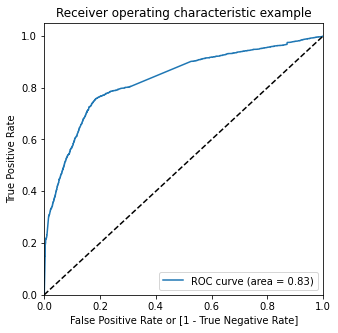

In [237]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### <font color=red><u>INFERENCE</u></font>

__The ROC Curve should be a value close to 1. We are getting a good value of 0.83 indicating a good predictive model.__

# Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [238]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.202713,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.235238,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.287300,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.605484,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.202713,3934,0,1,1,1,0,0,0,0,0,0,0


In [239]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.414811  0.988240  0.061469
0.2   0.2  0.633581  0.902271  0.468016
0.3   0.3  0.792981  0.757097  0.815092
0.4   0.4  0.792362  0.698702  0.850075
0.5   0.5  0.782468  0.623277  0.880560
0.6   0.6  0.771954  0.538118  0.916042
0.7   0.7  0.751391  0.429440  0.949775
0.8   0.8  0.730674  0.334144  0.975012
0.9   0.9  0.694341  0.206407  0.995002


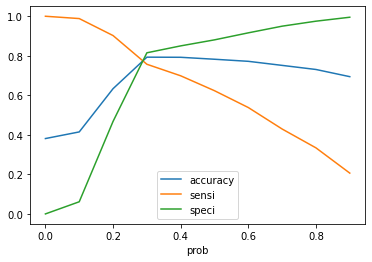

In [240]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### <font color=red><u>INFERENCE</u></font>

__From the curve above, our optimal cutoff would be about 0.3.__

__For our business we need higher Sensitivity, Therefore 0.25 is the optimal point to take it as a cutoff probability.__

__At 0.25, accurancy, sensitvity and specificity is around 76 to 78%__

In [241]:
# Finally predicting the values of Conversion with the new model on y train

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0) #assign 1 to converted probability greater than 0.25
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.202713,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.235238,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.287300,3516,0,1,1,1,0,0,0,0,0,0,0,1
3,0,0.605484,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.202713,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [242]:
# Creating a new column Lead_Score based on Conversion Probability

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Lead ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Lead ID,final_Predicted,Lead_Score
0,0,0.202713,1871,0,20
1,0,0.235238,6795,0,24
2,0,0.287300,3516,1,29
3,0,0.605484,8105,1,61
4,0,0.202713,3934,0,20


In [243]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7744279529993816

In [244]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted ) #confusion matrix
confusion2

array([[3086,  916],
       [ 543, 1923]], dtype=int64)

In [245]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [246]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7798053527980535

In [247]:
# Let us calculate specificity
TN / float(TN+FP)

0.7711144427786107

In [248]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2288855572213893


In [249]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6773511799929552


In [250]:
# Negative predictive value
print (TN / float(TN+ FN))

0.850372003306696


In [251]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3086,  916],
       [ 543, 1923]], dtype=int64)

In [252]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6773511799929552

In [253]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7798053527980535

### <font color=red><u>INFERENCE</u></font>

After running the model on the Train Data we get:

__- Accuracy : 77.44__<br>
__- Sensitivity : 77.98%__<br>
__- Specificity : 77.11%__<br>

__Accurancy, sensitvity and specificity are all in 77%-78% Range, Hence the cutoff is optimal__

### <u>Precision and Recall</u>

In [254]:
from sklearn.metrics import precision_score, recall_score

In [255]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted) #precision

0.6773511799929552

In [256]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted) #recall

0.7798053527980535

In [257]:
# Precision and Recall tradeoff

from sklearn.metrics import precision_recall_curve

In [258]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

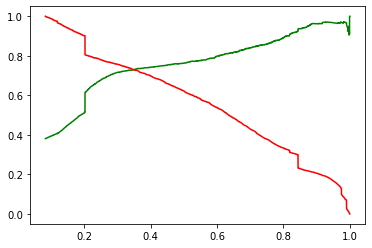

In [259]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### <font color=red><u>INFERENCE</u></font>

After running the model on the Train Data we get:

__- Precision: 67.74%__<br>
__- Recall: 77.98%__<br>

# Step 10: Making predictions on the test set

In [260]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]) #scaling on test

In [261]:
X_test = X_test[col11] #use the columns obtained from final model (model 11)
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LS__Google,LS__Olark Chat,LS__Reference,LS__Welingak Website,OCC__Working Professional,CT__Other Metro Cities
4269,1.746601,0.964504,2.114966,0,0,0,0,0,0
2376,-1.152121,-0.885371,-1.269958,0,0,1,0,0,0
7766,0.659580,-0.777416,1.550812,1,0,0,0,1,0
9199,-1.152121,-0.885371,-1.269958,0,1,0,0,0,0
4359,-1.152121,-0.885371,-1.269958,0,0,1,0,0,0


In [262]:
X_test_sm = sm.add_constant(X_test)

In [263]:
y_test_pred = res.predict(X_test_sm)

In [264]:
y_test_pred[:10]

4269    0.451004
2376    0.843865
7766    0.734982
9199    0.202713
4359    0.843865
9186    0.316028
1631    0.501250
8963    0.210424
8007    0.212361
5324    0.158459
dtype: float64

In [265]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [266]:
# Let's see the head
y_pred_1.head()

,0
4269,0.451004
2376,0.843865
7766,0.734982
9199,0.202713
4359,0.843865


In [267]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [268]:
# Putting Lead ID to index

y_test_df['Lead ID'] = y_test_df.index

In [269]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [270]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [271]:
y_test_pred_final.head()

,Converted,Lead ID,0
0,1,4269,0.451004
1,1,2376,0.843865
2,1,7766,0.734982
3,0,9199,0.202713
4,1,4359,0.843865


In [272]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [273]:
y_test_pred_final.head()

,Converted,Lead ID,Converted_prob
0,1,4269,0.451004
1,1,2376,0.843865
2,1,7766,0.734982
3,0,9199,0.202713
4,1,4359,0.843865


In [274]:
# Rearranging the columns

y_test_pred_final = y_test_pred_final[['Lead ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))

In [275]:
# Let's see the head of y_pred_final
y_test_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.451004,45
1,2376,1,0.843865,84
2,7766,1,0.734982,73
3,9199,0,0.202713,20
4,4359,1,0.843865,84


In [276]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0) #assign 1 to converted probability greater than 0.25

In [277]:
y_test_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.451004,45,1
1,2376,1,0.843865,84,1
2,7766,1,0.734982,73,1
3,9199,0,0.202713,20,0
4,4359,1,0.843865,84,1


In [278]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

0.7680375180375181

In [279]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_Predicted )
confusion2

array([[1282,  395],
       [ 248,  847]], dtype=int64)

In [280]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [281]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7735159817351598

In [282]:
# Let us calculate specificity
TN / float(TN+FP)

0.7644603458556947

In [283]:
precision_score(y_test_pred_final.Converted , y_test_pred_final.final_Predicted)

0.6819645732689211

In [284]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

0.7735159817351598

### <font color=red><u>INFERENCE</u></font>
After running the model on the Test Data we get:

__- Accuracy : 76.8%__<br>
__- Sensitivity : 77.35%__<br>
__- Specificity : 76.45%__<br>
__- Precision: 68.2%__<br>
__- Recall: 77.35%__<br>

## <u>Final Observation</u>:
Comparing Train and Test Sets:

__<u>Train Data</u>:__ 

- Accuracy : 77.44%
- Sensitivity : 77.98%
- Specificity : 77.11%
- Precision: 67.74%
- Recall: 77.98%
    
__<u>Test Data</u>:__

- Accuracy : 76.8%
- Sensitivity : 77.35%
- Specificity : 76.45%
- Precision: 68.2%
- Recall: 77.35%
    
__There is not much difference between train and test sets.__<br>
__The Model seems to predict the Conversion Rate very well and is a good model.__

## <u>NOTE</u>:

#### For our business statement, we need to reduce the number of false negatives.
#### It is ok for the model to predict non Hot lead as Hot lead, however Model should not predict a Hot Lead as non hot lead as this would mean we lose a potential Lead conversion.
#### Hence we need a model with good Sensitivity and Recall.

In [285]:
# Concatenating both the dataframes of dependent variable to check on the counts across lead scores

y_pred_final=pd.concat([y_train_pred_final,y_test_pred_final],ignore_index=True)
y_pred_final.shape

(9240, 16)

In [286]:
y_pred_final.Lead_Score.value_counts(normalize=True)*100

20    18.712121
14     3.517316
13     3.484848
12     3.203463
15     3.127706
        ...    
88     0.259740
83     0.248918
85     0.205628
90     0.194805
89     0.183983
Name: Lead_Score, Length: 93, dtype: float64

In [287]:
# Checking the most and the least effective variables for Lead Conversion

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3081.8
Date:                Mon, 07 Dec 2020   Deviance:                       6163.6
Time:                        21:06:00   Pearson chi2:                 7.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3480      0.057    -23.464      0.000      -1.461      -1.235
TotalVisits                     0.2660      0.047      5.609      0.000       0.173       0.359
Total Time Spent on Website     1.0663      0.036     29.224      0.000       0.995       1.138
Page Views Per Visit           -0.1615      0.053     -3.044      0.002      -0.265      -0.058
LS__Google                      0.3957      0.073      5.409      0.000       0.252       0.539
LS__Olark Chat                  1.0240      0.120      8.539      0.000       0.789       1.259
LS__Reference                   4.0807      0.212     19.233      0.000       3.665       4.497
LS__Welingak Website            6.0345      0.723      8.346      0.000       4.617       7.452
OCC__Working Professional       2.8763      0.179     16.038      0.000       2.525       3.228
CT__Other Metro Cities          0.3065      0.156      1.969      0.049       0.001       0.612
===============================================================================================
"""

### <font color=red><u>INFERENCE</u></font>

<font color=blue>__Top 3 variables most benefiting the Conversions:__</font> 

    1. Lead source- Welingak Website,Reference and Olark Chat
    2. What is your current occupation- Working Professional
    3. Total Time Spent on Website
    


# ************************************************End of Case Study*****************************************************